In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import random
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df=pd.read_csv('Train_Set_TVS.csv')
df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,...,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,...,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,...,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,...,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,...,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [6]:
df['ID'].nunique()

132440

In [5]:
df['Vehicle_Status'].nunique()

2

In [3]:
df_copy=df.copy()

In [4]:
df.shape   ### checking the size of dataset

(132440, 33)

In [5]:
df=df.drop_duplicates()

In [6]:
df.info()  ## to see datatype as well as null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  object 
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  object 
 7   Default_hist        132440 non-null  object 
 8   Prop_List           130475 non-null  object 
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  object 
 11  Credit_Inq          129750 non-null  object 
 12  Education_det       132440 non-null  object 
 13  Marital_Stat        132440 non-null  object 
 14  Gen                 132440 non-null  object 
 15  Credit_Lnks         132440 non-nul

In [7]:
df.isnull().sum()    # to check the null values


ID                        0
Compensation           6242
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt            4611
density_Ind            5416
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances       10964
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience            21845
Income_Alt             7682
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        11731
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated              17513
c2_rated              13321
Contact_age            8153
Product_bought            0
Default                   0
dtype: int64

In [8]:
df.describe()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
count,132440.000000,1.261980e+05,1.324400e+05,127829.000000,127024.000000,121476.000000,110595.000000,132440.000000,120709.000000,132440.00000,132440.000000,114927.000000,119119.000000,124287.000000,132440.000000,132440.000000
mean,488938.279319,7.450519e+05,4.148011e+05,10845.286442,0.020446,3.220891,6.580616,2.155467,2.030553,43.93326,12.060865,0.505929,0.506181,979.451383,3.387738,0.264301
std,58568.207772,4.702762e+05,2.746788e+05,2061.529355,0.015077,1.241751,6.357054,0.909046,0.503750,11.96270,3.566714,0.268665,0.268716,829.632194,2.173246,0.440962
min,387652.000000,1.527280e+05,3.427500e+04,5852.100000,0.000100,1.000000,0.000000,1.000000,1.000000,21.00000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,438095.500000,5.177060e+05,2.045300e+05,9348.370000,0.010400,2.000000,2.100000,2.000000,2.000000,34.00000,10.000000,0.268000,0.268000,288.000000,2.000000,0.000000
50%,488952.500000,6.659960e+05,3.495425e+05,10773.820000,0.020400,4.000000,4.600000,2.000000,2.000000,43.00000,12.000000,0.500000,0.500000,770.000000,3.000000,0.000000
75%,539702.000000,8.794890e+05,5.582050e+05,12165.390000,0.030400,4.000000,9.000000,3.000000,2.000000,54.00000,15.000000,0.769000,0.769000,1589.000000,5.000000,1.000000
max,590407.000000,7.037702e+07,2.872142e+06,41301.000000,2.017800,19.000000,48.100000,9.000000,3.000000,69.00000,25.000000,0.947000,0.947000,4309.000000,25.000000,1.000000


In [9]:
df.skew()

ID                  0.001480
Compensation       50.103597
Loan_amt            1.375253
Annuity_amt         0.672772
density_Ind        54.454096
Home_Appliances    -1.000570
Experience          1.939705
Dependents          0.886568
Company_Rating      0.056832
Age                 0.118174
hour_Process       -0.021477
c1_rated           -0.024232
c2_rated           -0.024363
Contact_age         0.714701
Product_bought      0.798961
Default             1.069039
dtype: float64

In [10]:
# now we see the mean and medium diffrence then we fill the column values 

In [11]:
df['Compensation'].mean()

745051.8974310211

In [12]:
df['Compensation'].median()

665996.0

In [13]:
df['Compensation']=df['Compensation'].fillna(df['Compensation'].median())

In [14]:
df['Compensation'].isnull().sum()

0

In [15]:
df.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Default'],
      dtype='object')

In [16]:
df['Vehicle_Status'].value_counts()

N    81370
Y    41966
Name: Vehicle_Status, dtype: int64

In [17]:
df['Vehicle_Status']=df['Vehicle_Status'].fillna(method='bfill')

In [18]:
df['Compensation'].isnull().sum()

0

In [19]:
df['Vehicle_Status'].value_counts()

N    87326
Y    45114
Name: Vehicle_Status, dtype: int64

In [20]:
df['Annuity_amt'].mean()

10845.286442200137

In [21]:
df['Annuity_amt'].median()

10773.82

In [22]:
df['Annuity_amt']=df['Annuity_amt'].fillna(df['Annuity_amt'].mean())

In [23]:
df['Annuity_amt'].isnull().sum()

0

In [24]:
df['density_Ind'].mean()

0.020446197568964243

In [25]:
df['density_Ind'].median()

0.0204

In [26]:
df['density_Ind']=df['density_Ind'].fillna(df['density_Ind'].mean())

In [27]:
df['density_Ind'].isnull().sum()

0

In [28]:
df['Job_Type'].value_counts()

IT        66982
Non-IT    29488
Govt.     25722
Name: Job_Type, dtype: int64

In [29]:
df['Job_Type'].isnull().sum()/df.shape[0]*100  ## here we check how much percent is null and what should we use to fill 

7.73784355179704

In [30]:
df['Job_Type']=df['Job_Type'].fillna(method='bfill')

In [31]:
df['Job_Type'].value_counts()

IT        72602
Non-IT    31966
Govt.     27872
Name: Job_Type, dtype: int64

In [32]:
df['Prop_List'].value_counts()

One             91559
Morethan_One    25896
None            13020
Name: Prop_List, dtype: int64

In [33]:
df['Prop_List'].isnull().sum()/df.shape[0]*100

1.4836907278767744

In [34]:
df['Prop_List'].mode()[0]

'One'

In [35]:
df['Prop_List']=df['Prop_List'].fillna(df['Prop_List'].mode()[0])

In [36]:
df['Prop_List'].isnull().sum()

0

In [37]:
df['Home_Appliances'].mean()

3.220891369488623

In [38]:
df['Home_Appliances'].median()

4.0

In [39]:
df['Home_Appliances']=df['Home_Appliances'].fillna(df['Home_Appliances'].median())

In [40]:
df['Home_Appliances'].isnull().sum()

0

In [41]:
df['Credit_Inq'].value_counts()

1     67072
2     30362
3     23178
>4     9138
Name: Credit_Inq, dtype: int64

In [42]:
df['Credit_Inq'].isnull().sum()/df.shape[0]*100

2.031108426457264

In [43]:
df['Credit_Inq']=df['Credit_Inq'].fillna(df['Credit_Inq'].mode()[0])

In [44]:
df['Credit_Inq'].value_counts()

1     69762
2     30362
3     23178
>4     9138
Name: Credit_Inq, dtype: int64

In [45]:
df['Experience'].mean()

6.580615760205829

In [46]:
df['Experience'].median()

4.6

In [47]:
df['Experience']=df['Experience'].fillna(df['Experience'].median())

In [48]:
df['Experience'].isnull().sum()

0

In [49]:
df['Income_Alt'].value_counts()

Not_Specified    89848
Y                34910
Name: Income_Alt, dtype: int64

In [50]:
df['Income_Alt'].isnull().sum()/df.shape[0]*100

5.8003624282694055

In [51]:
df['Income_Alt']=df['Income_Alt'].fillna(method='bfill')

In [52]:
df['Income_Alt'].value_counts()

Not_Specified    95348
Y                37092
Name: Income_Alt, dtype: int64

In [53]:
df['Company_Rating'].mean()

2.030552817105601

In [54]:
df['Company_Rating'].median()

2.0

In [55]:
df['Company_Rating']=df['Company_Rating'].fillna(df['Company_Rating'].mean())

In [56]:
df['Company_Rating'].isnull().sum()

0

In [57]:
df['c1_rated'].mean()

0.5059285111418536

In [58]:
df['c1_rated'].median()

0.5

In [59]:
df['c1_rated']=df['c1_rated'].fillna(df['c1_rated'].mean())

In [60]:
df['c1_rated'].isnull().sum()

0

In [61]:
df['c2_rated'].mean()

0.5061812305341724

In [62]:
df['c2_rated'].median()

0.5

In [63]:
df['c2_rated']=df['c2_rated'].fillna(df['c2_rated'].mean())

In [64]:
df['c2_rated'].isnull().sum()

0

In [65]:
df['Contact_age'].mean()

979.4513826868458

In [66]:
df['Contact_age'].median()

770.0

In [67]:
df['Contact_age']=df['Contact_age'].fillna(df['Contact_age'].mean())

In [68]:
df['Contact_age'].isnull().sum()

0

In [69]:
df.isnull().sum().sum()

0

In [70]:
## from summary we also drop some column because some point has no more variation and no need to use it 

In [71]:
df=df.drop(columns=['ID','density_Ind','Company_Rating','c1_rated','c2_rated','Product_bought'],axis=1)

In [72]:
df.shape

(132440, 27)

In [73]:
## now we will see outliers

In [74]:
dfnum=df.select_dtypes(np.number)  ## here we exaxt only numrical column
dfnum

,Compensation,Loan_amt,Annuity_amt,Home_Appliances,Experience,Dependents,Age,hour_Process,Contact_age,Default
0,801850.0,658040.0,13816.52,4.0,0.9,3.0,46.0,10.0,18.0,1.0
1,884222.0,198075.0,11173.06,1.0,3.0,3.0,46.0,12.0,306.0,0.0
2,284120.0,101056.0,8390.40,4.0,4.6,2.0,57.0,5.0,281.0,0.0
3,341874.0,179008.0,7184.13,2.0,4.7,4.0,39.0,12.0,20.0,0.0
4,1259895.0,573715.0,13212.77,1.0,6.9,3.0,32.0,16.0,2339.0,0.0
...,...,...,...,...,...,...,...,...,...,...
132435,641706.0,1048272.0,13181.84,4.0,4.6,2.0,43.0,7.0,2766.0,1.0
132436,594160.0,640232.0,11911.93,4.0,4.6,1.0,60.0,9.0,2581.0,0.0
132437,1471170.0,732914.0,11587.54,4.0,2.5,2.0,51.0,4.0,1987.0,0.0
132438,613585.0,528490.2,13008.76,4.0,4.6,1.0,59.0,14.0,1608.0,1.0


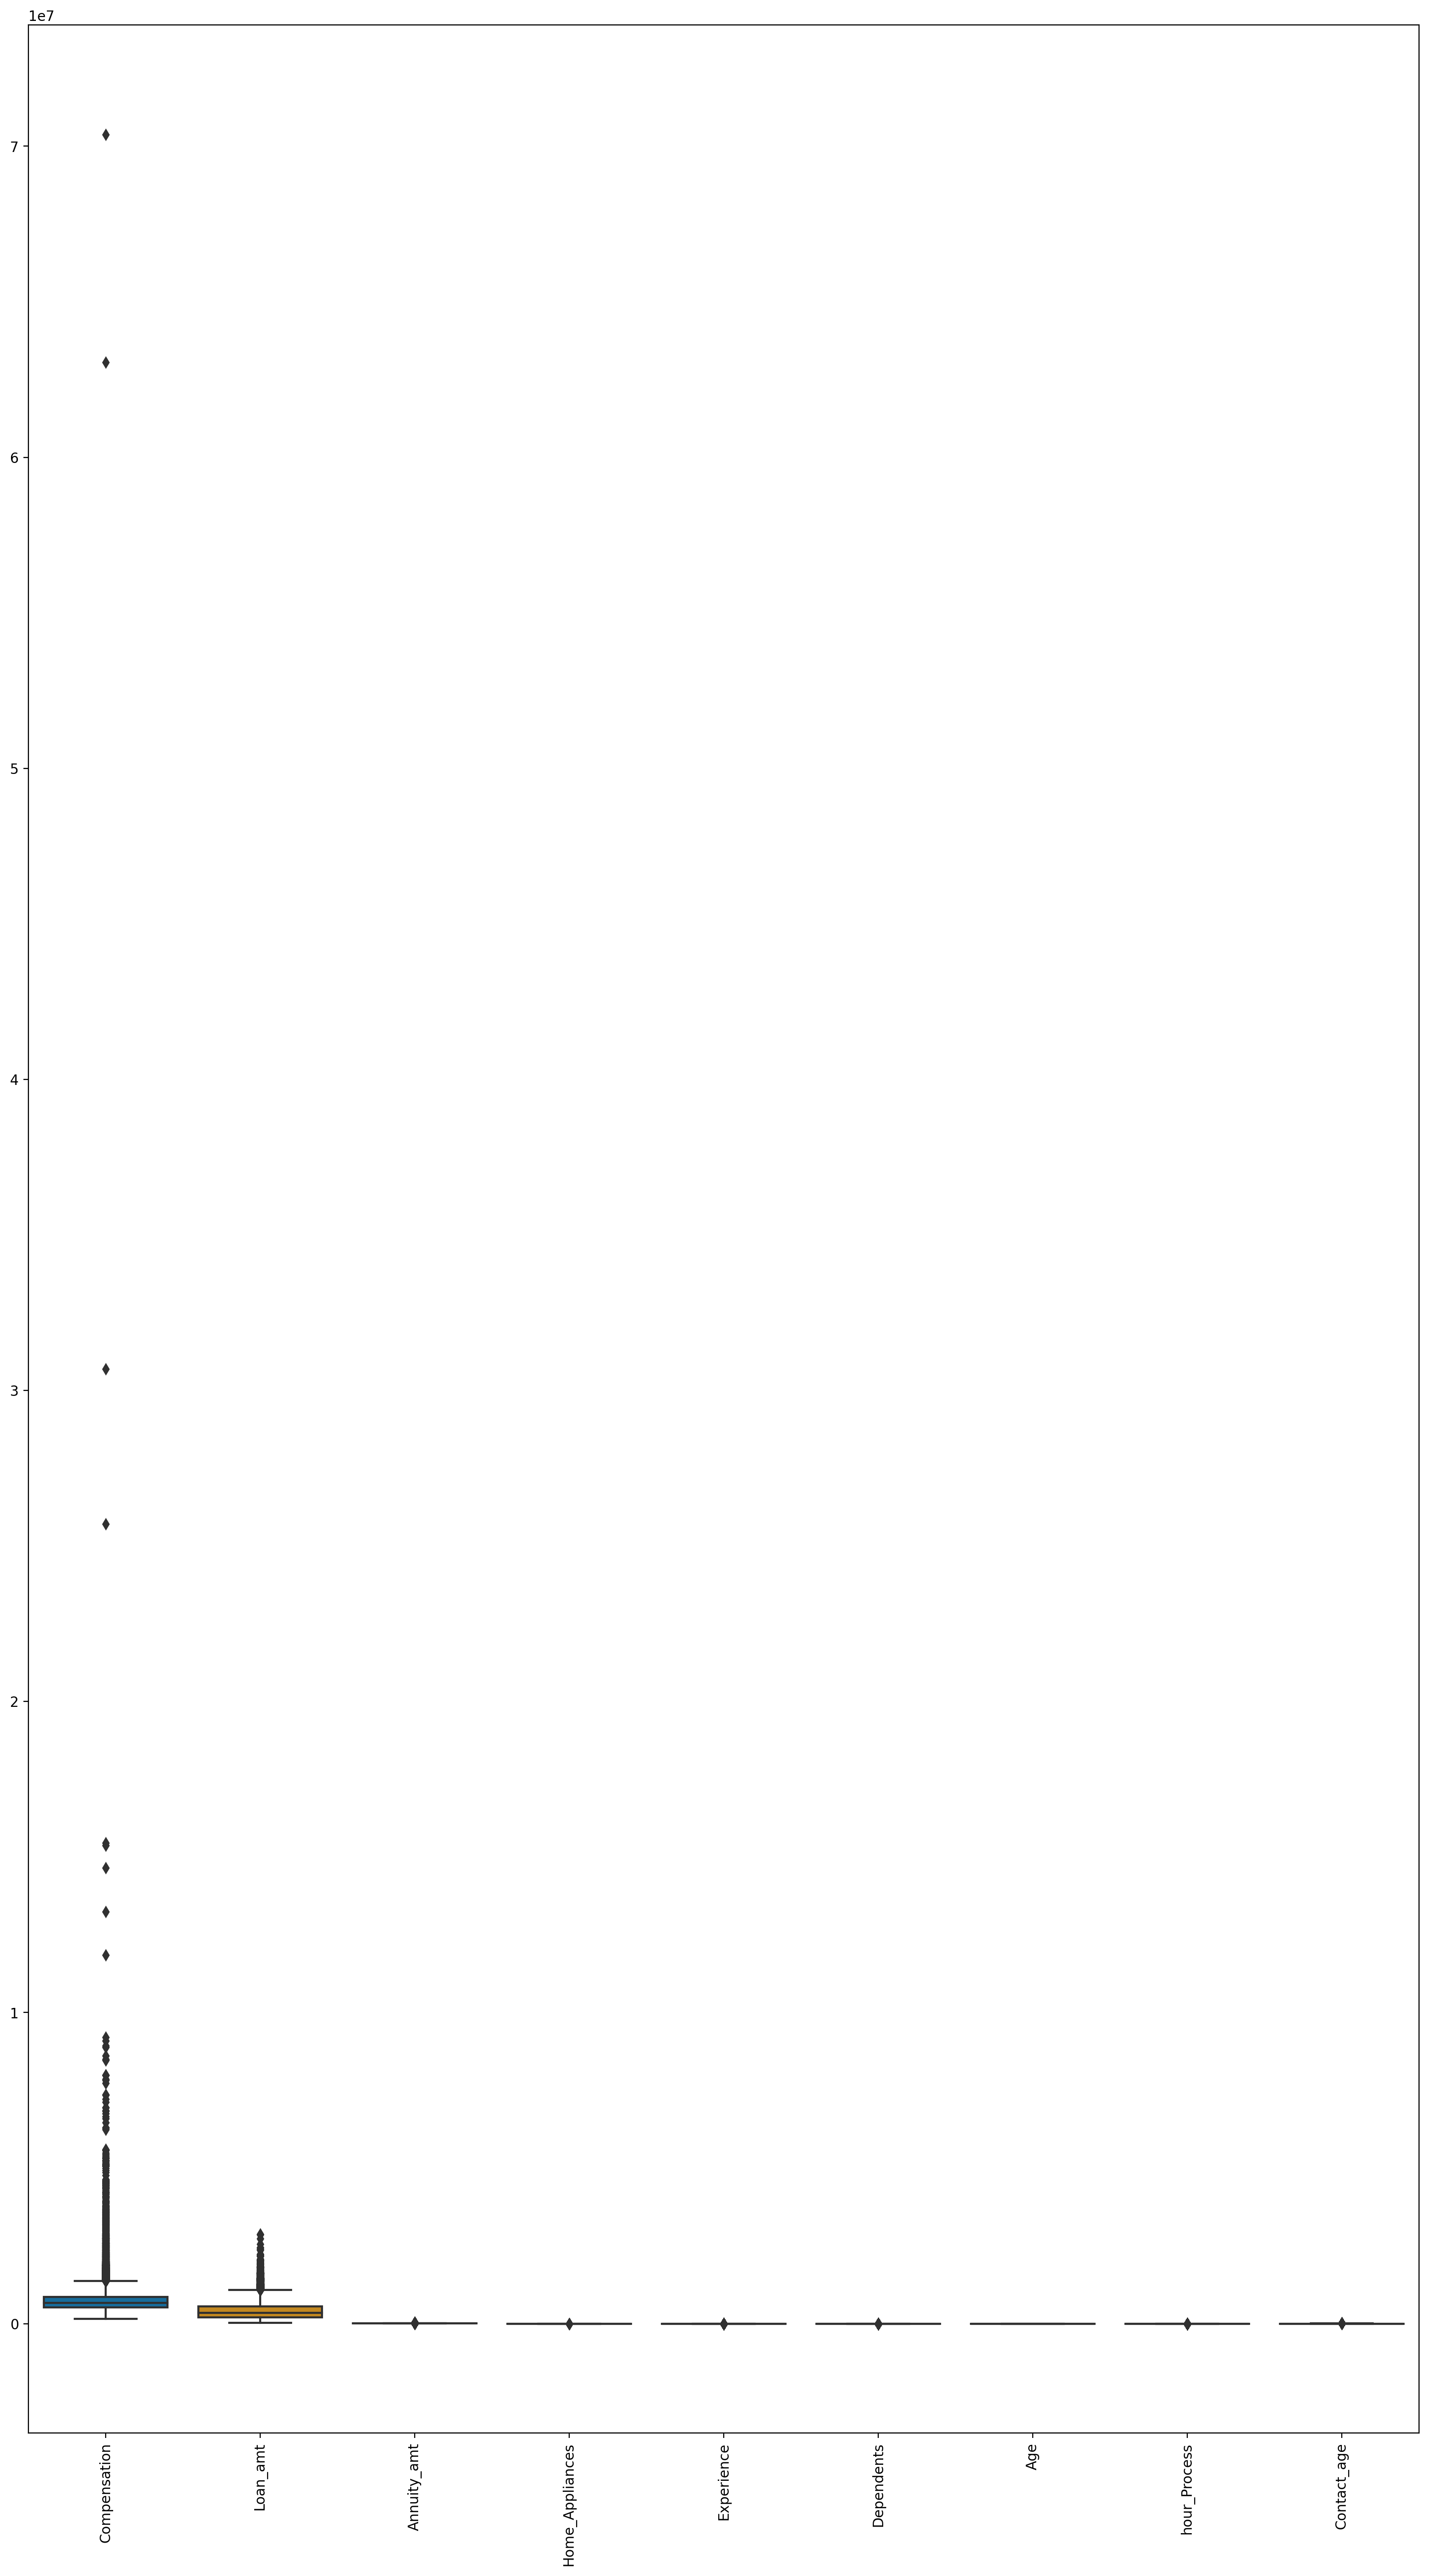

In [75]:
plt.figure(figsize=(18,32),dpi=200)
sns.boxplot(data=dfnum.drop(columns=['Default']),palette='colorblind')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Compensation'>

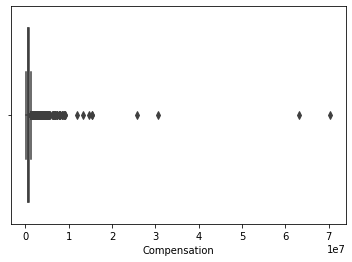

In [76]:
sns.boxplot(data=df,x=df['Compensation'])

<AxesSubplot:xlabel='Loan_amt'>

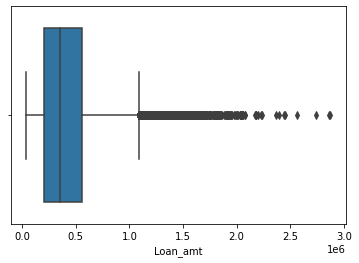

In [77]:
sns.boxplot(data=df,x=df['Loan_amt'])               

<AxesSubplot:xlabel='Annuity_amt'>

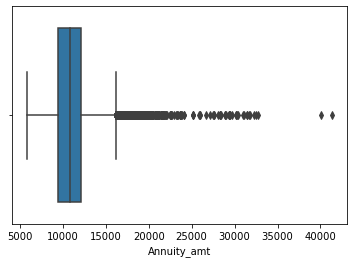

In [78]:
sns.boxplot(data=df,x=df['Annuity_amt']) 

<AxesSubplot:xlabel='Home_Appliances'>

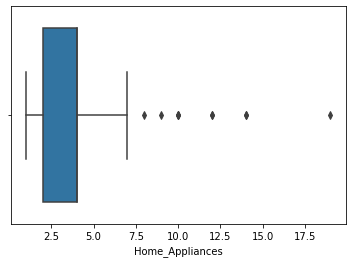

In [79]:
sns.boxplot(data=df,x=df['Home_Appliances'])  

<AxesSubplot:xlabel='Experience'>

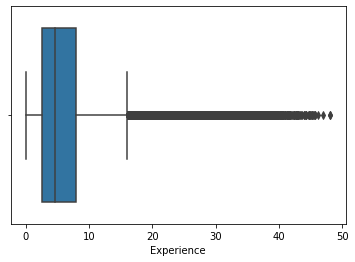

In [80]:
sns.boxplot(data=df,x=df['Experience'])  

<AxesSubplot:xlabel='Dependents'>

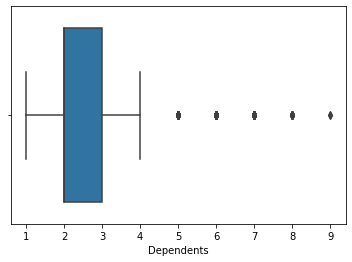

In [81]:
sns.boxplot(data=df,x=df['Dependents'])  

<AxesSubplot:xlabel='Age'>

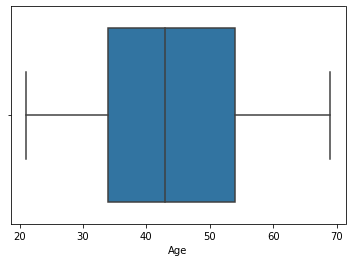

In [82]:
sns.boxplot(data=df,x=df['Age'])  

<AxesSubplot:xlabel='hour_Process'>

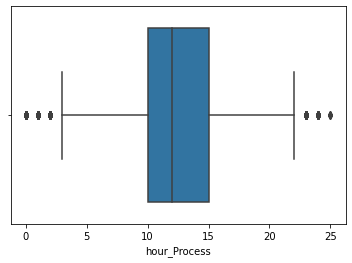

In [83]:
sns.boxplot(data=df,x=df['hour_Process'])  

<AxesSubplot:xlabel='Contact_age'>

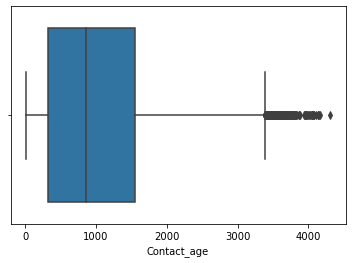

In [84]:
sns.boxplot(data=df,x=df['Contact_age'])  

In [85]:
### some feature have outliers we need to trat them 

In [1]:
def iqr_cappin(df,col):
    q1=df[col].quantile(.25)
    q3=df[col].quantile(.75)
    iqr=q3-q1

    lcl=q1-1.5*iqr
    hcl=q3+1.5*iqr
    
    df[col]=np.where(df[col] > hcl, hcl, np.where(df[col]<lcl,lcl,df[col]))

In [2]:
iqr_cappin(dfnum,dfnum.columns)

NameError: name 'dfnum' is not defined

In [88]:
df.shape

(132440, 27)

In [89]:
df['Compensation']=dfnum['Compensation']
df['Loan_amt']=dfnum['Loan_amt']
df['Annuity_amt']=dfnum['Annuity_amt']
df['Home_Appliances']=dfnum['Home_Appliances']
df['Experience']=dfnum['Experience']
df['Dependents']=dfnum['Dependents']
df['Age']=dfnum['Age']
df['hour_Process']=dfnum['hour_Process']
df['Contact_age']=dfnum['Contact_age']

In [90]:
dfnum.columns

Index(['Compensation', 'Loan_amt', 'Annuity_amt', 'Home_Appliances',
       'Experience', 'Dependents', 'Age', 'hour_Process', 'Contact_age',
       'Default'],
      dtype='object')

In [91]:
## now we will do univariate Analysis

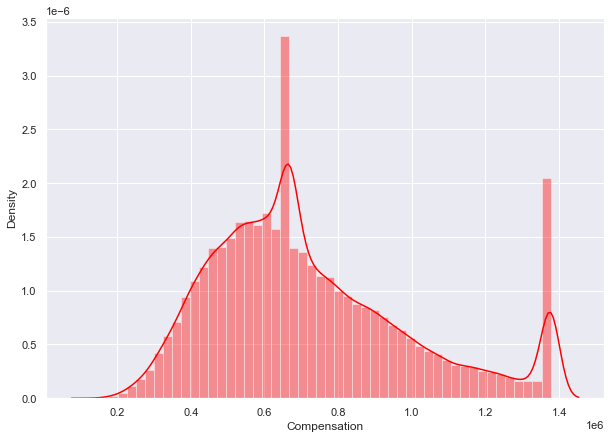

In [92]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,7))
sns.distplot(df['Compensation'], color='red')
plt.show()

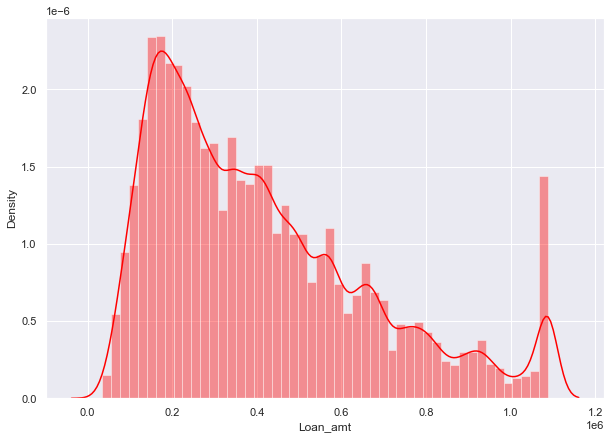

In [93]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,7))
sns.distplot(df['Loan_amt'], color='red')
plt.show()

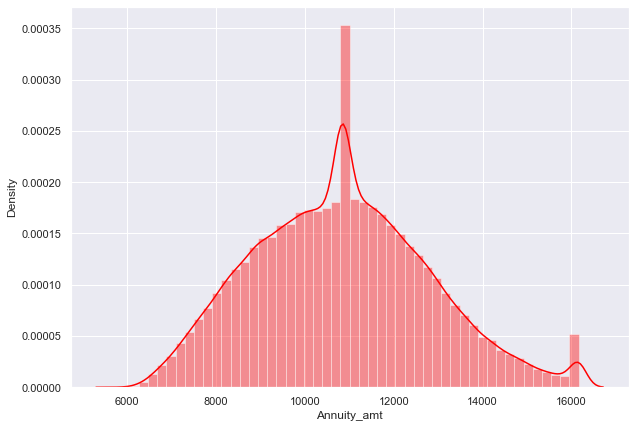

In [94]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,7))
sns.distplot(df['Annuity_amt'], color='red')
plt.show()

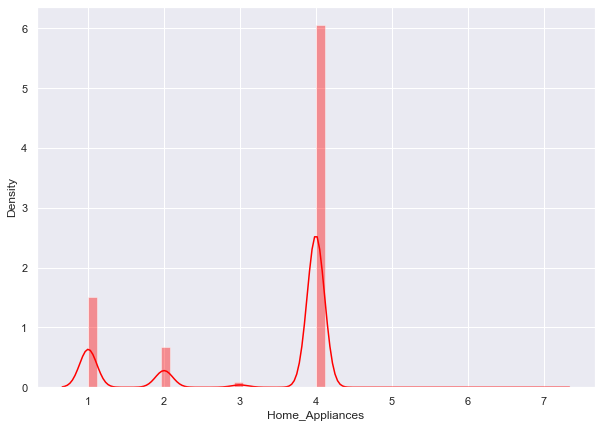

In [95]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,7))
sns.distplot(df['Home_Appliances'], color='red')
plt.show()

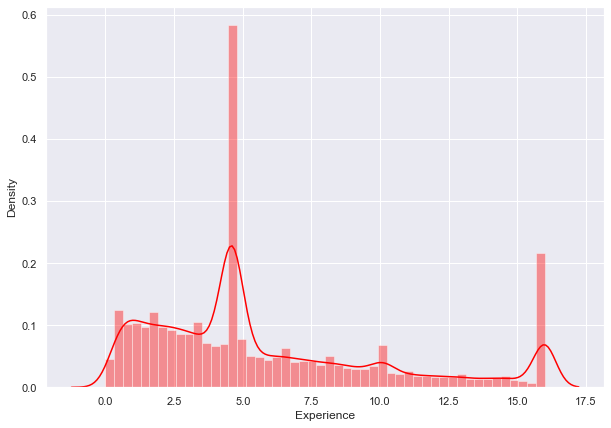

In [96]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,7))
sns.distplot(df['Experience'], color='red')
plt.show()

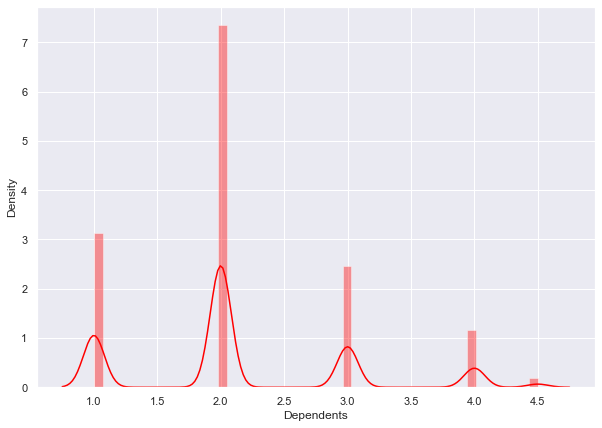

In [97]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,7))
sns.distplot(df['Dependents'], color='red')
plt.show()

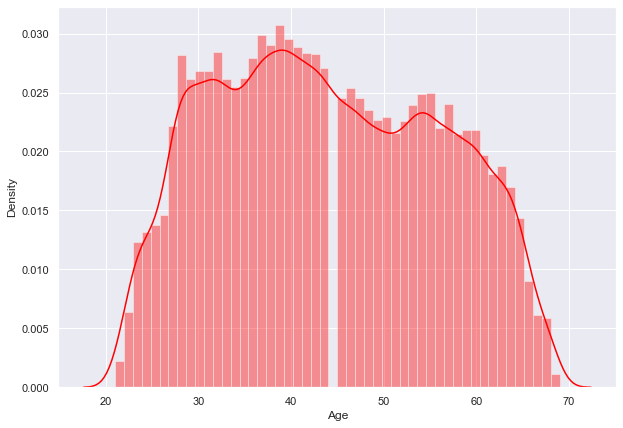

In [98]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,7))
sns.distplot(df['Age'], color='red')
plt.show()

In [99]:
dfnum.columns

Index(['Compensation', 'Loan_amt', 'Annuity_amt', 'Home_Appliances',
       'Experience', 'Dependents', 'Age', 'hour_Process', 'Contact_age',
       'Default'],
      dtype='object')

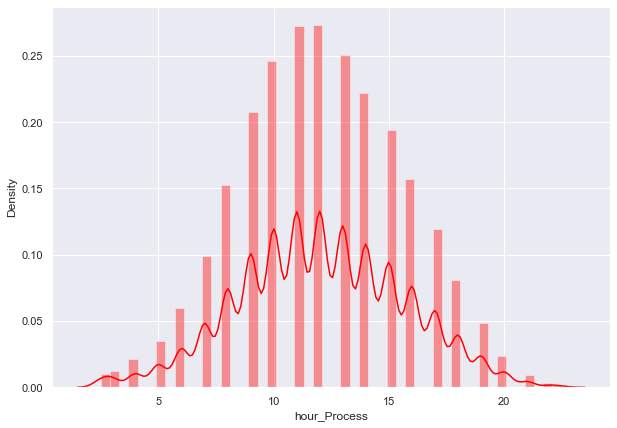

In [100]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,7))
sns.distplot(df['hour_Process'], color='red')
plt.show()

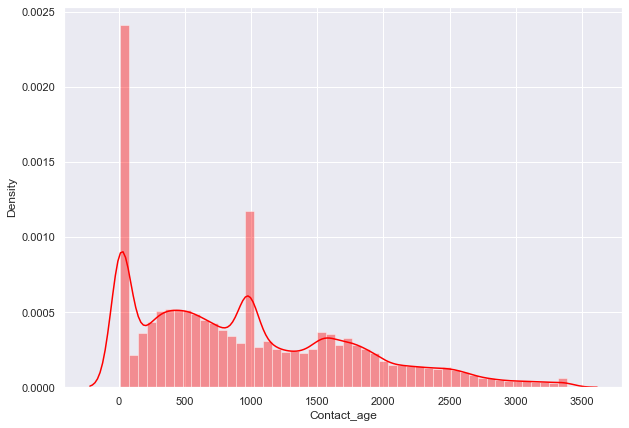

In [101]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,7))
sns.distplot(df['Contact_age'], color='red')
plt.show()

In [102]:
## need to remove skewness 

In [103]:
df.skew()

Compensation       0.804627
Loan_amt           0.936670
Annuity_amt        0.264264
Home_Appliances   -1.174796
Experience         1.016968
Dependents         0.674848
Age                0.118174
hour_Process      -0.002470
Contact_age        0.724066
Default            1.069039
dtype: float64

In [104]:
df['Compensation'] = np.log( df['Compensation'] )
df['Loan_amt'] = np.log( df['Loan_amt'] )
df['Annuity_amt'] = np.log( df['Annuity_amt'] )
df['Home_Appliances'] = np.log( df['Home_Appliances'] )
df['Dependents'] = np.log( df['Dependents'] )


In [105]:
#df['Experience'] = np.log( df['Experience'] )
#df['Contact_age'] = np.log( df['Contact_age'] )

In [106]:
df['Home_Appliances']=np.sqrt(df['Home_Appliances'])
df['Contact_age']=np.sqrt(df['Contact_age'])
df['Experience']=np.sqrt(df['Experience'])

In [107]:
df.skew()

Compensation      -0.060686
Loan_amt          -0.245188
Annuity_amt       -0.189817
Home_Appliances   -1.513574
Experience         0.291655
Dependents        -0.247714
Age                0.118174
hour_Process      -0.002470
Contact_age       -0.160618
Default            1.069039
dtype: float64

<AxesSubplot:>

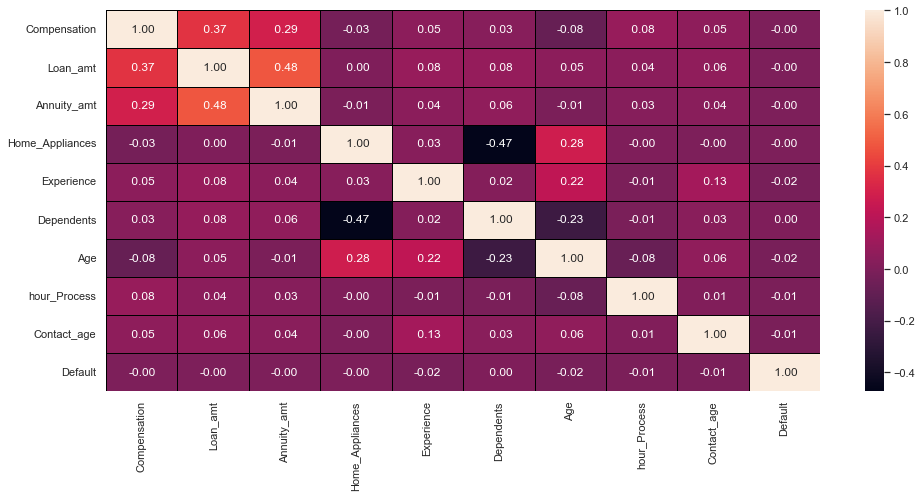

In [108]:
plt.figure(figsize=(16, 7))

sns.heatmap(df.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

In [109]:
df.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,...,Ph.No,Type_Loan,Dependents,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Default
0,13.594677,Y,13.397021,9.533620,IT,ndf,Morethan_One,1.177410,Metro,1,...,Yes,CLoan,1.098612,East,46.0,10.0,Yes,No,4.242641,1.0
1,13.692463,N,12.196401,9.321261,IT,ndf,Morethan_One,0.000000,Metro,2,...,Yes,CLoan,1.098612,North,46.0,12.0,Yes,Yes,17.492856,0.0
2,12.557152,N,11.523430,9.034843,Govt.,ndf,One,1.177410,Metro,3,...,Yes,CLoan,0.693147,North,57.0,5.0,Yes,Yes,16.763055,0.0
3,12.742198,N,12.095186,8.879630,Non-IT,df,None,0.832555,Metro,1,...,Yes,RLoan,1.386294,South,39.0,12.0,Yes,Yes,4.472136,0.0
4,14.046539,Y,13.259888,9.488939,Non-IT,ndf,Morethan_One,0.000000,Rural,2,...,Yes,CLoan,1.098612,North,32.0,16.0,Yes,Yes,48.363209,0.0


In [110]:
## now we check catgorical Analyis

In [111]:
dfcat=df.select_dtypes(include=object)
dfcat.head(2)

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,East,Yes,No
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,North,Yes,Yes


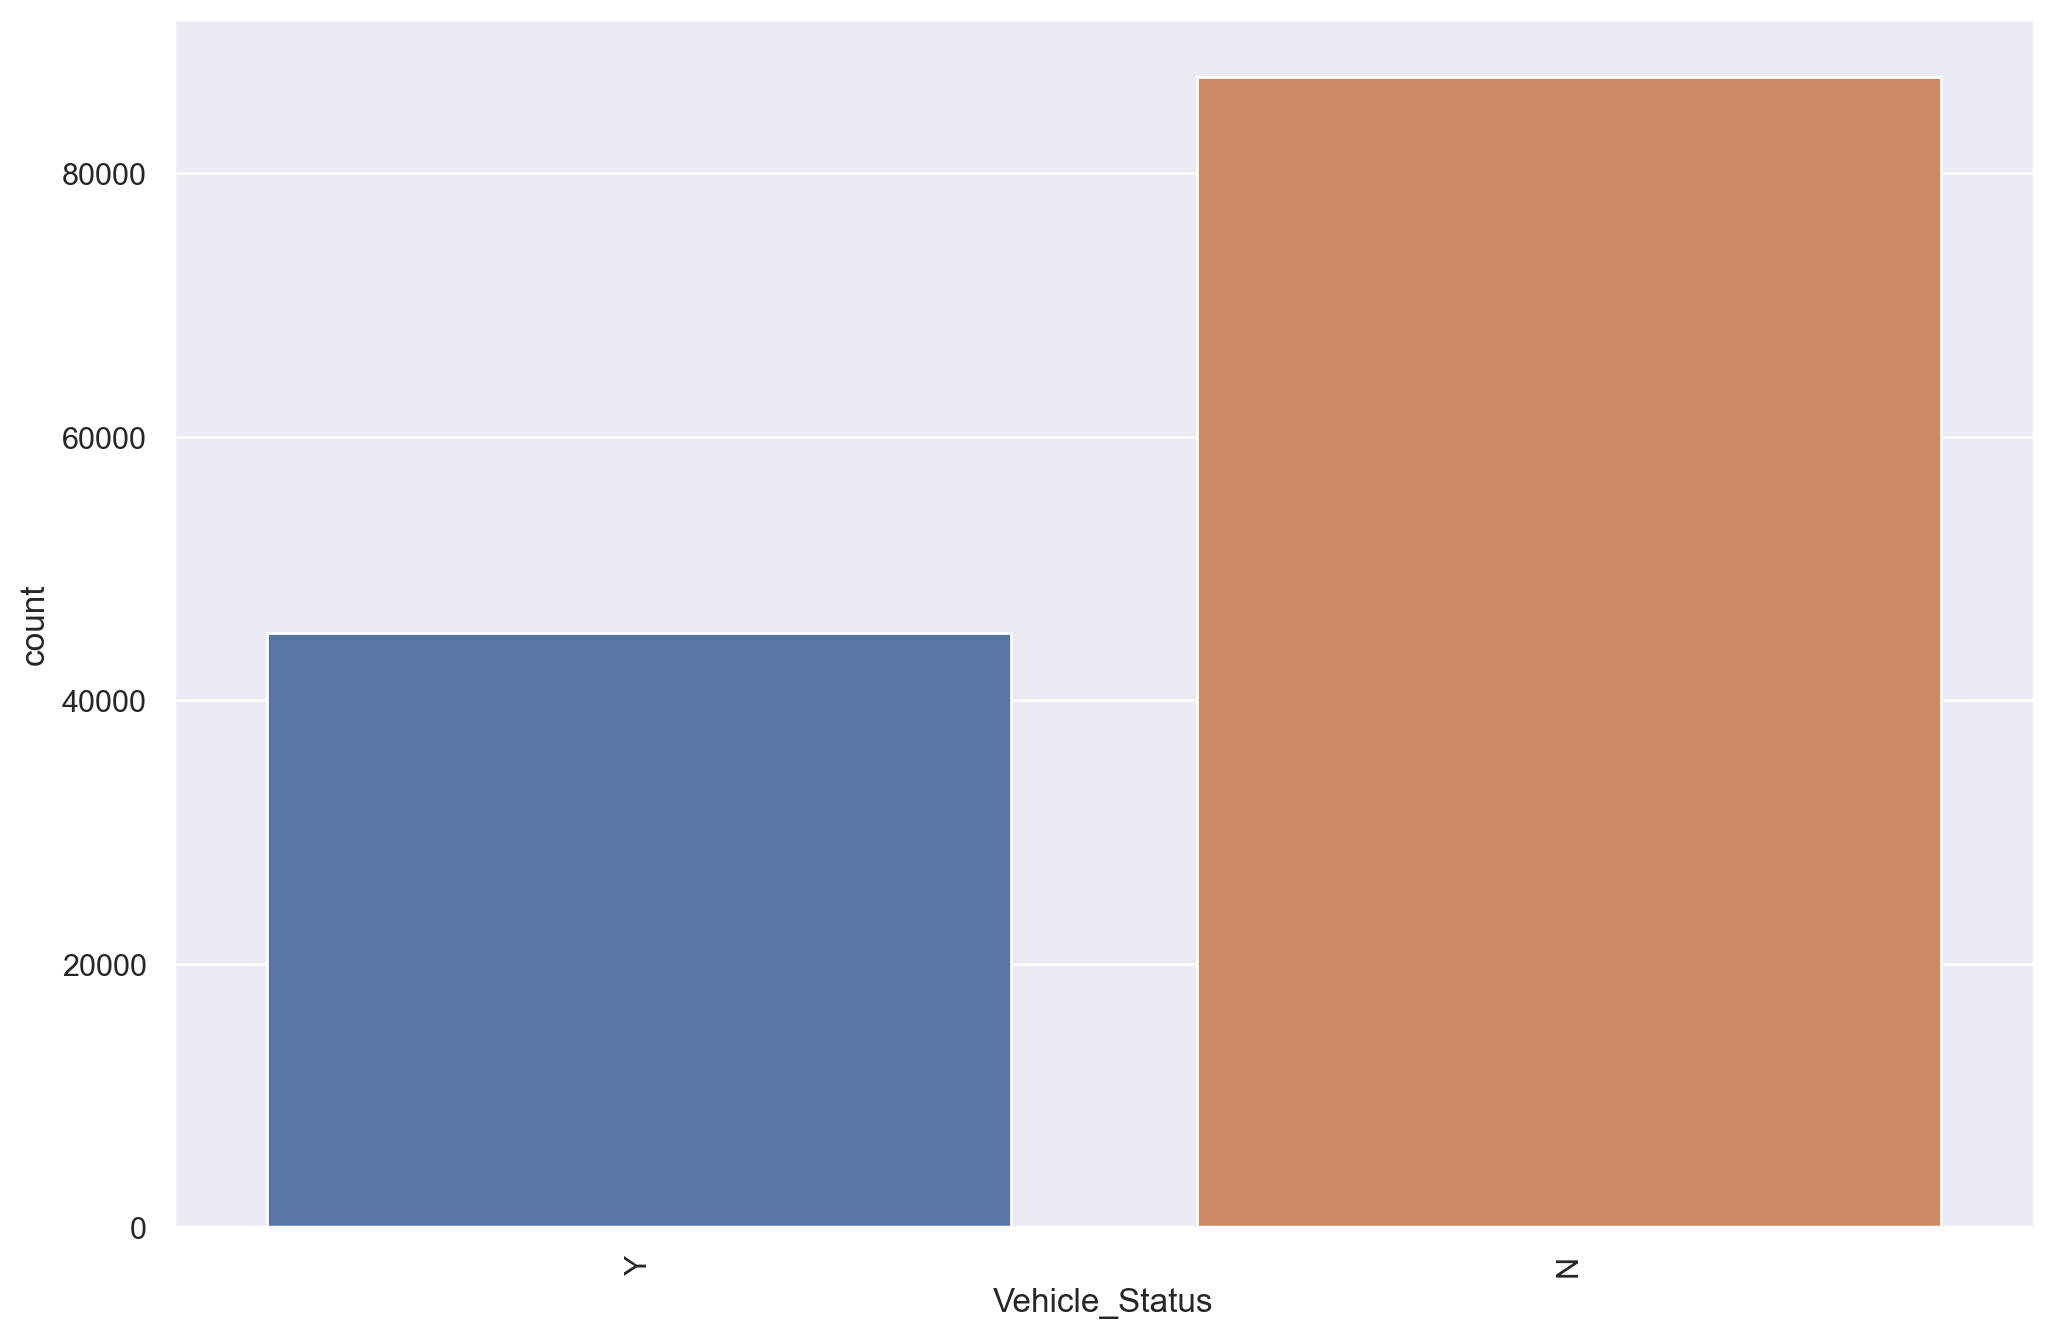

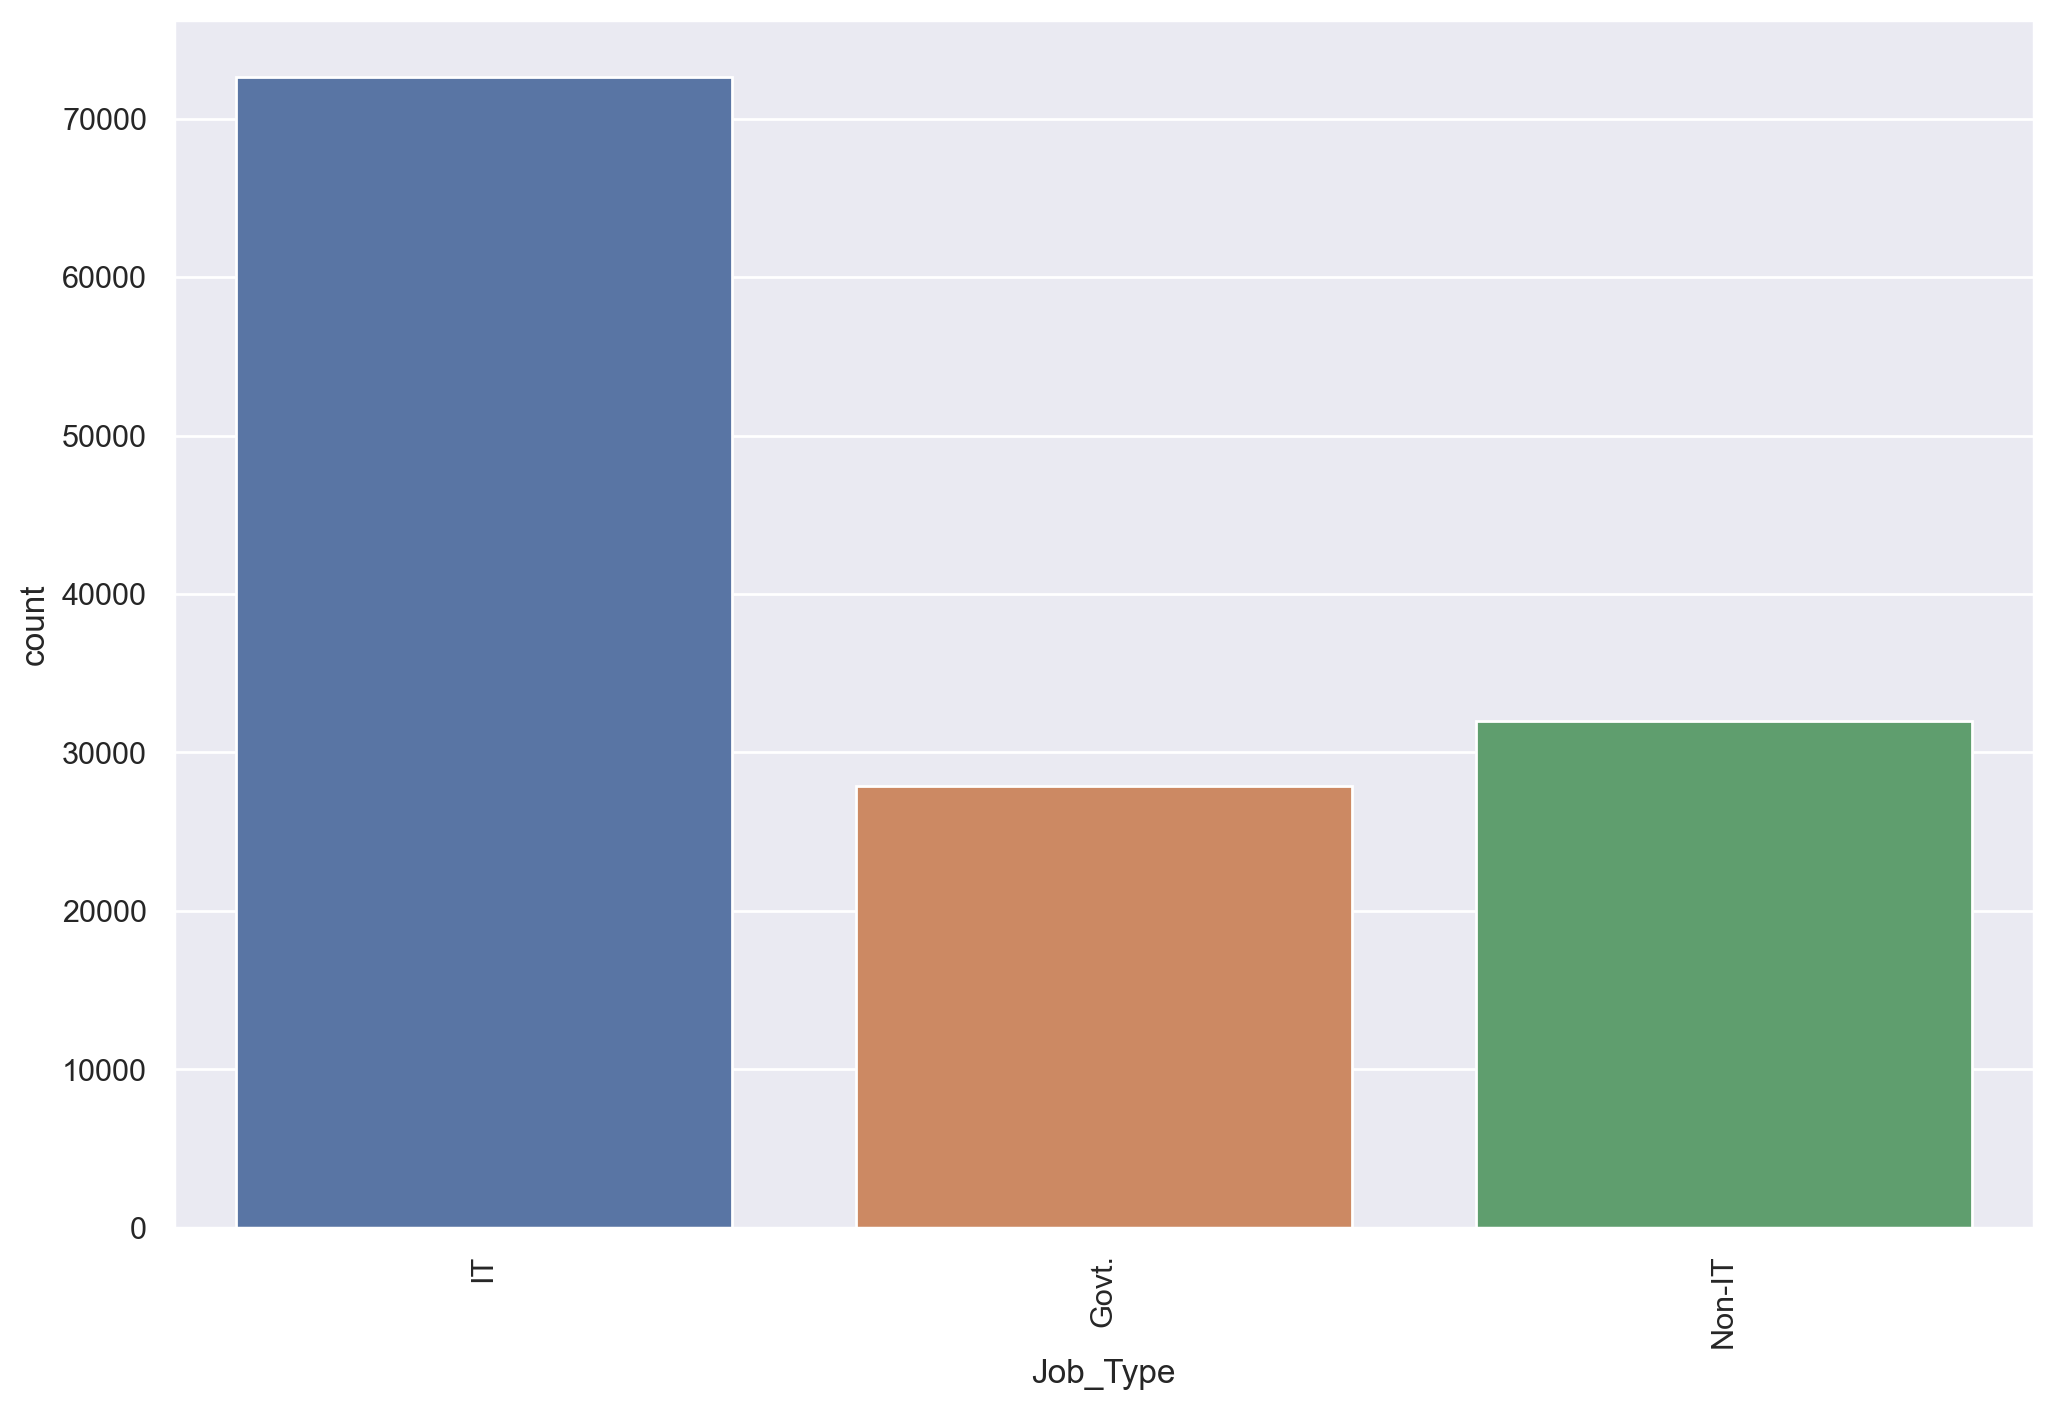

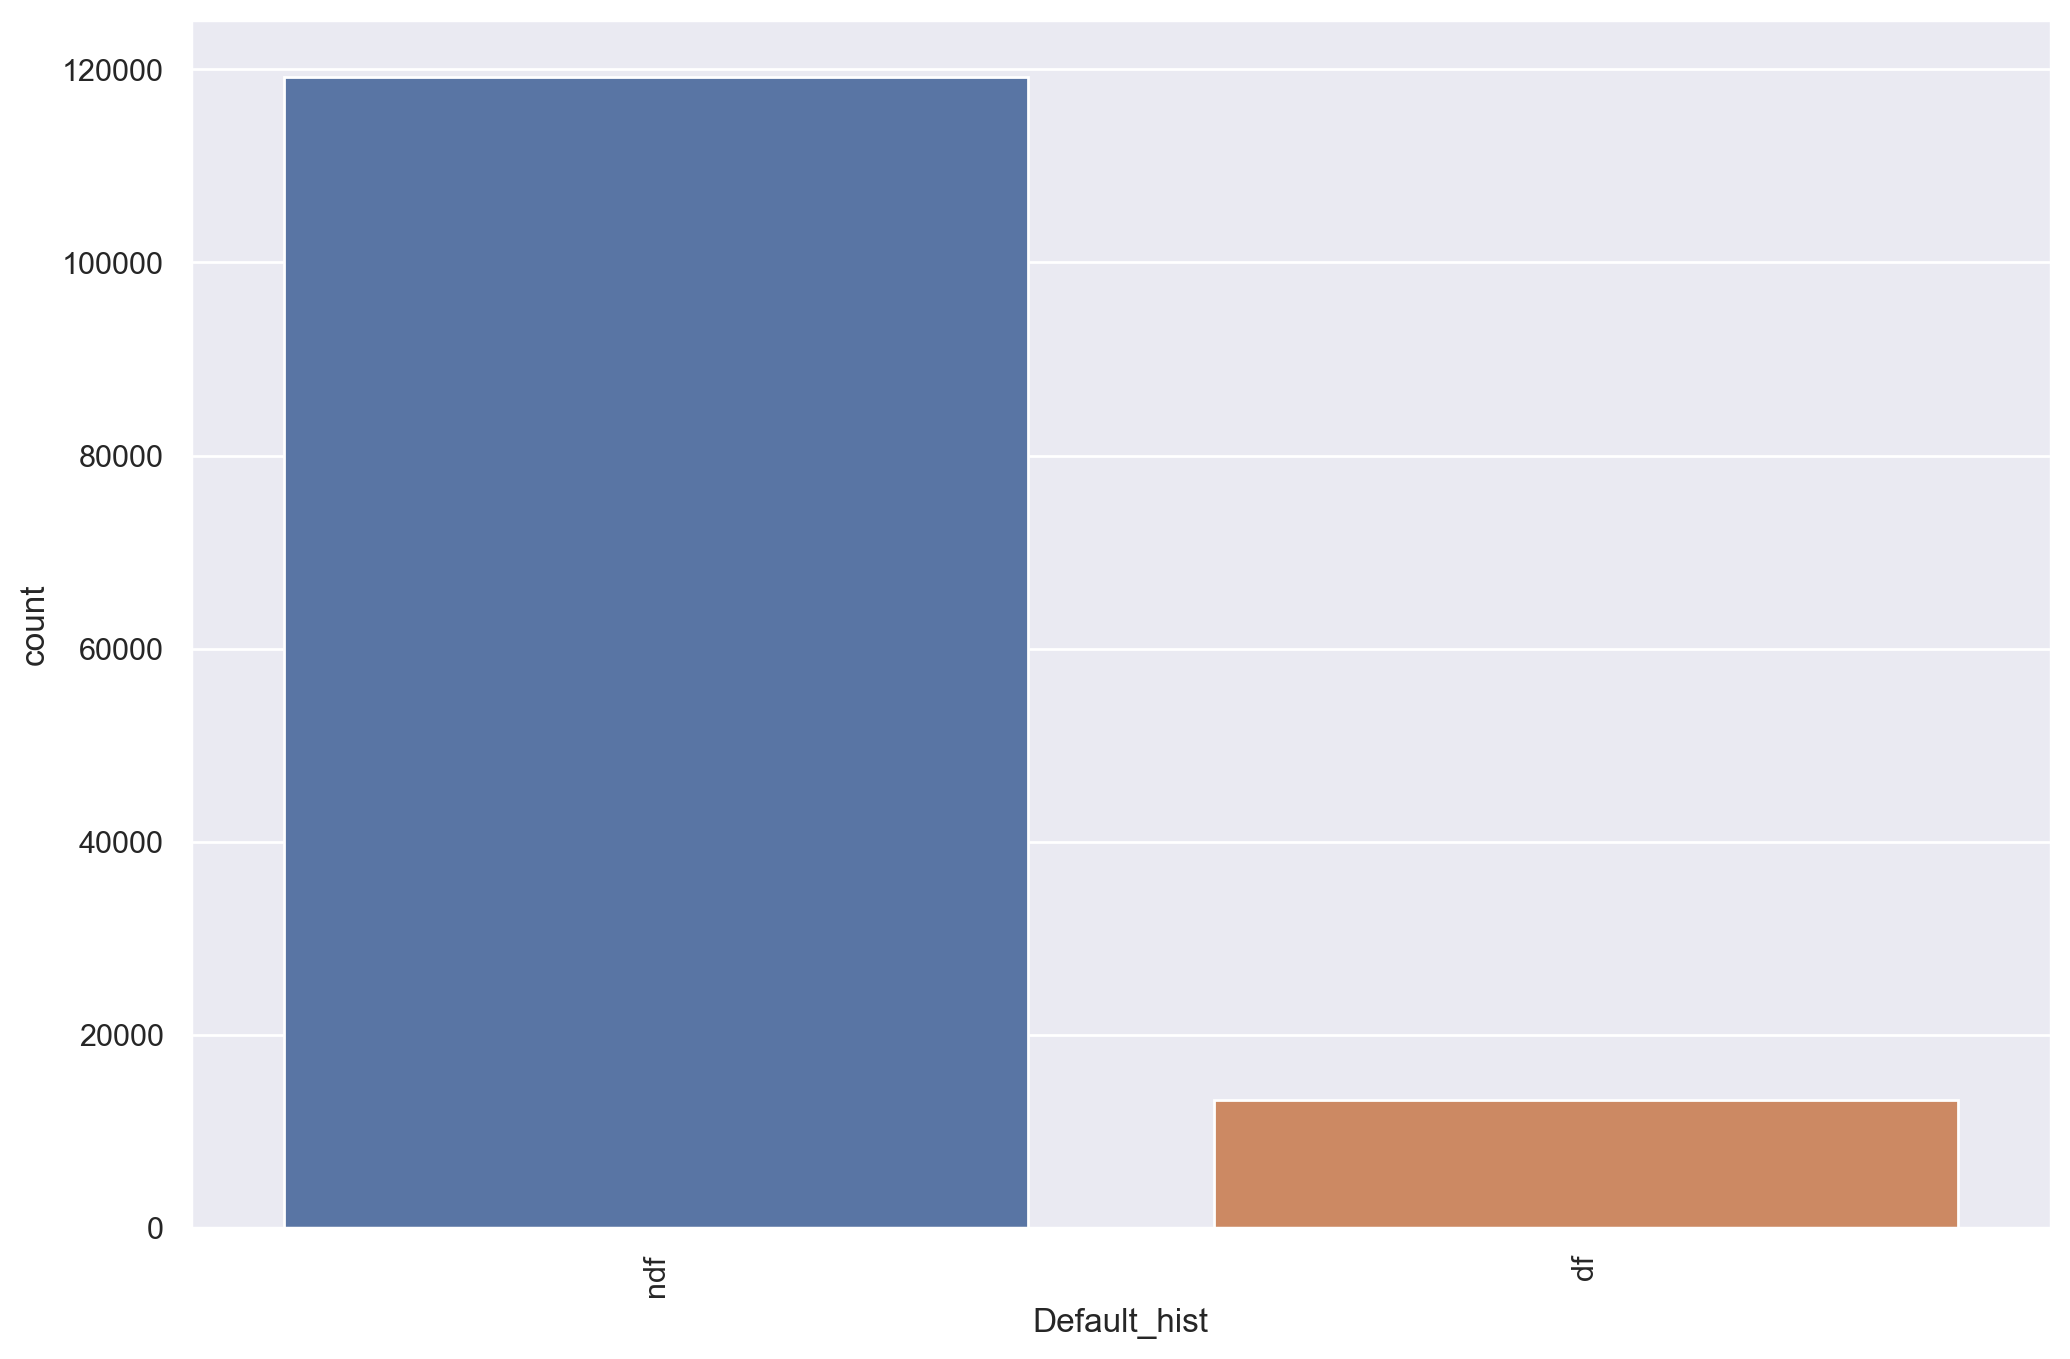

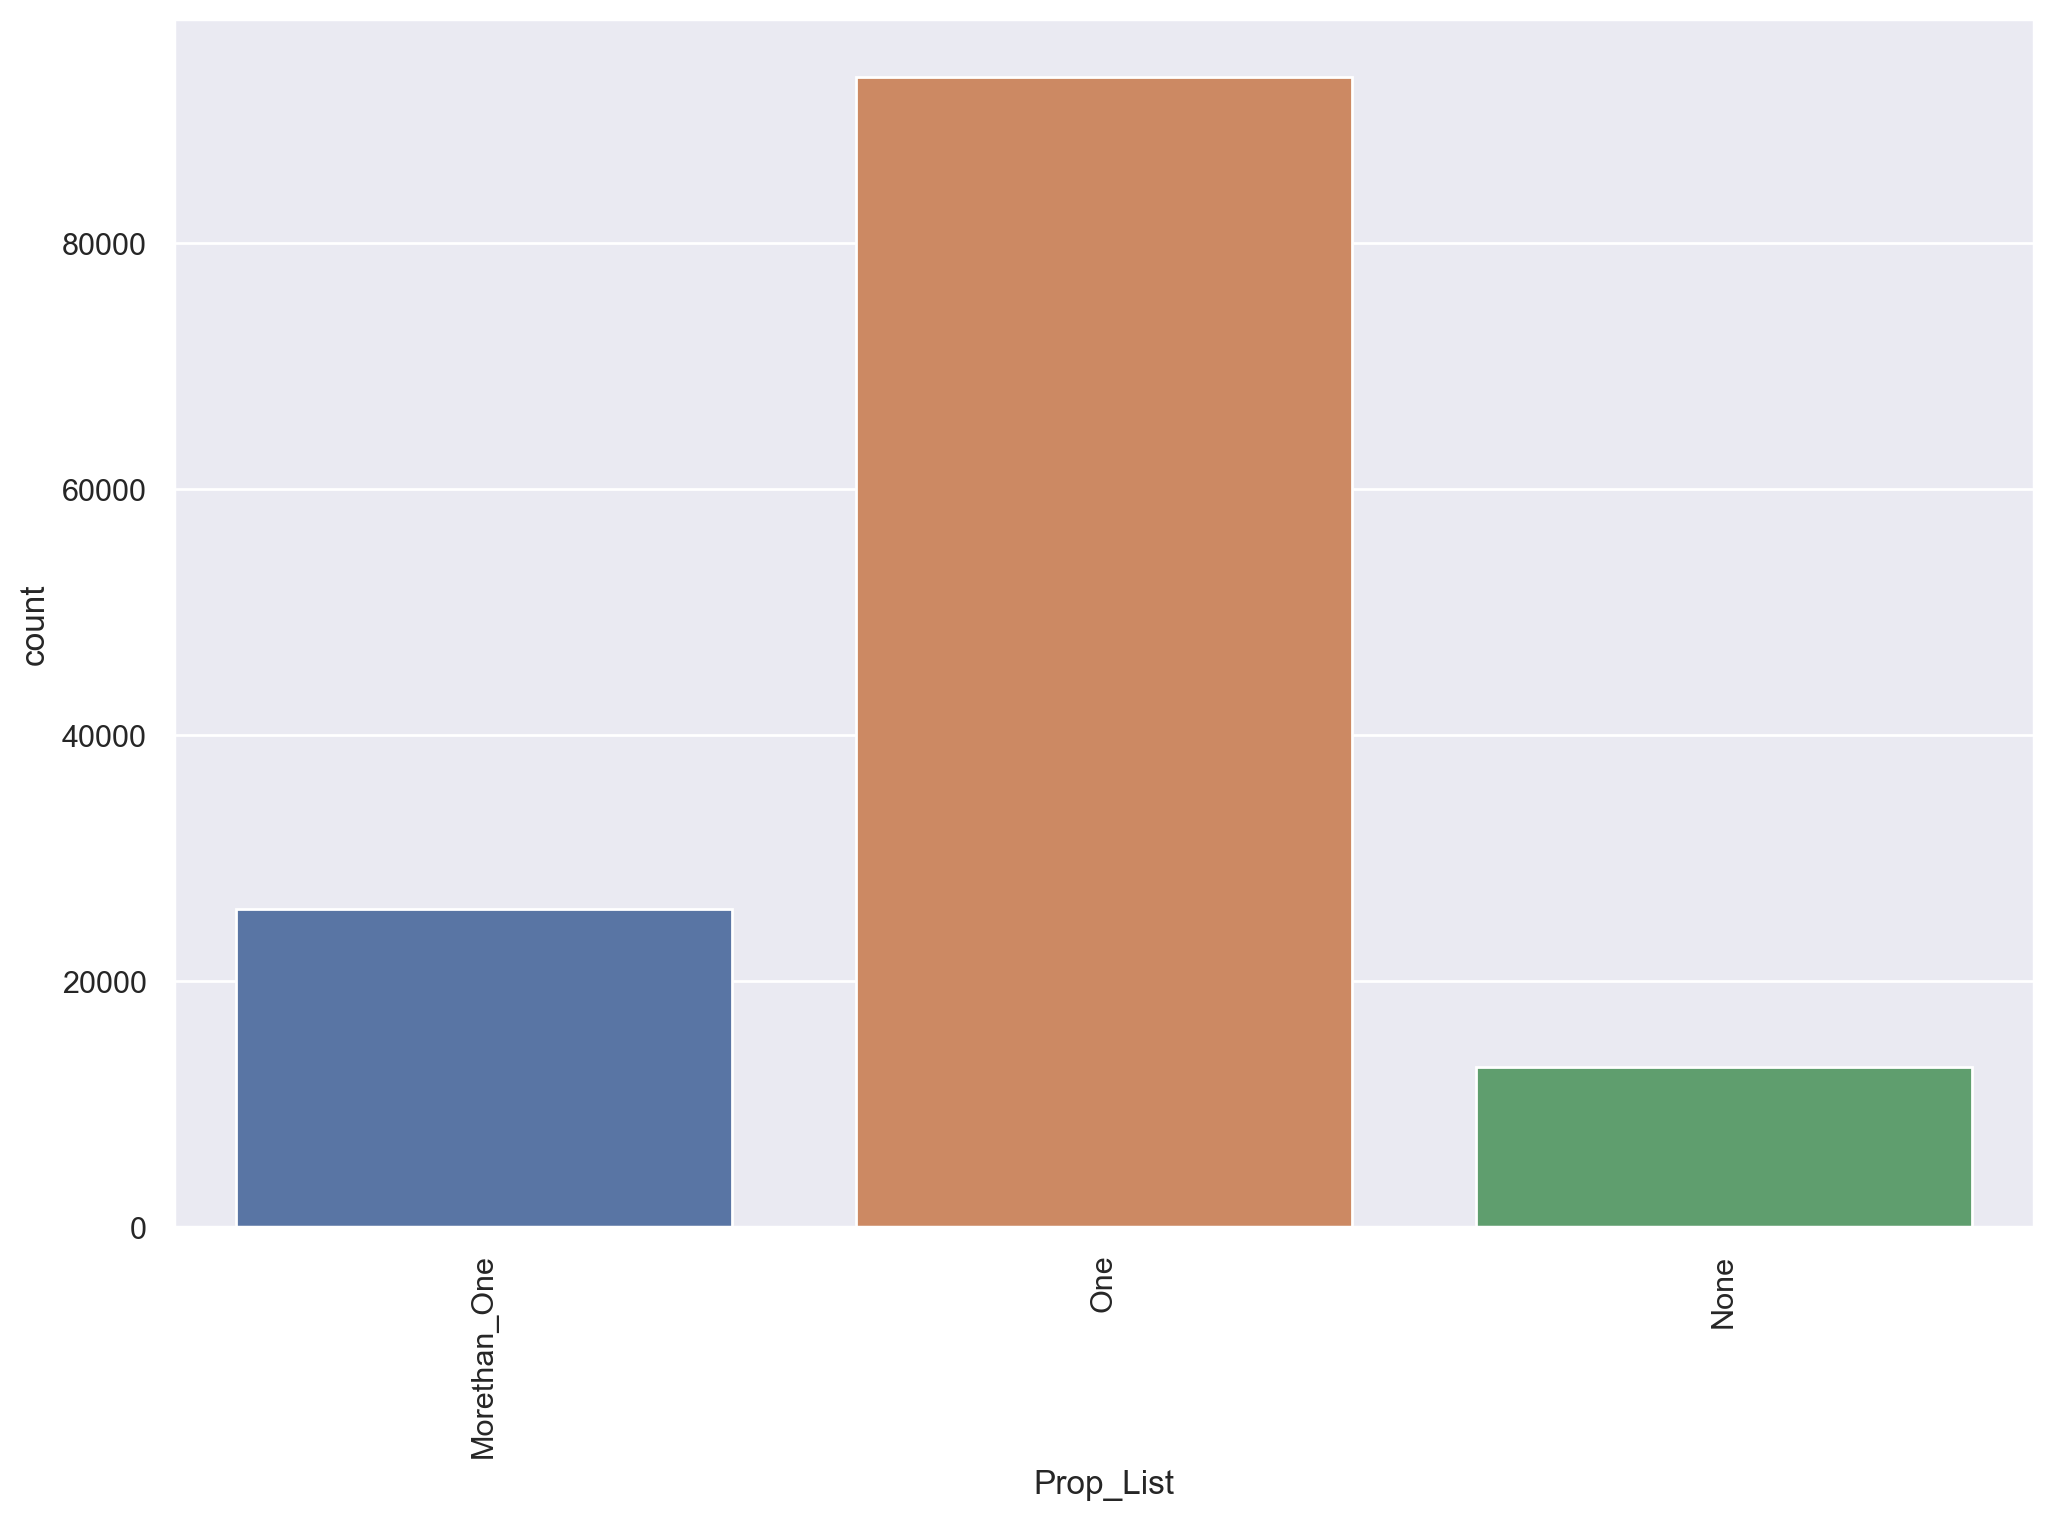

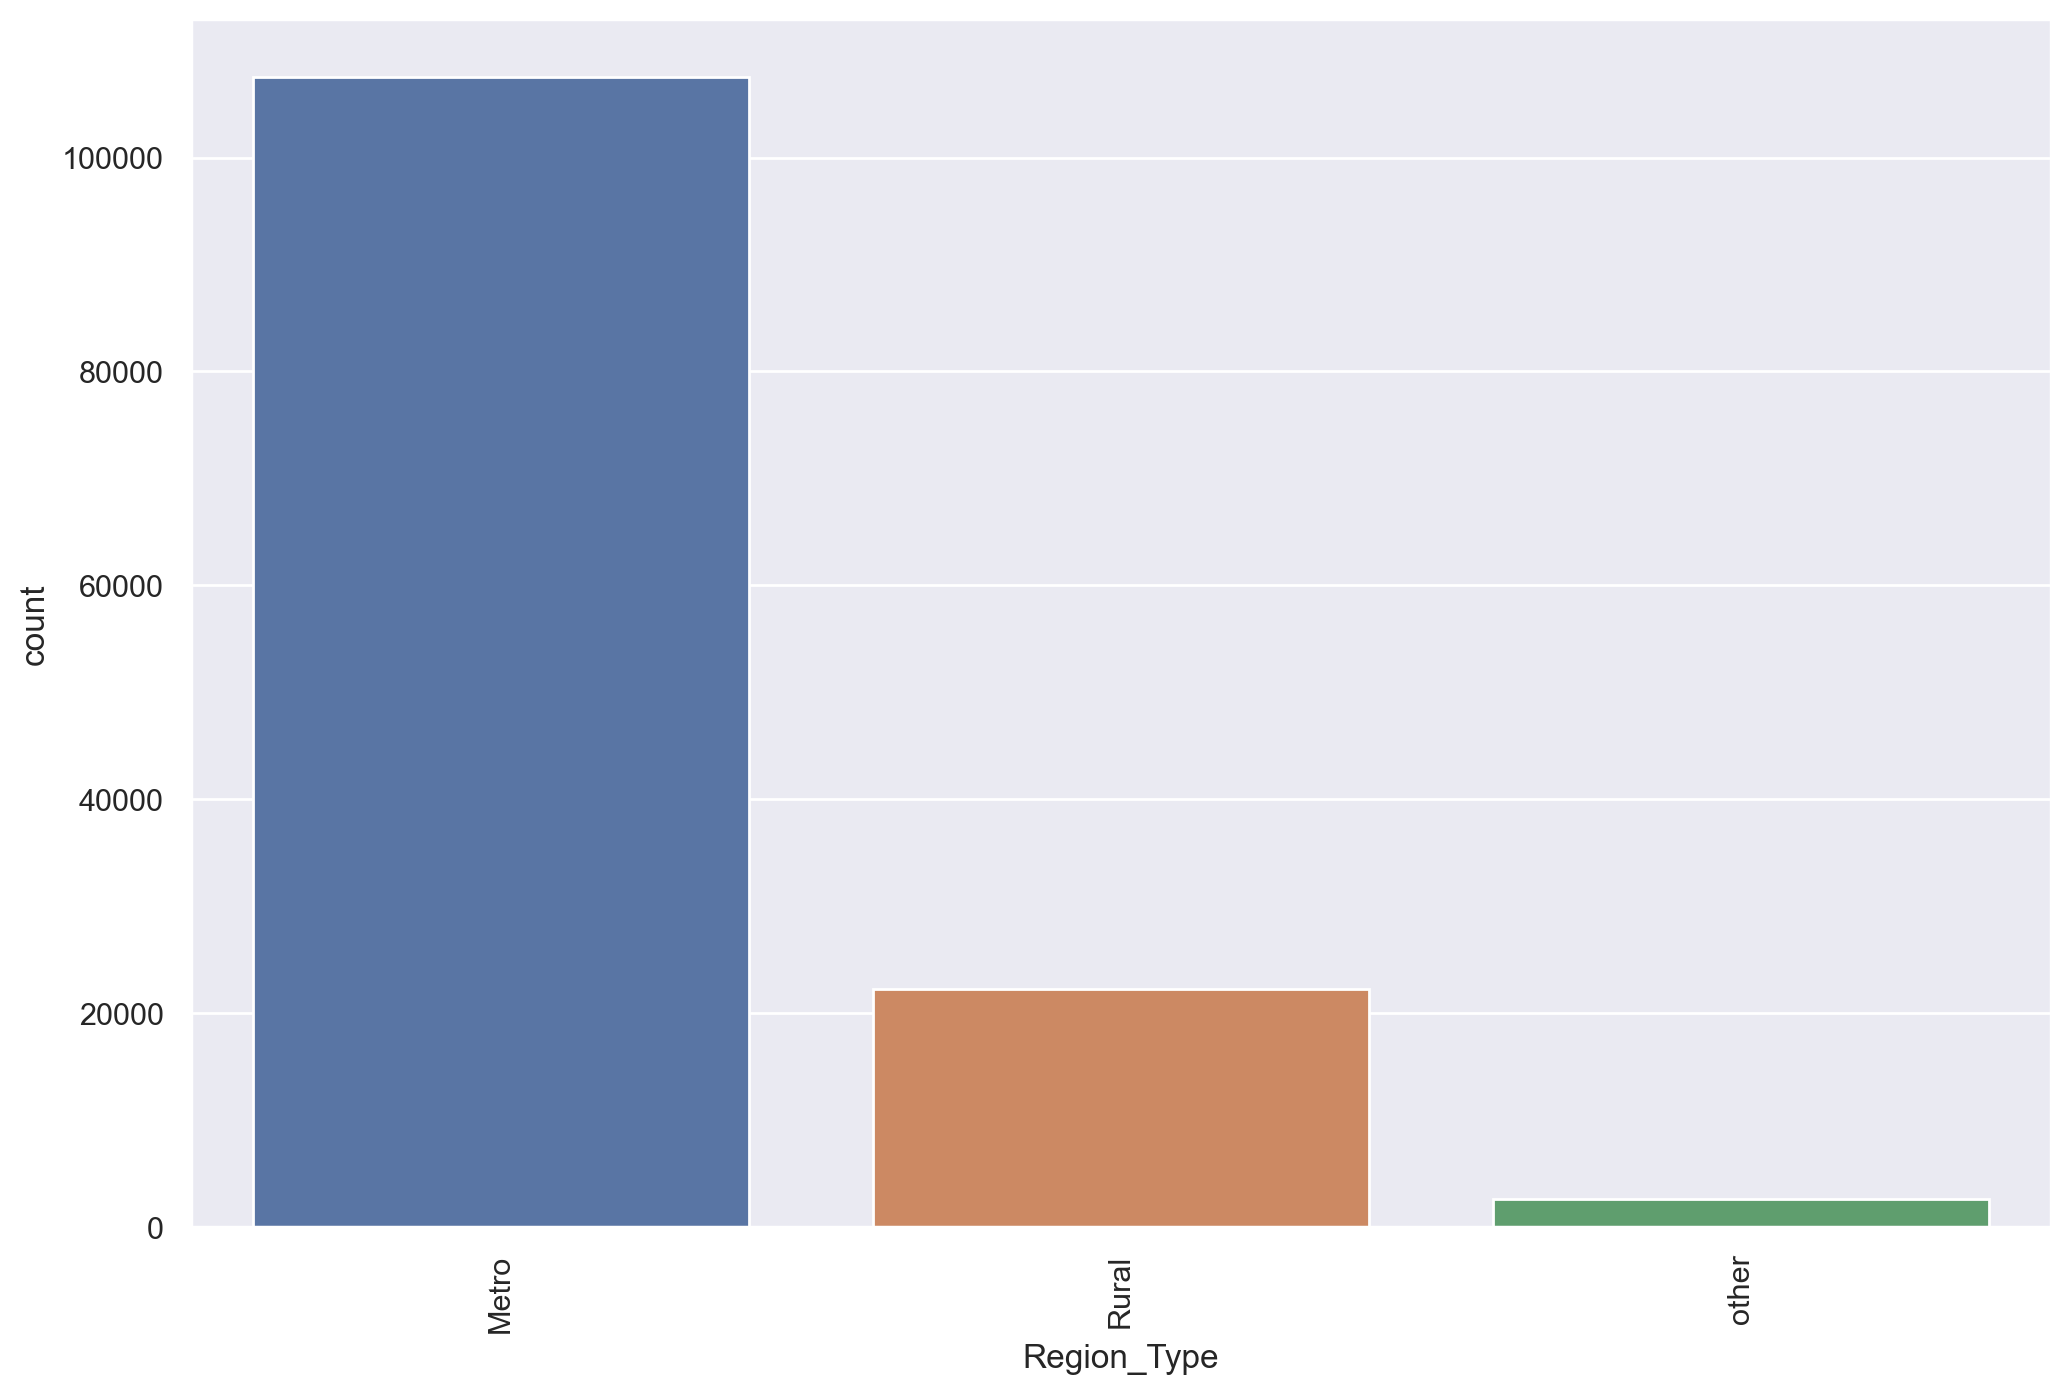

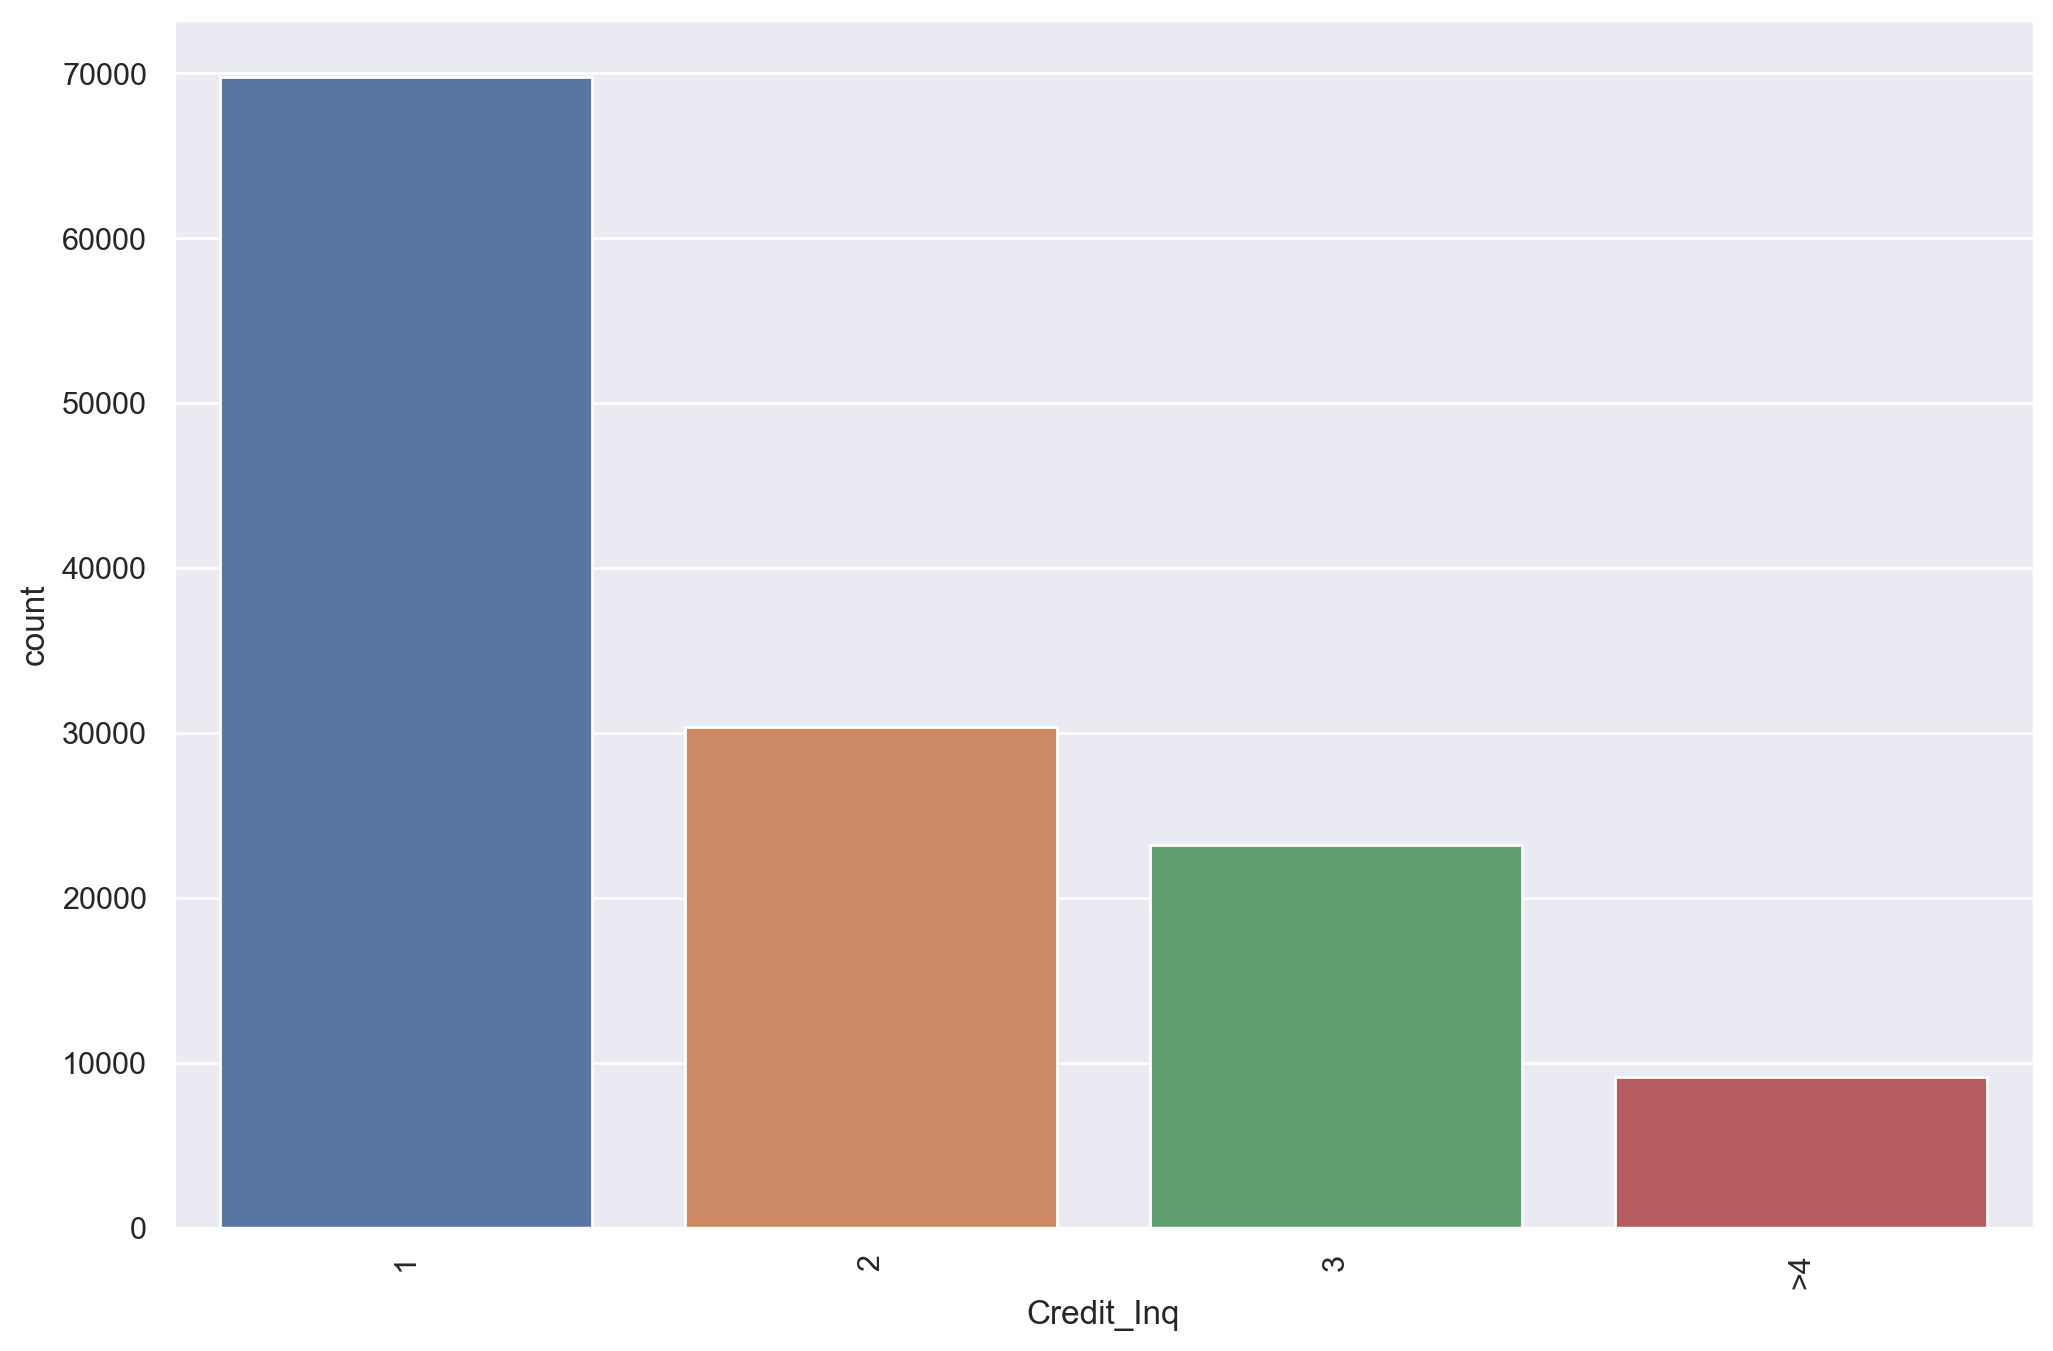

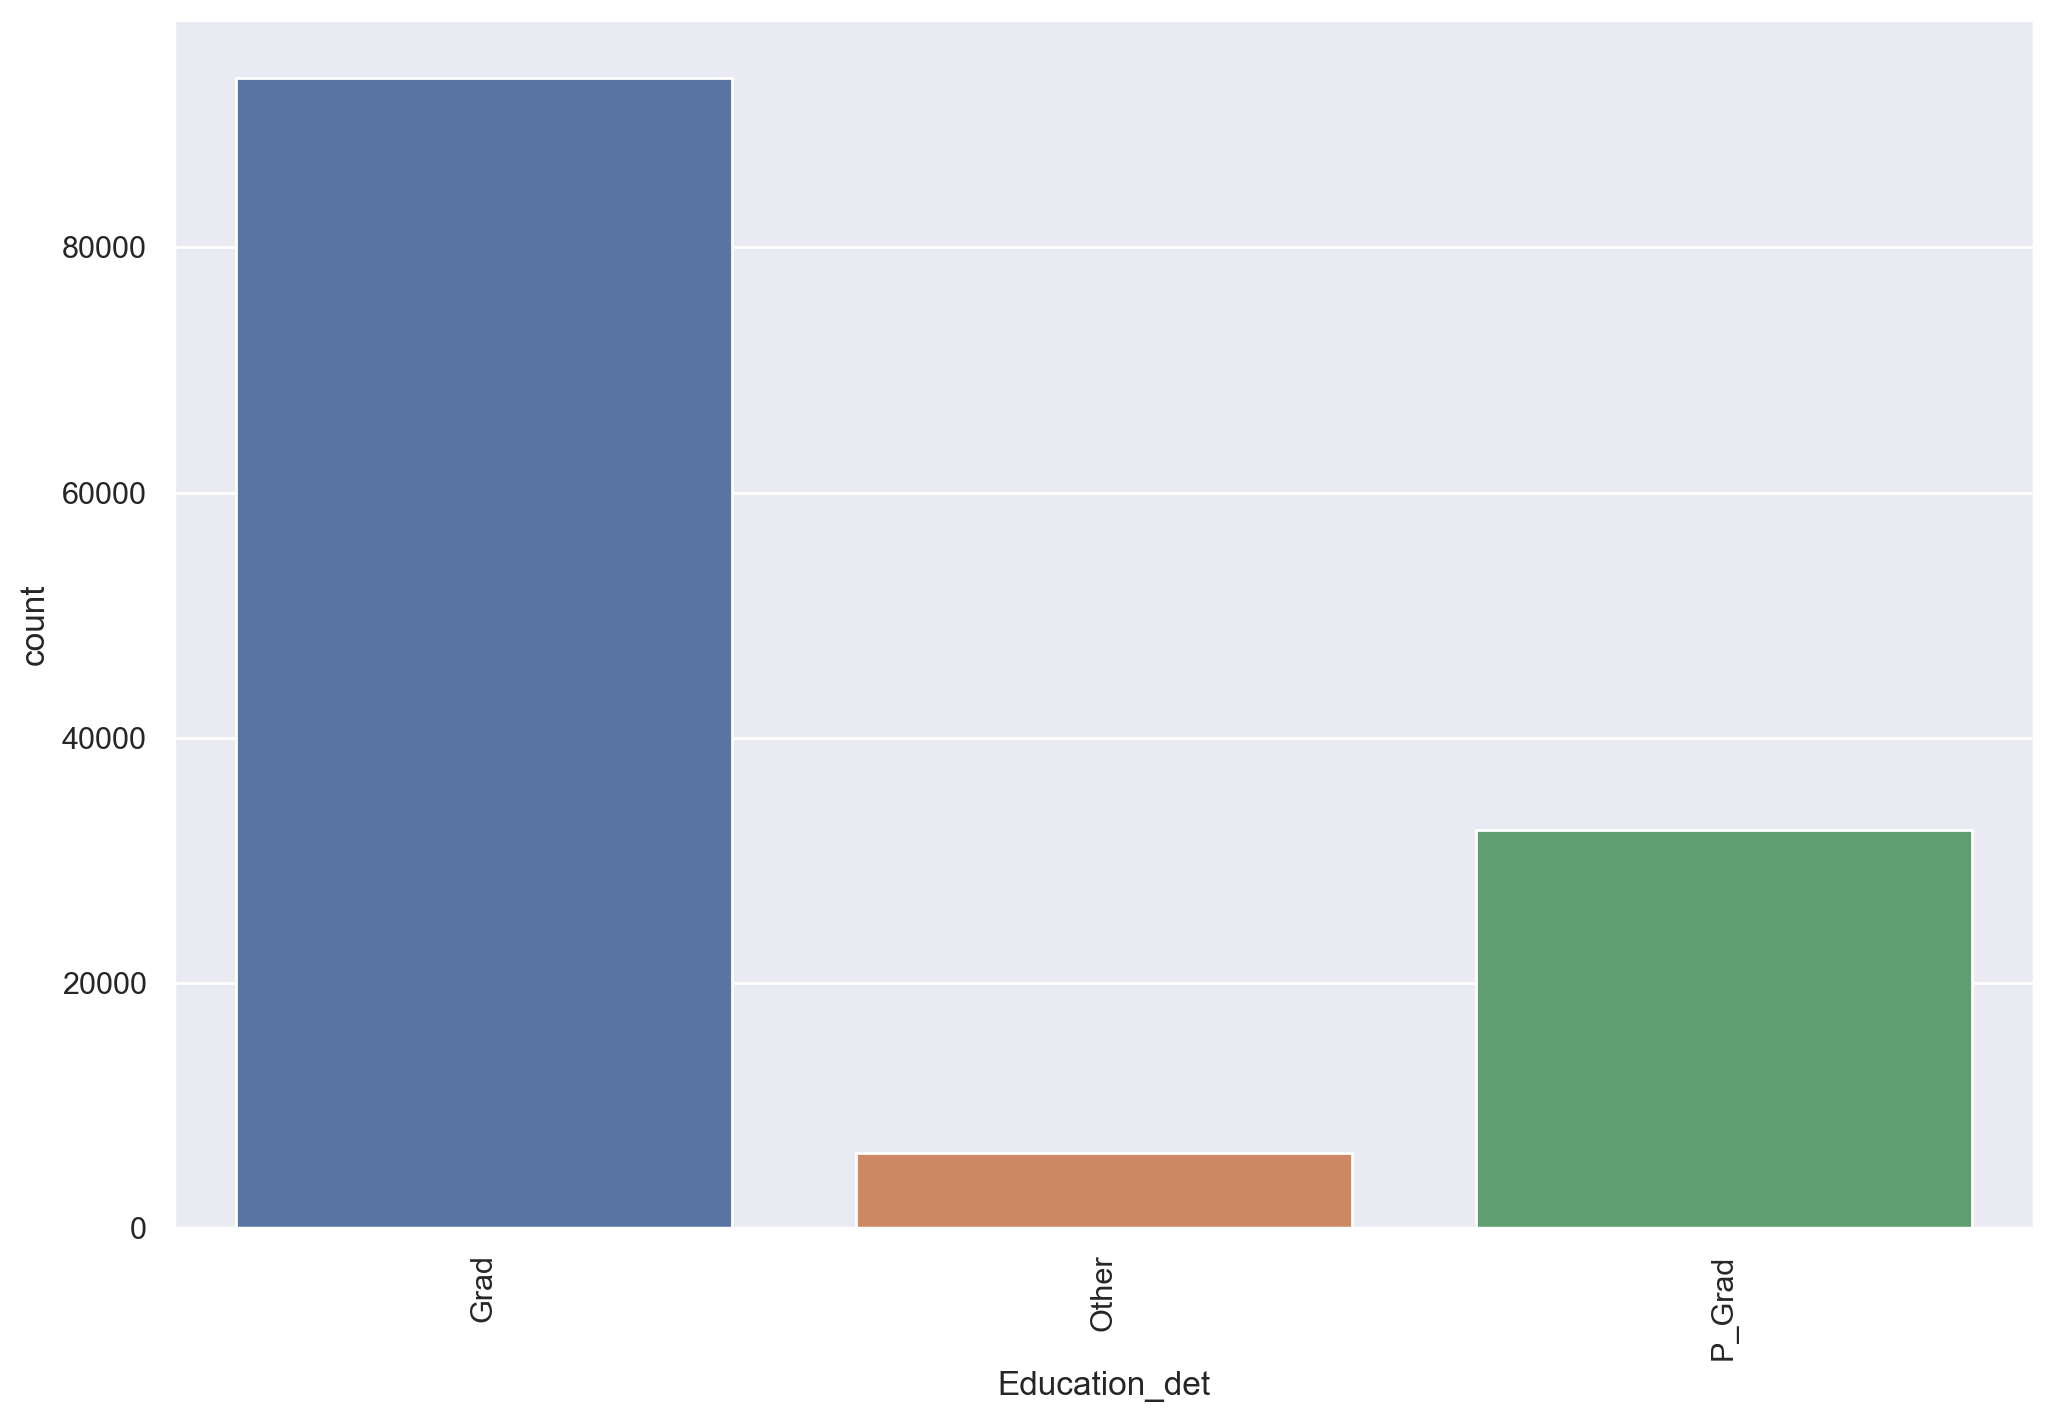

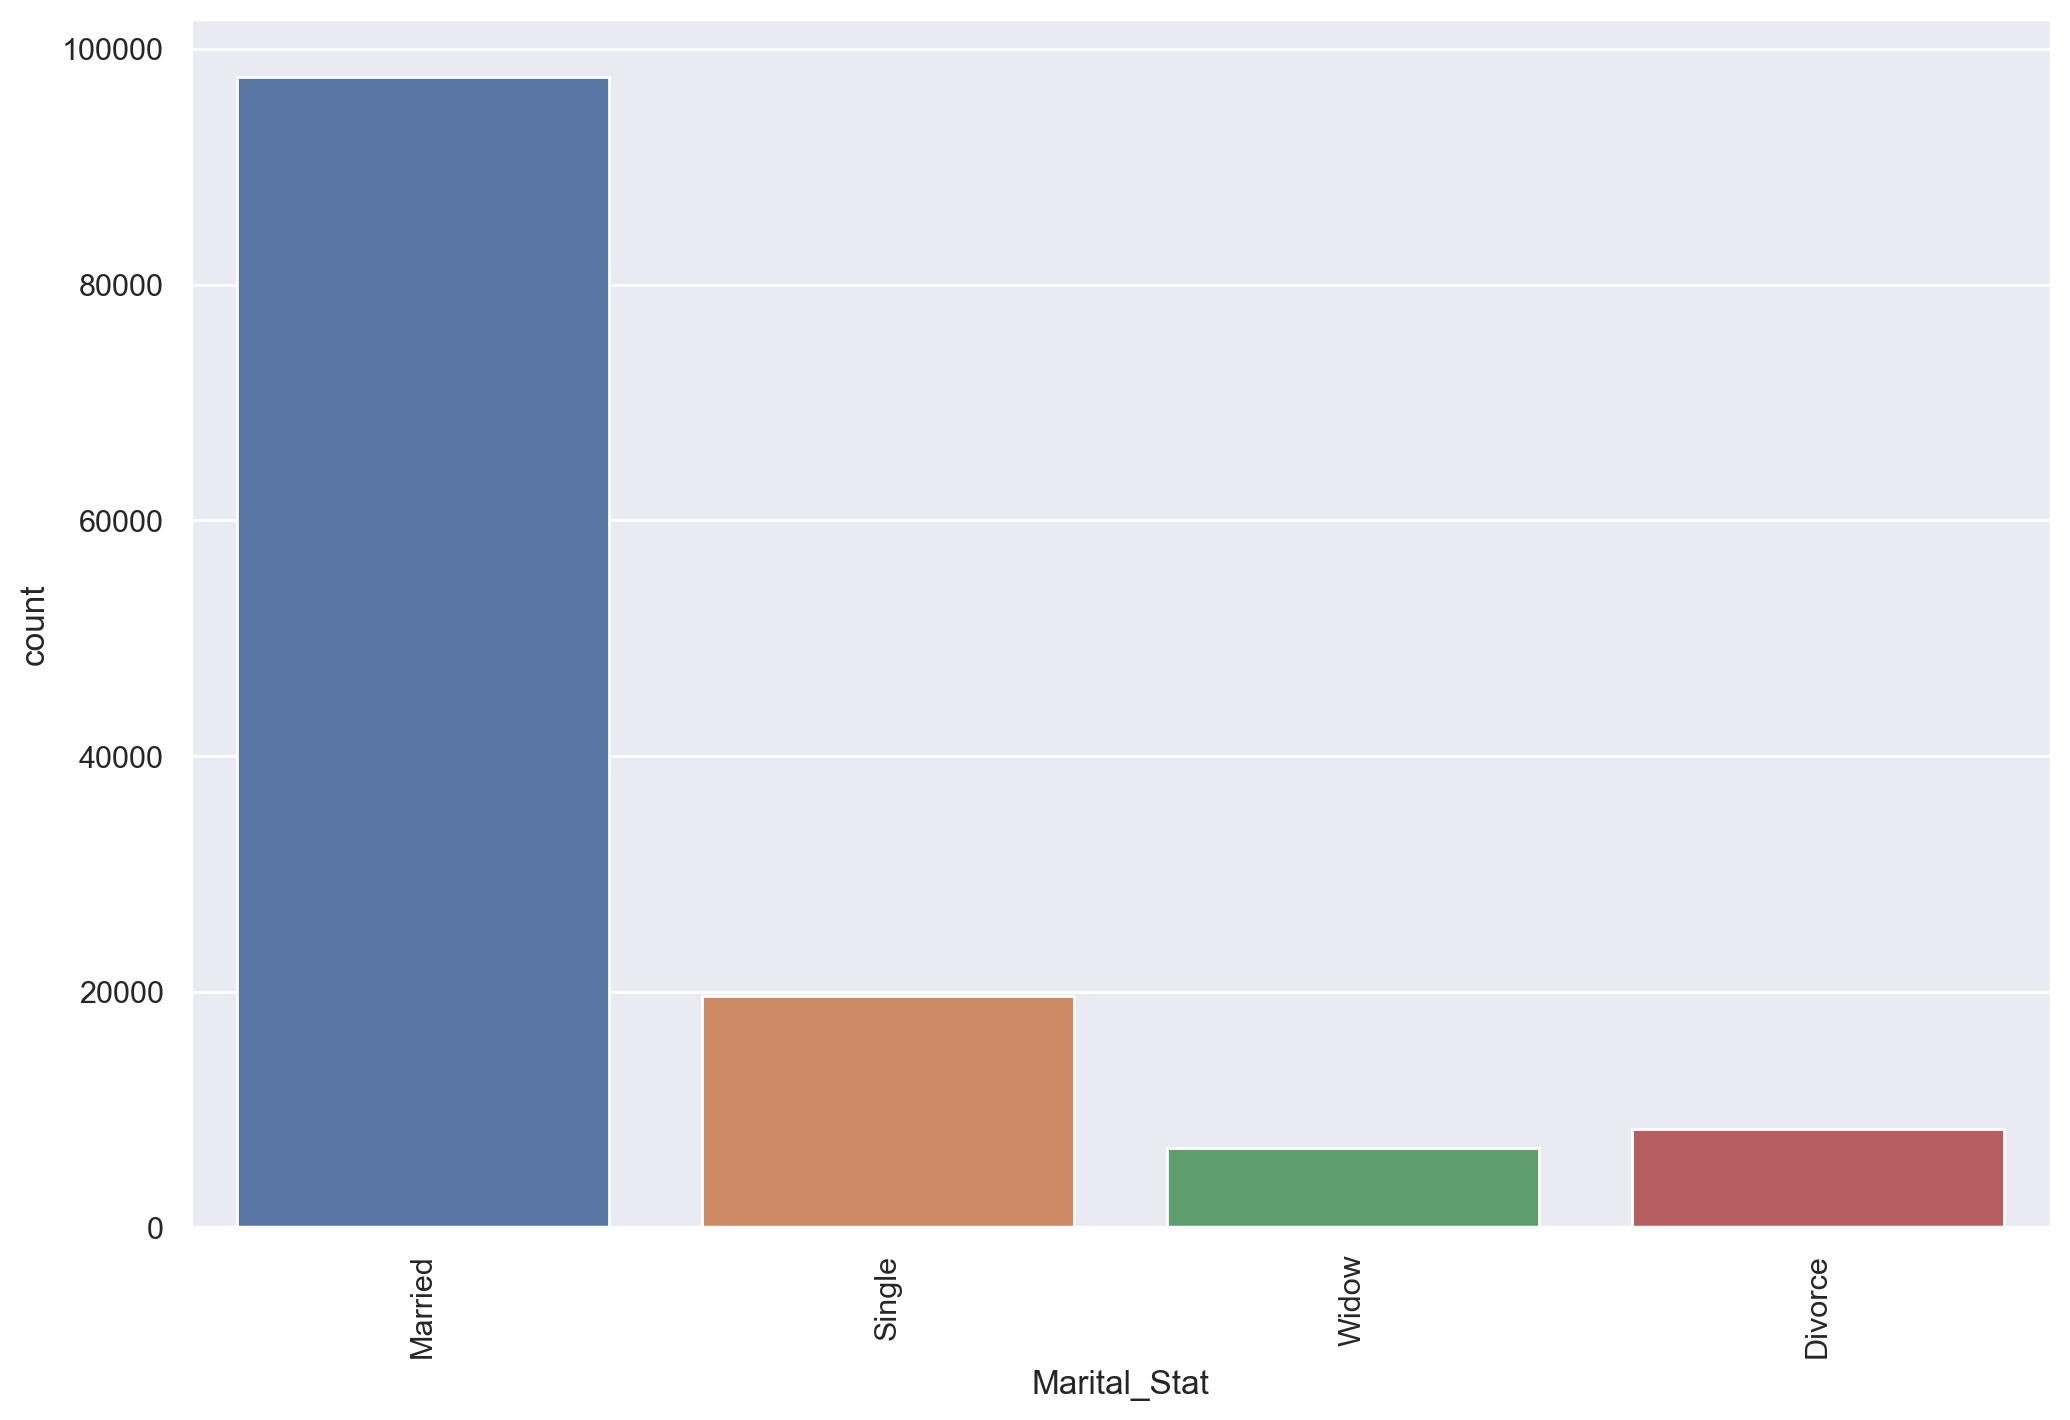

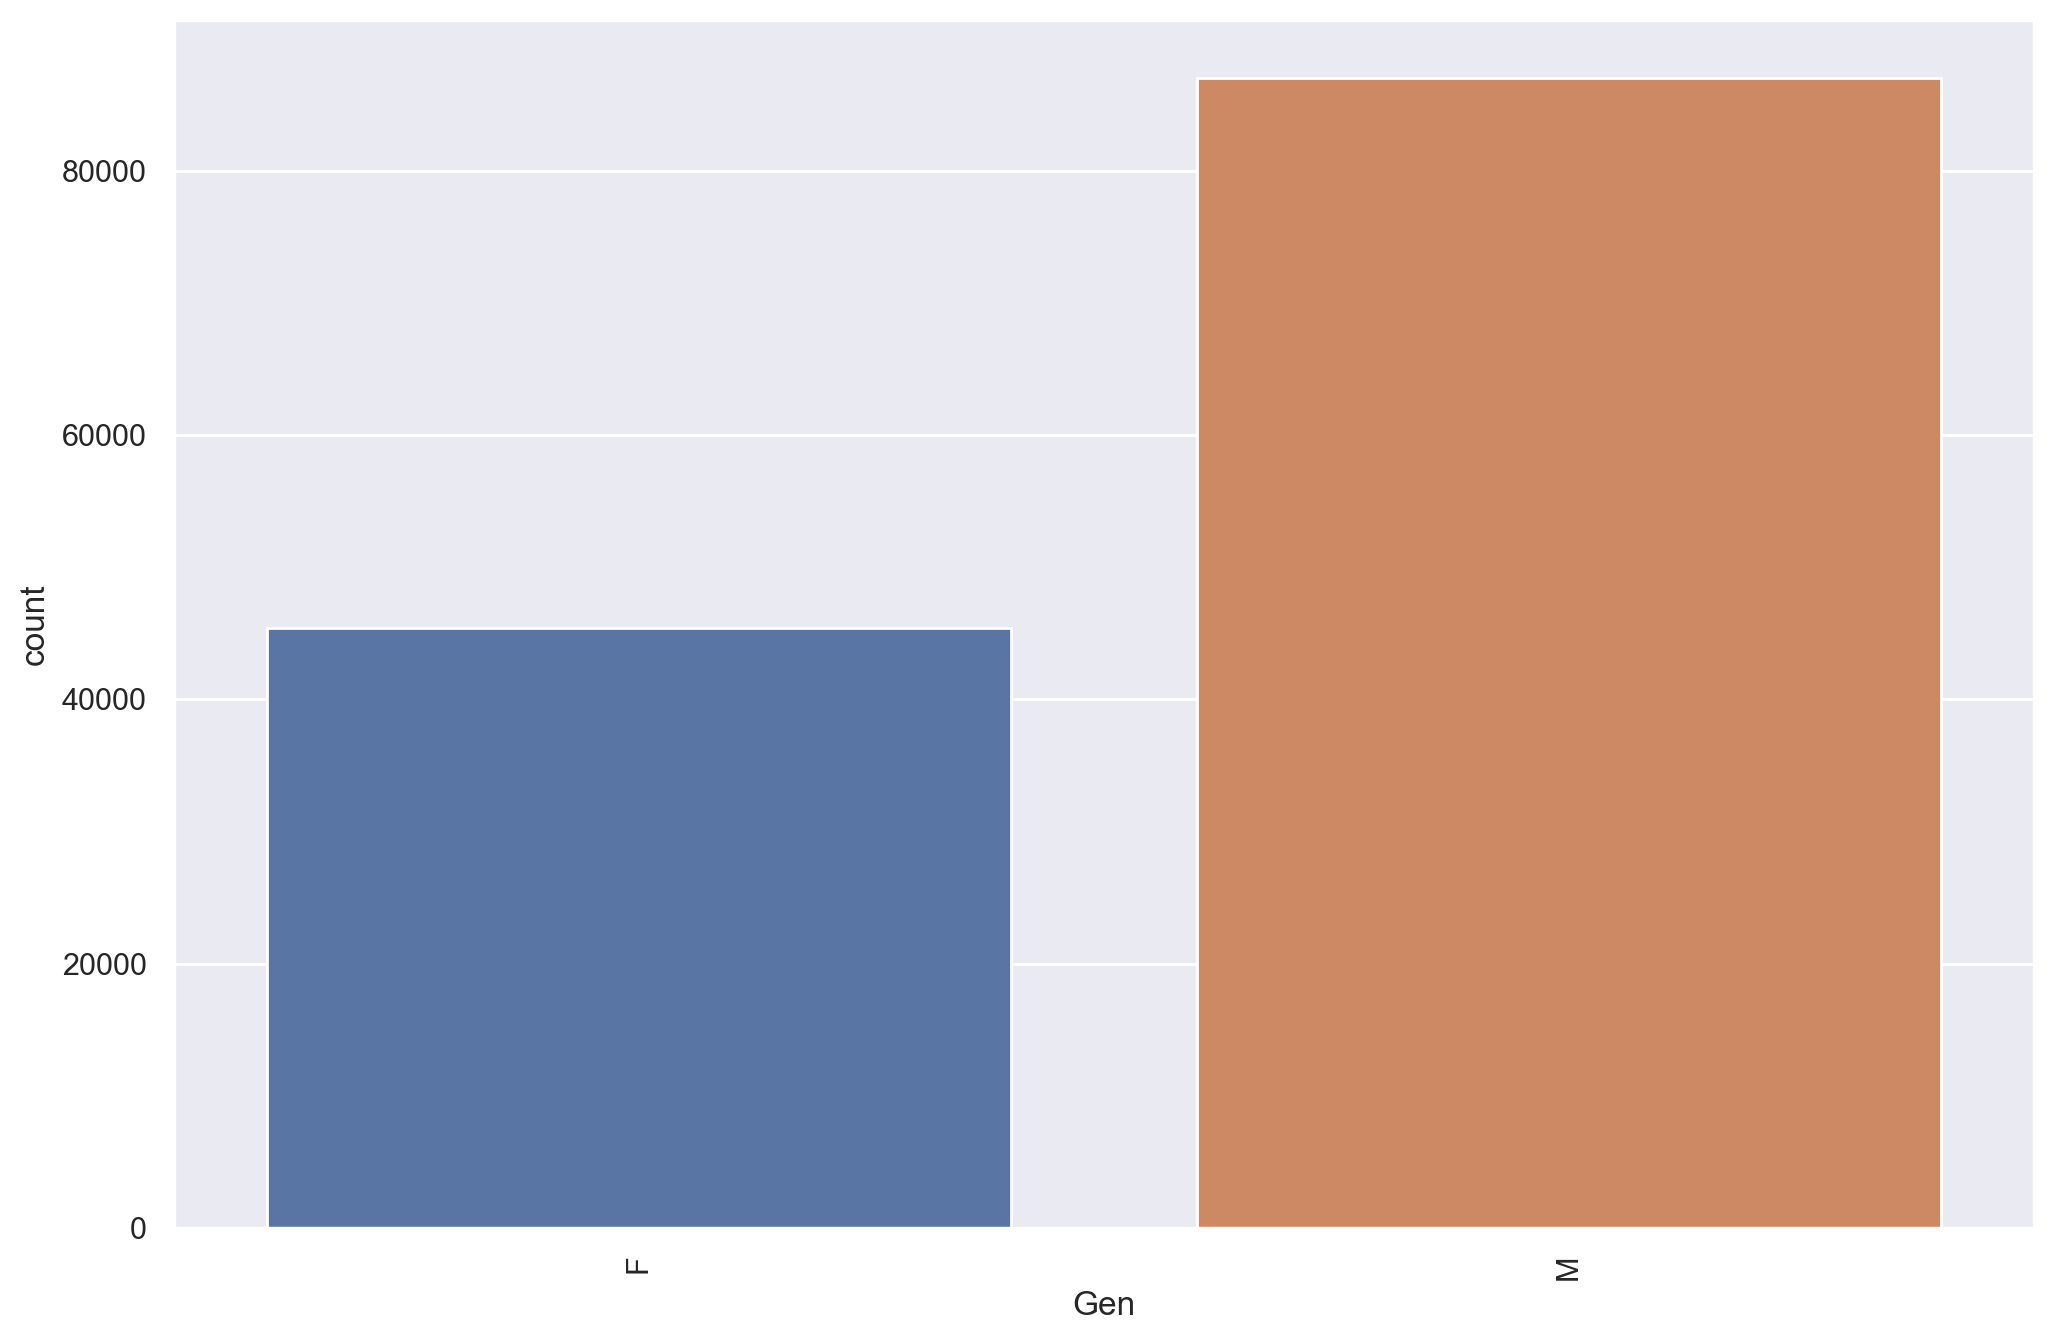

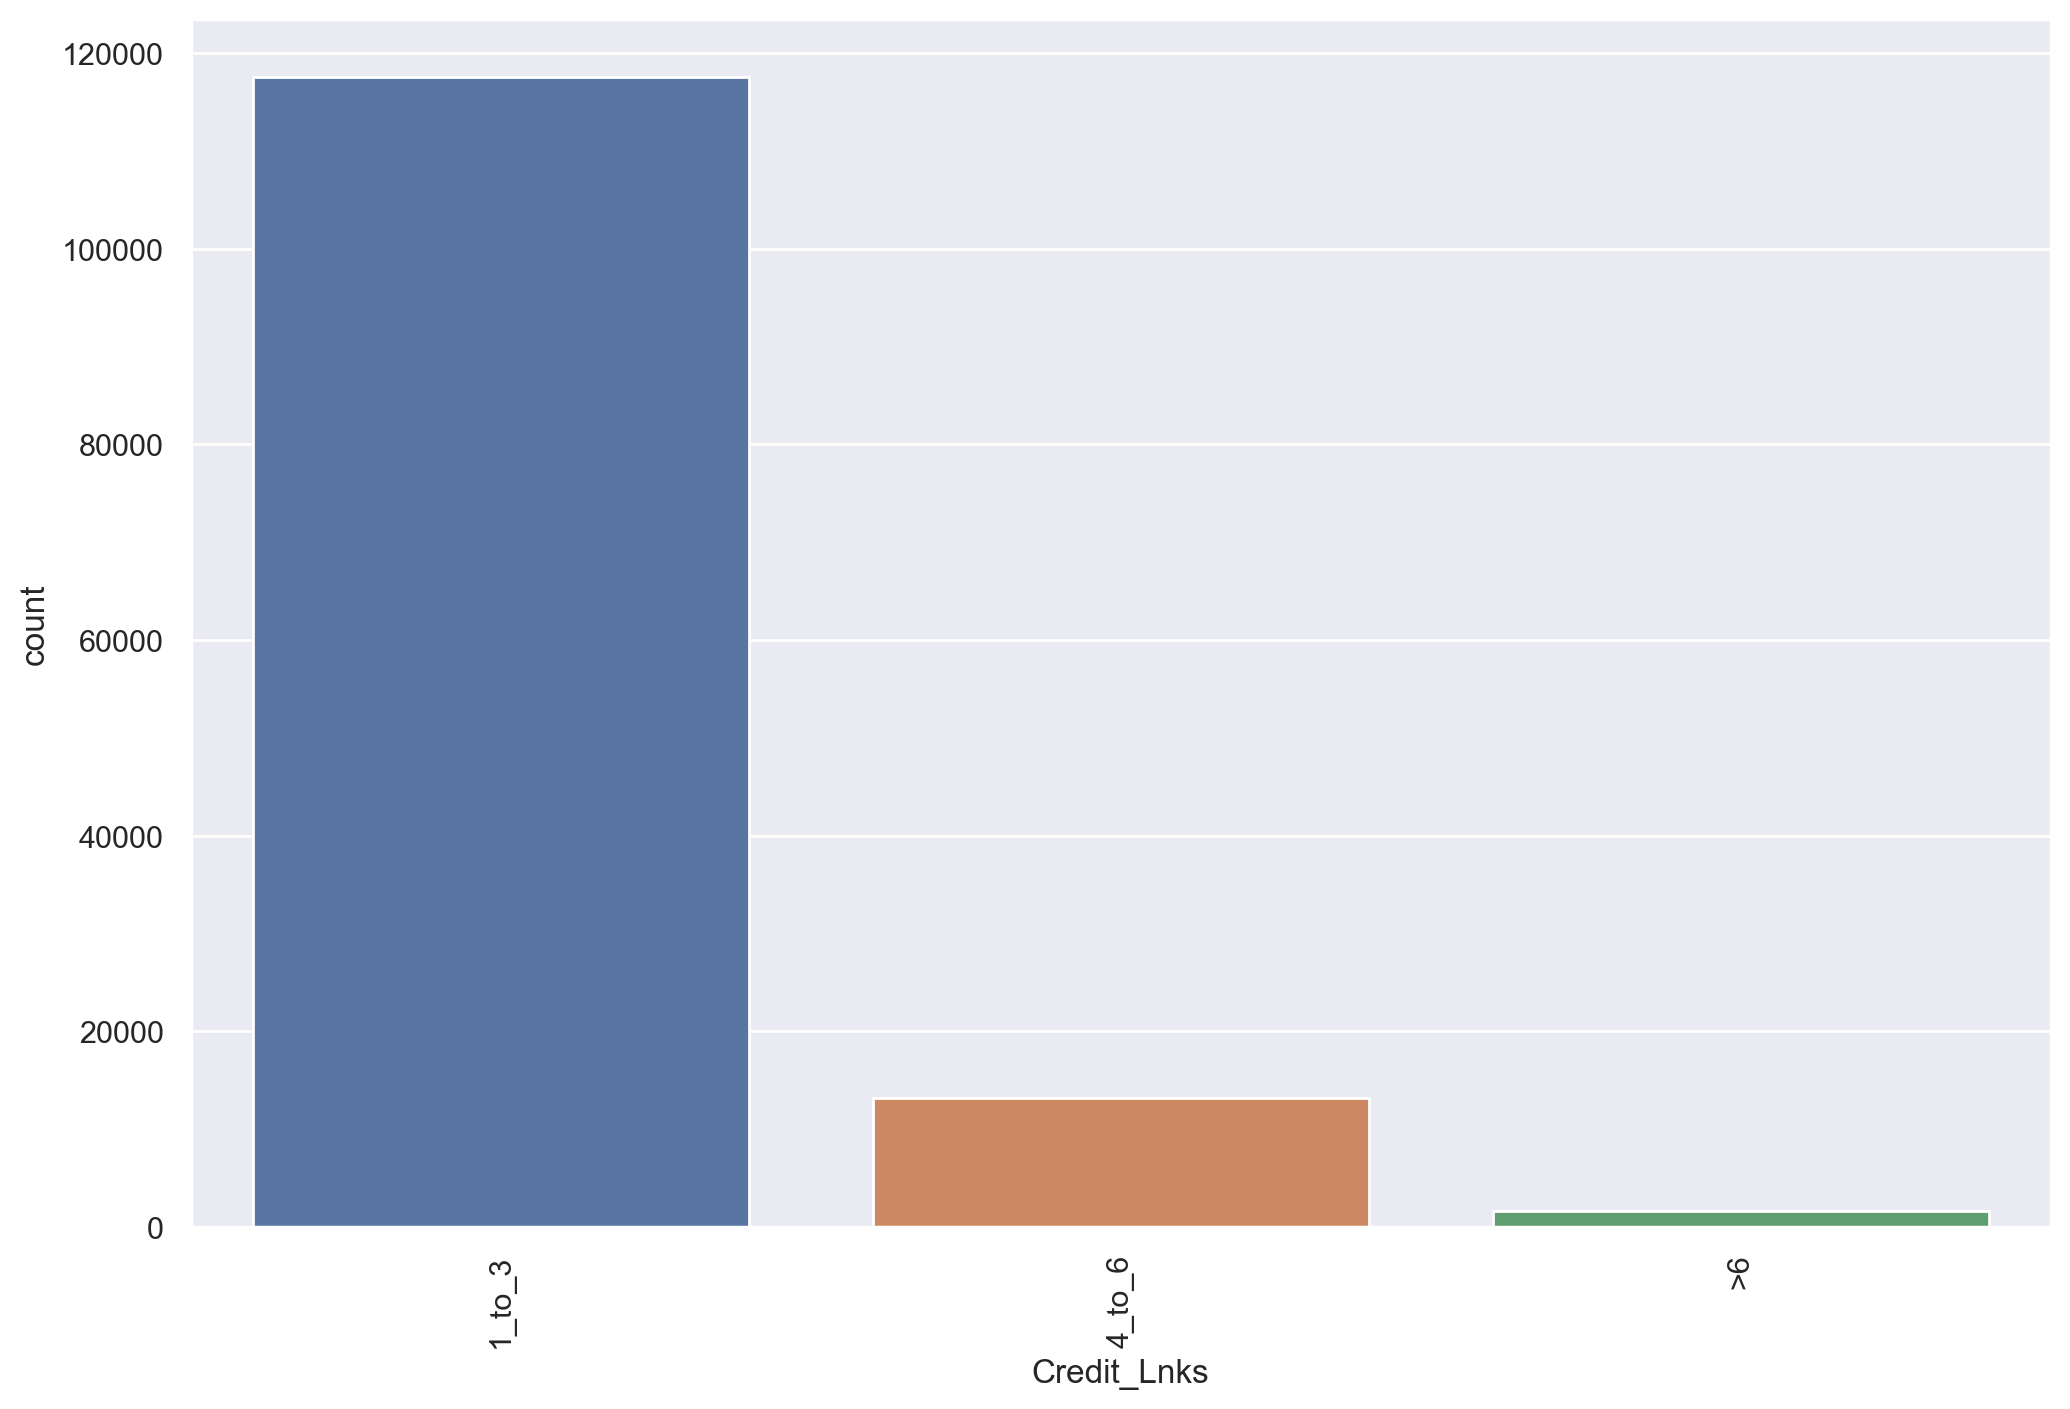

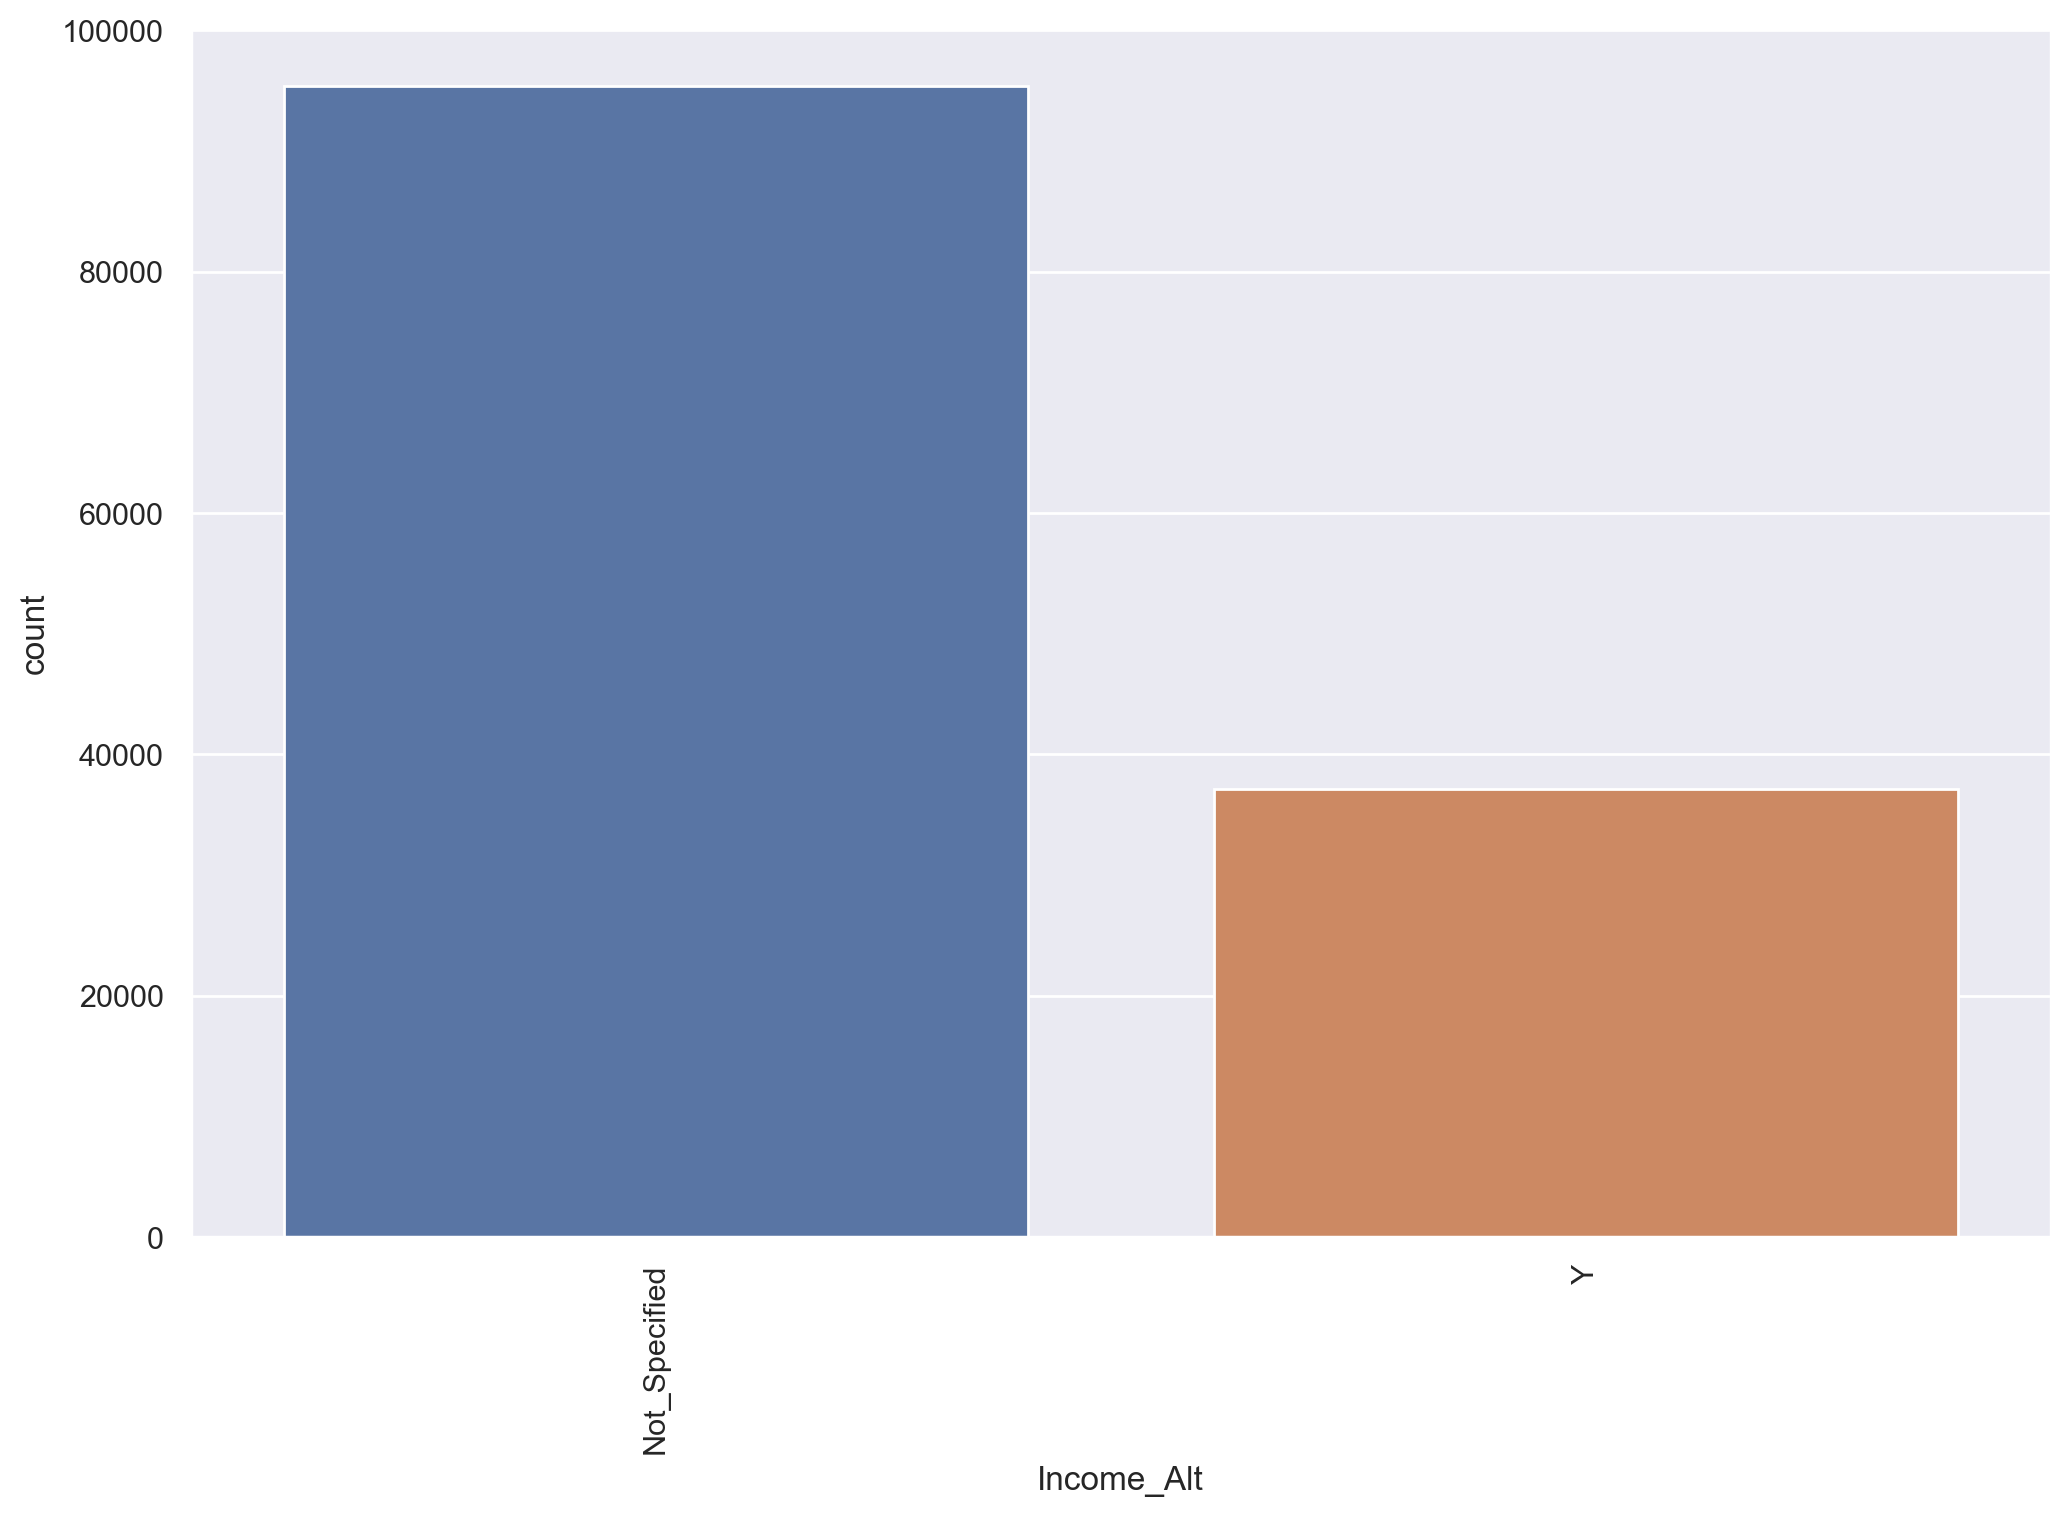

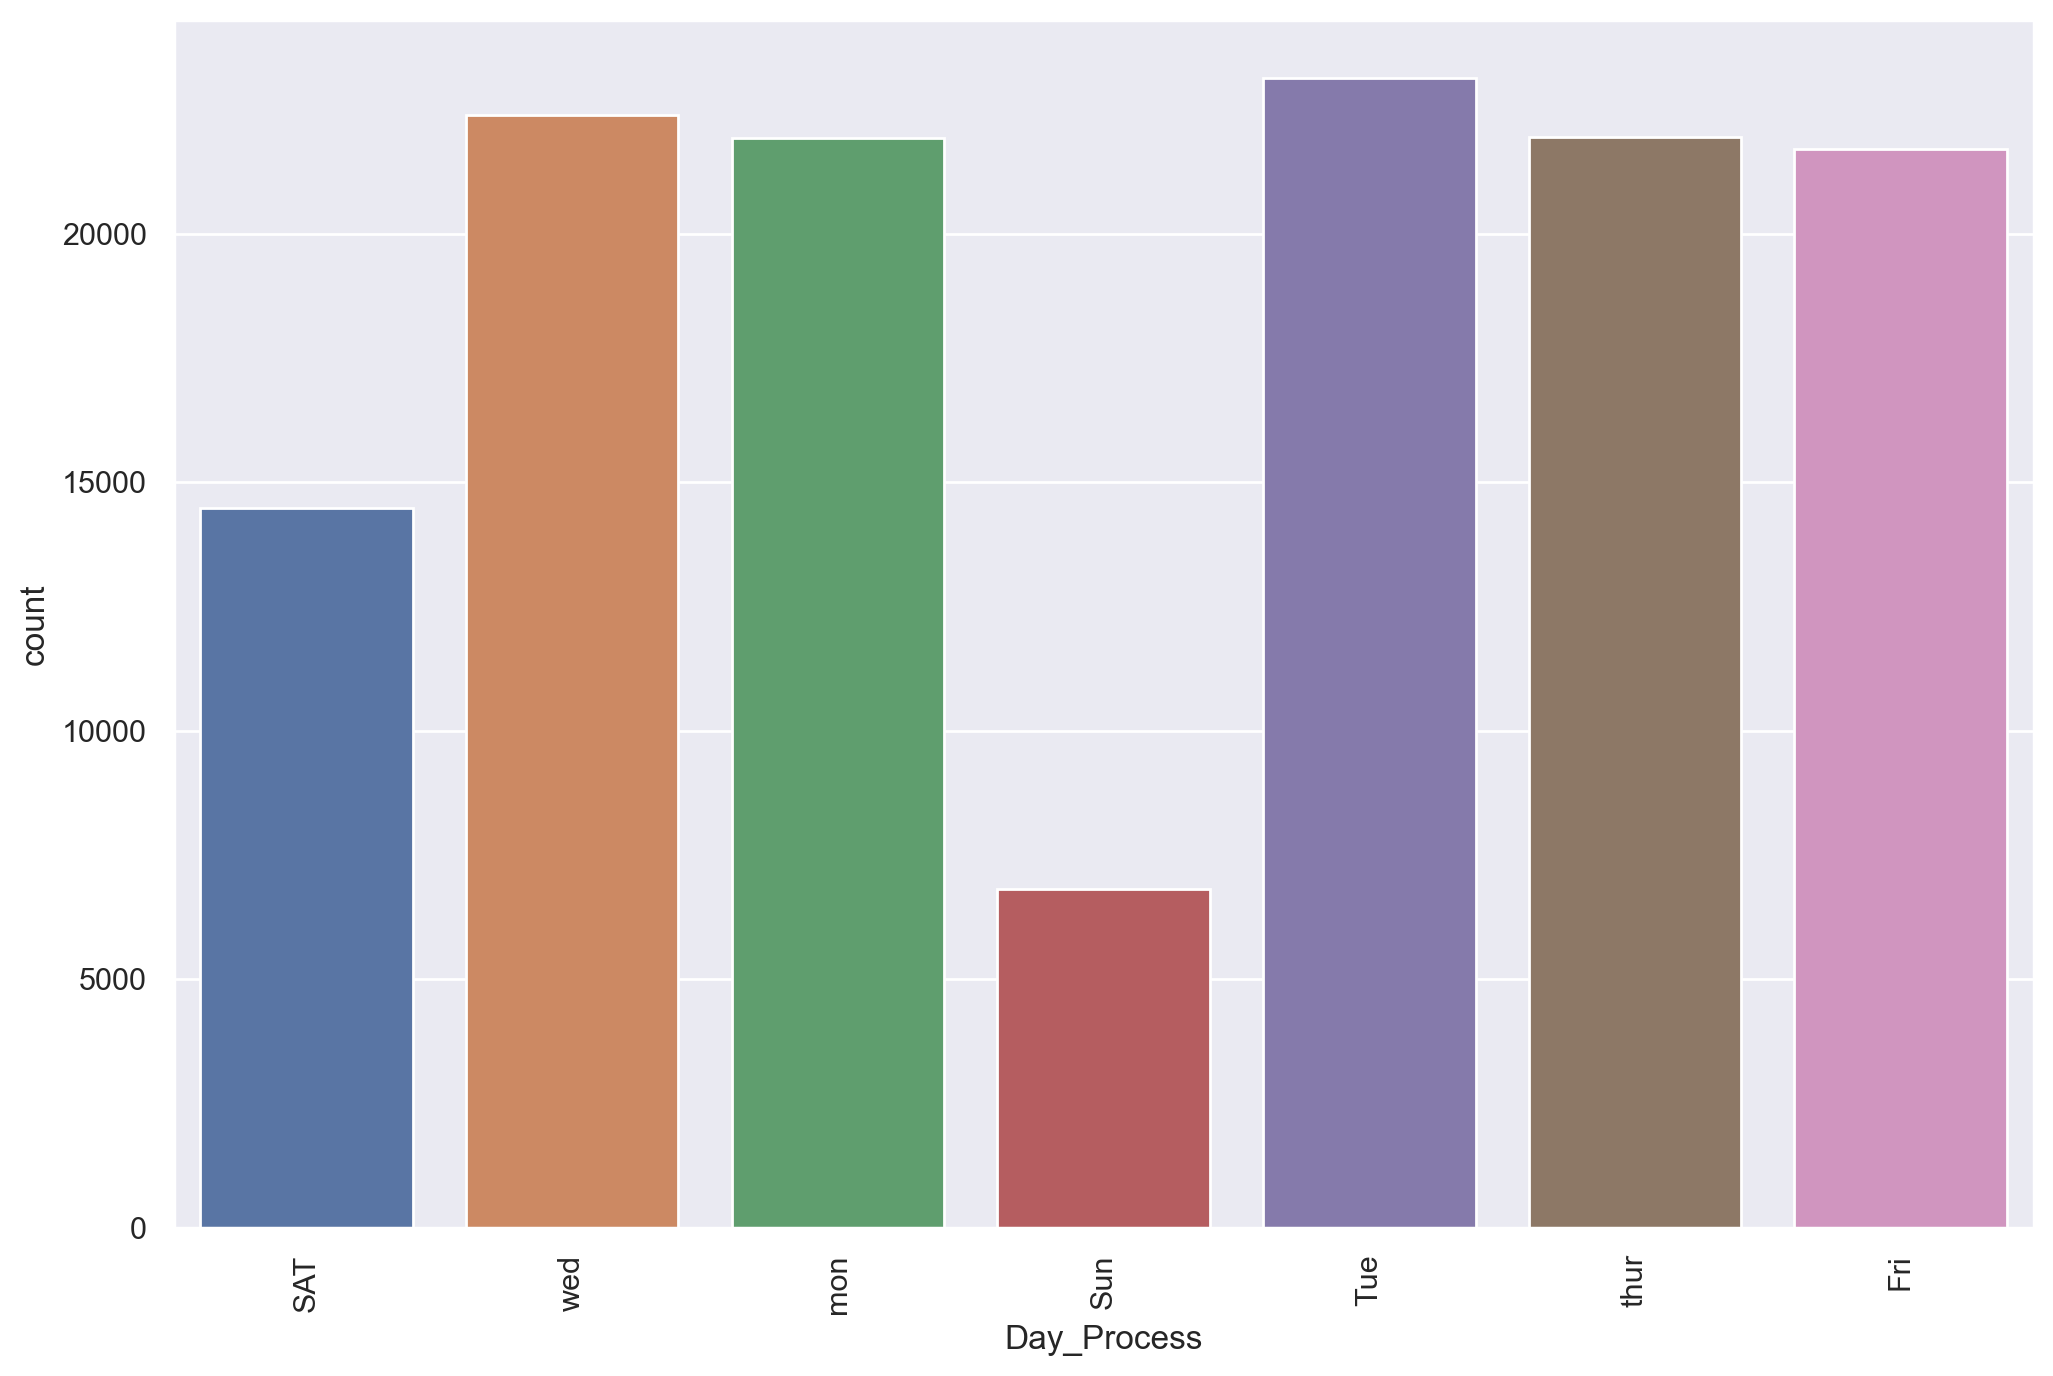

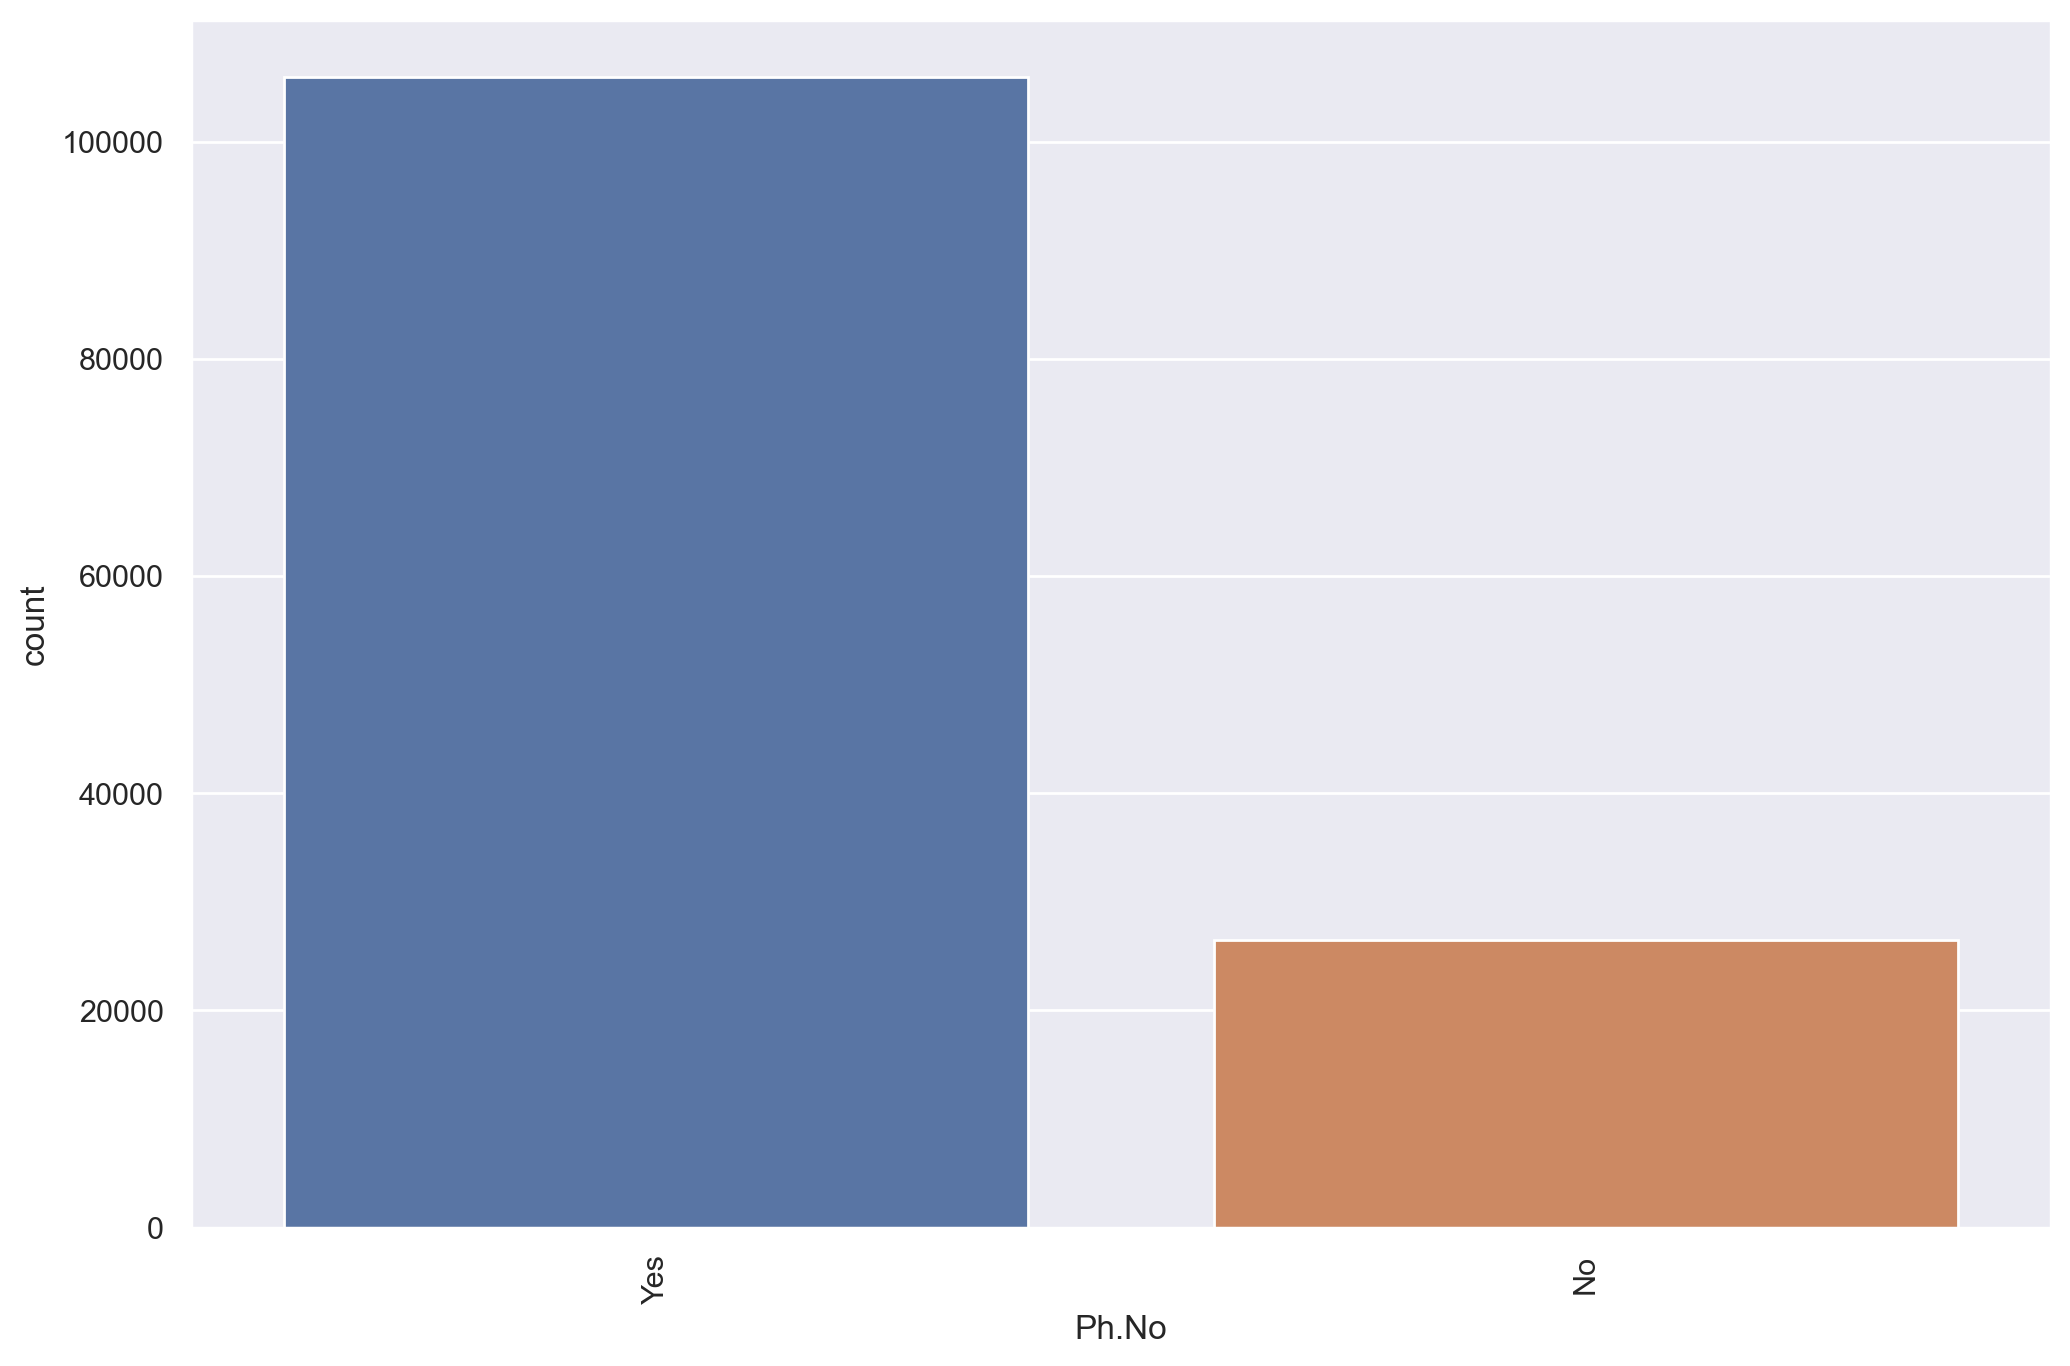

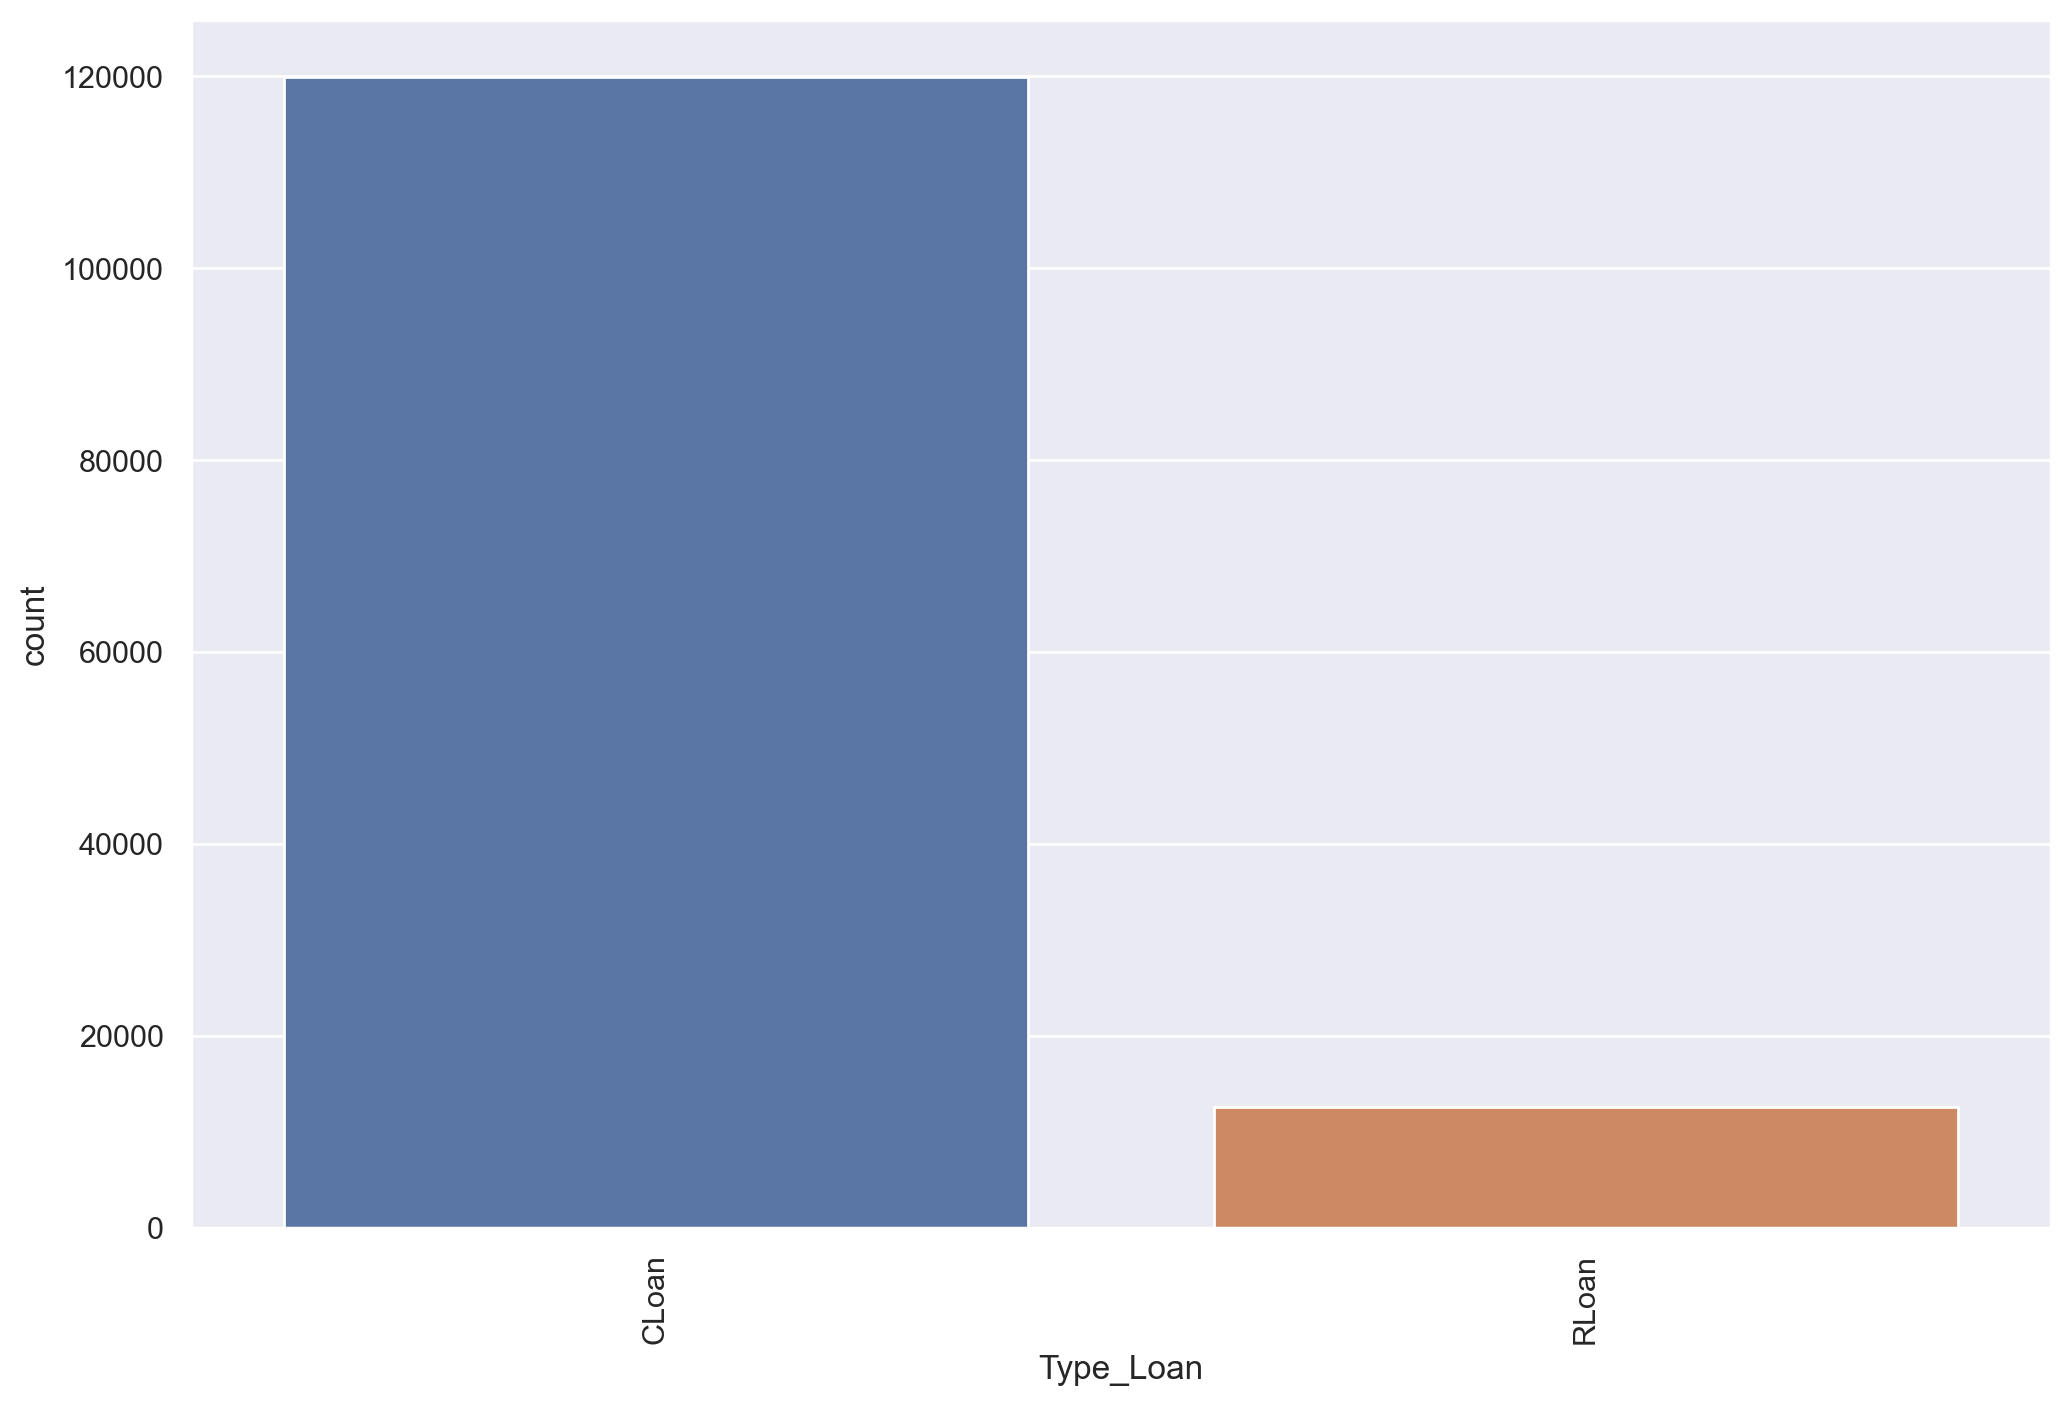

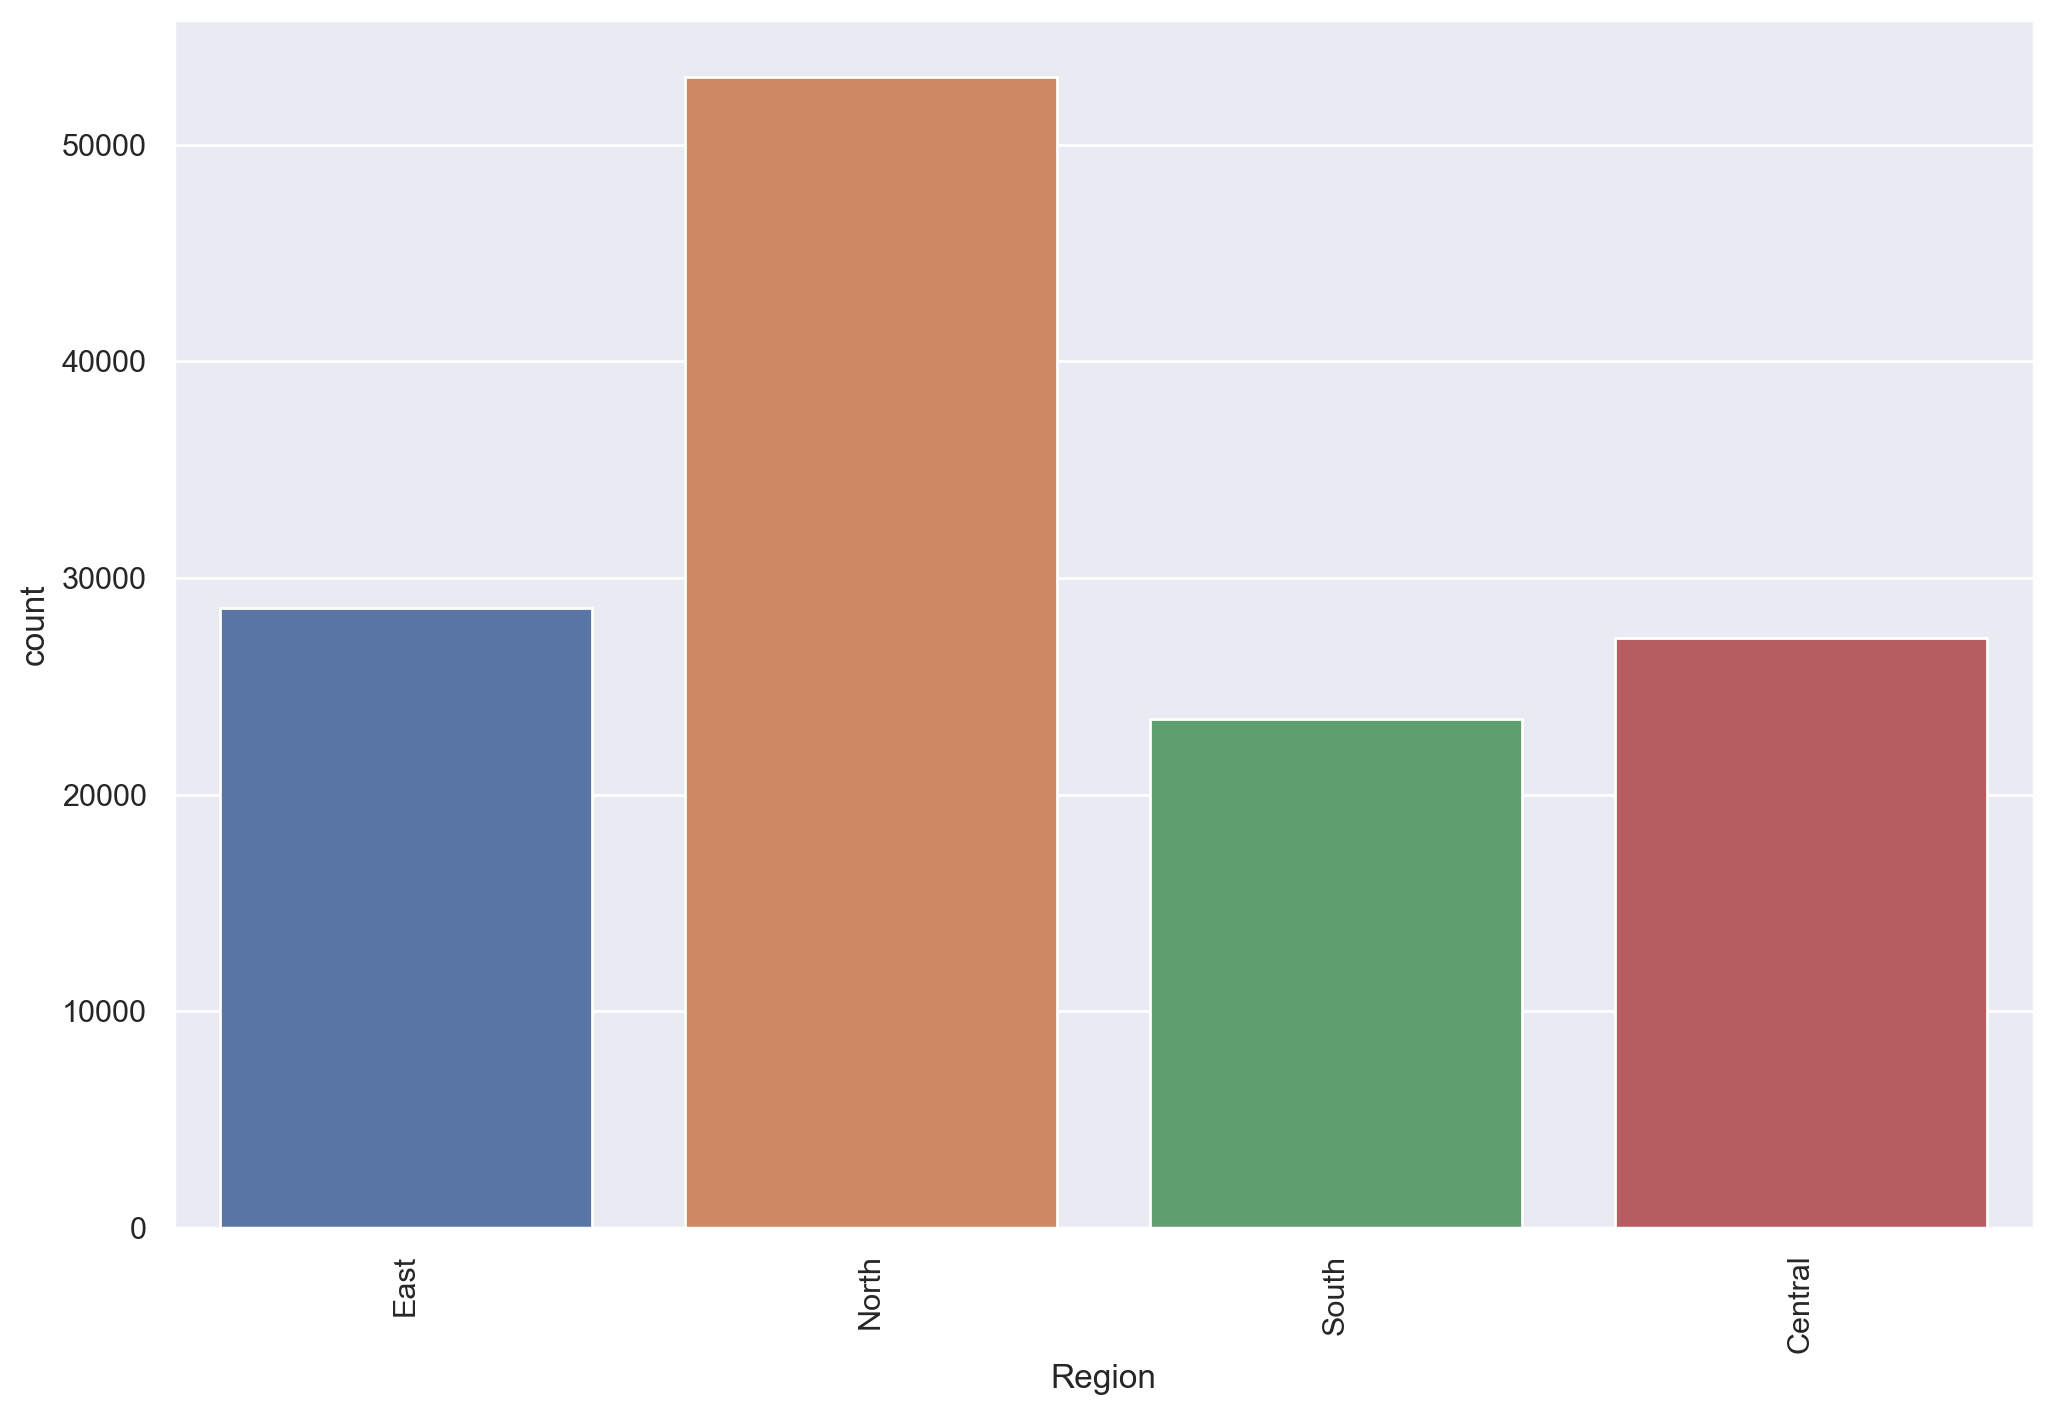

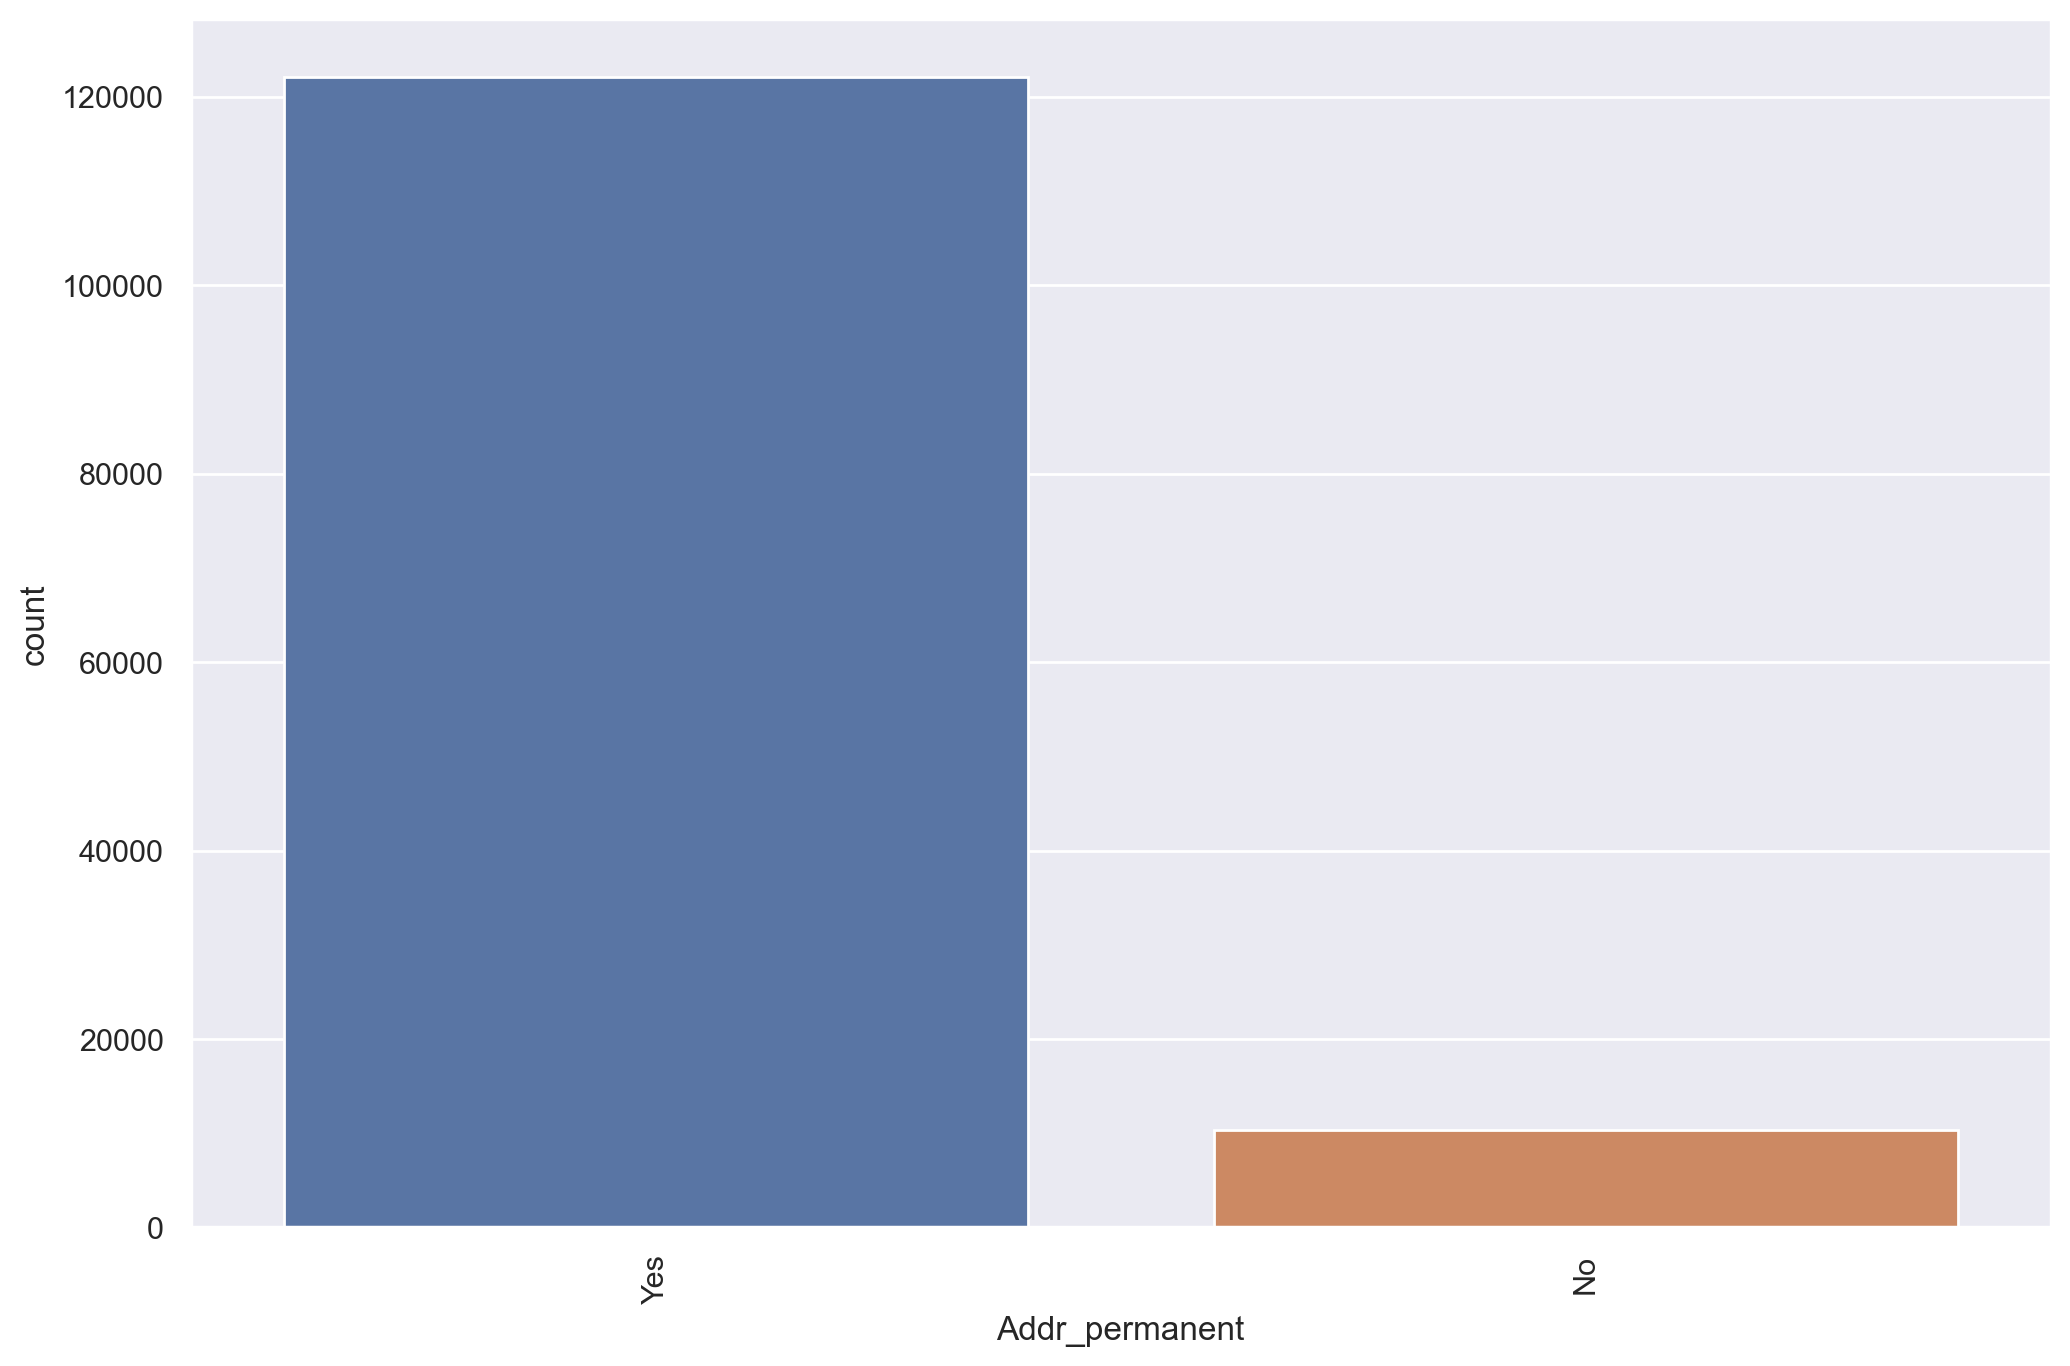

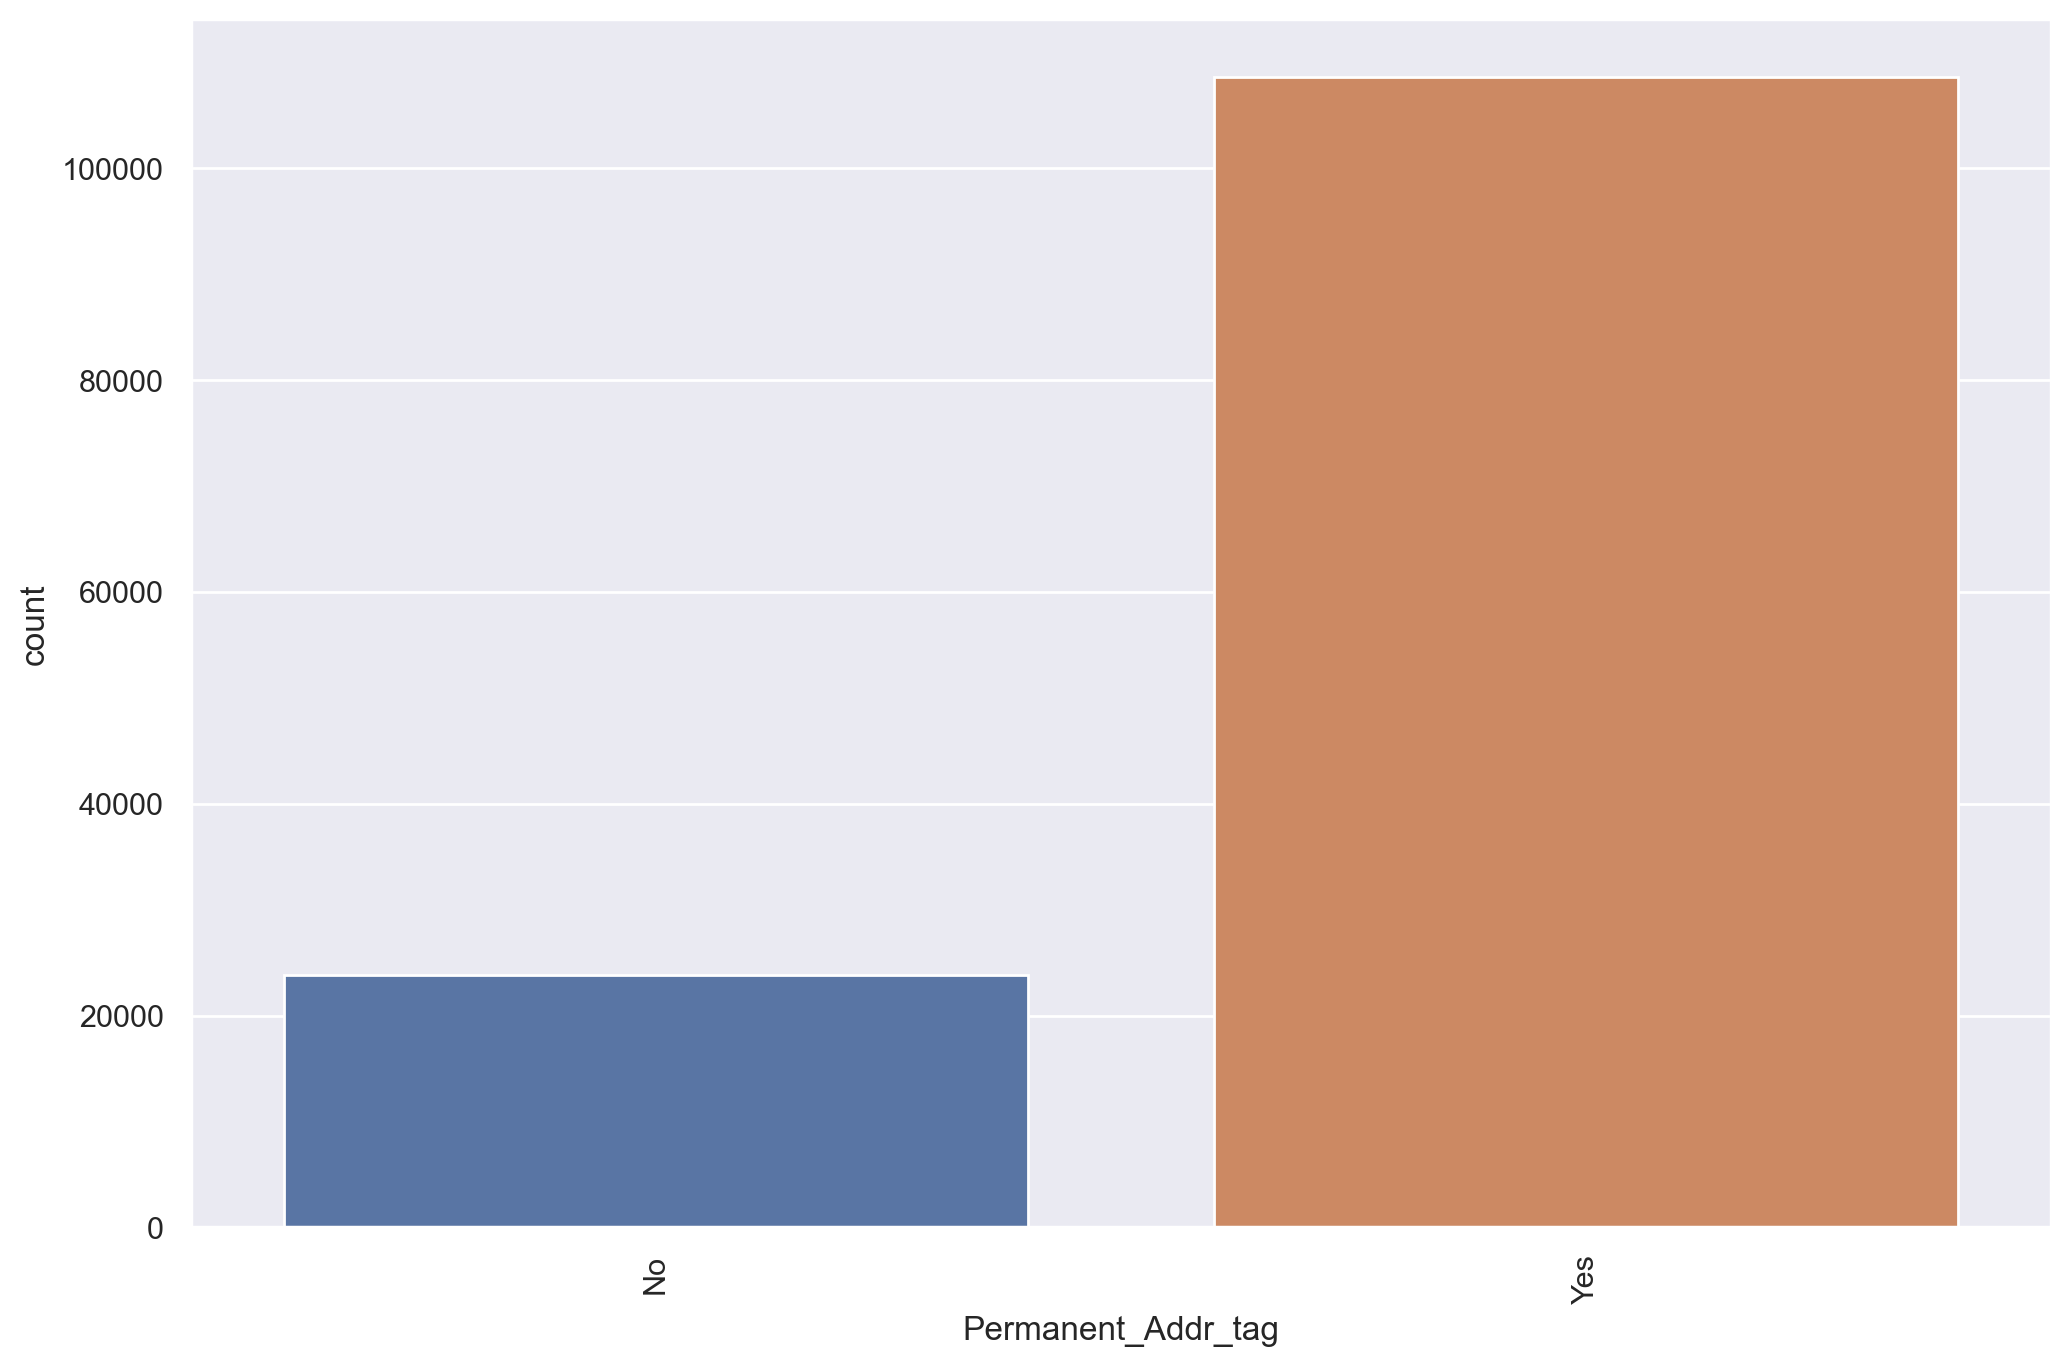

In [112]:
catcols=dfcat.columns
for i in catcols:
    plt.figure(figsize=(12,8),dpi=200)
    sns.countplot(x=df[i],data=df)
    plt.xticks(rotation=90);

In [113]:
## now we perform bivartite Analysis

In [114]:
dfnum.columns

Index(['Compensation', 'Loan_amt', 'Annuity_amt', 'Home_Appliances',
       'Experience', 'Dependents', 'Age', 'hour_Process', 'Contact_age',
       'Default'],
      dtype='object')

In [115]:
#plt.figure(figsize=(12,8),dpi=200)
#sns.boxplot(x=df['Compensation'],y=df['Default'])
#plt.xticks(rotation=90)

In [116]:
#plt.figure(figsize=(12,8),dpi=200)
#sns.boxplot(x=df['Loan_amt'],y=df['Default'])
#plt.xticks(rotation=90)

In [117]:
#plt.figure(figsize=(12,8),dpi=200)
#sns.boxplot(x=df['Annuity_amt'],y=df['Default'])
#plt.xticks(rotation=90)

In [118]:
#plt.figure(figsize=(12,8),dpi=200)
#sns.boxplot(x=df['Home_Appliances'],y=df['Default'])
#plt.xticks(rotation=90)

In [119]:
#plt.figure(figsize=(12,8),dpi=200)
#sns.boxplot(x=df['Experience'],y=df['Default'])
#plt.xticks(rotation=90)

In [120]:
#plt.figure(figsize=(12,8),dpi=200)
#sns.boxplot(x=df['Dependents'],y=df['Default'])
#plt.xticks(rotation=90)

In [121]:
#plt.figure(figsize=(12,8),dpi=200)
#sns.boxplot(x=df['Age'],y=df['Default'])
#plt.xticks(rotation=90)

In [122]:
#plt.figure(figsize=(12,8),dpi=200)
#sns.boxplot(x=df['hour_Process'],y=df['Default'])
#plt.xticks(rotation=90)

In [123]:
## now we check the Analysis between catgorical and target variable

In [124]:
dfcat.columns

Index(['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List',
       'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen',
       'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan',
       'Region', 'Addr_permanent', 'Permanent_Addr_tag'],
      dtype='object')

In [125]:
dfnum.columns

Index(['Compensation', 'Loan_amt', 'Annuity_amt', 'Home_Appliances',
       'Experience', 'Dependents', 'Age', 'hour_Process', 'Contact_age',
       'Default'],
      dtype='object')

In [126]:
df['Vehicle_Status'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Vehicle_Status'],df['Default']))

(5.549853013155842,
 0.01848223896804752,
 1,
 array([[64245.66698883, 23080.33301117],
        [33190.33301117, 11923.66698883]]))

In [127]:
df['Job_Type'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Job_Type'],df['Default']))

(3.156472980574935,
 0.2063386577672958,
 2,
 array([[20505.4076714 ,  7366.5923286 ],
        [53413.23219571, 19188.76780429],
        [23517.36013289,  8448.63986711]]))

In [128]:
df['Default_hist'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Default_hist'],df['Default']))

(0.03667875054424519,
 0.8481205849436796,
 1,
 array([[ 9762.7281788,  3507.2718212],
        [87673.2718212, 31496.7281788]]))

In [129]:
 dfcat.columns

Index(['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List',
       'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen',
       'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan',
       'Region', 'Addr_permanent', 'Permanent_Addr_tag'],
      dtype='object')

In [130]:
df['Prop_List'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Prop_List'],df['Default']))

(1.195899986110452,
 0.5499378577460812,
 2,
 array([[19051.66608275,  6844.33391725],
        [ 9578.80338266,  3441.19661734],
        [68805.53053458, 24718.46946542]]))

In [131]:
df['Region_Type'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Region_Type'],df['Default']))

(0.8661648696452982,
 0.6485070300394429,
 2,
 array([[79122.97589852, 28425.02410148],
        [16389.9064331 ,  5888.0935669 ],
        [ 1923.11766838,   690.88233162]]))

In [132]:
df['Credit_Inq'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Credit_Inq'],df['Default']))

(27.701277129335857,
 4.196038906644572e-06,
 3,
 array([[51323.84651163, 18438.15348837],
        [22337.29864089,  8024.70135911],
        [17052.03569918,  6125.96430082],
        [ 6722.81914829,  2415.18085171]]))

In [133]:
df['Education_det'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Education_det'],df['Default']))

(40.13522043802391,
 1.9264050891742744e-09,
 2,
 array([[69051.25406222, 24806.74593778],
        [ 4506.15750529,  1618.84249471],
        [23878.5884325 ,  8578.4115675 ]]))

In [134]:
df['Marital_Stat'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Marital_Stat'],df['Default']))

(2.127549011974109,
 0.5463595477295753,
 3,
 array([[ 6173.25185744,  2217.74814256],
        [71810.86170341, 25798.13829659],
        [14466.78876472,  5197.21123528],
        [ 4985.09767442,  1790.90232558]]))

In [135]:
dfcat.columns

Index(['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List',
       'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen',
       'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan',
       'Region', 'Addr_permanent', 'Permanent_Addr_tag'],
      dtype='object')

In [136]:
df['Gen'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Gen'],df['Default']))

(30.458956225146302,
 3.4100533933451334e-08,
 1,
 array([[33383.82189671, 11993.17810329],
        [64052.17810329, 23010.82189671]]))

In [137]:
df['Credit_Lnks'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Credit_Lnks'],df['Default']))

(17.60046824809826,
 0.0001506977889884217,
 2,
 array([[86521.16689822, 31082.83310178],
        [ 9697.98665056,  3484.01334944],
        [ 1216.84645122,   437.15354878]]))

In [138]:
df['Income_Alt'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Income_Alt'],df['Default']))

(3.1526876386823255,
 0.07580201550229773,
 1,
 array([[70147.44584718, 25200.55415282],
        [27288.55415282,  9803.44584718]]))

In [139]:
df['Day_Process'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Day_Process'],df['Default']))

(5.105300712434133,
 0.5303802959808281,
 6,
 array([[15965.40800362,  5735.59199638],
        [10659.54548475,  3829.45451525],
        [ 5019.67553609,  1803.32446391],
        [17028.49332528,  6117.50667472],
        [16138.29731199,  5797.70268801],
        [16154.48269405,  5803.51730595],
        [16470.09764422,  5916.90235578]]))

In [140]:
df['Ph.No'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Ph.No'],df['Default']))

(12.238480531313042,
 0.0004681393640809499,
 1,
 array([[19493.08559348,  7002.91440652],
        [77942.91440652, 28001.08559348]]))

In [141]:
df['Type_Loan'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Type_Loan'],df['Default']))

(4.133893904086424,
 0.04203252809399782,
 1,
 array([[88230.93180308, 31697.06819692],
        [ 9205.06819692,  3306.93180308]]))

In [142]:
df['Region'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Region'],df['Default']))

(13.034757822231919,
 0.004562039398780933,
 3,
 array([[20030.88169737,  7196.11830263],
        [21052.03216551,  7562.96783449],
        [39066.36239807, 14034.63760193],
        [17286.72373905,  6210.27626095]]))

In [143]:
df['Addr_permanent'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Addr_permanent'],df['Default']))

(39.06050248083774,
 4.108728592149503e-10,
 1,
 array([[ 7608.60096648,  2733.39903352],
        [89827.39903352, 32270.60096648]]))

In [144]:
df['Permanent_Addr_tag'].value_counts()
df['Default'].value_counts()
stats.chi2_contingency(pd.crosstab(df['Permanent_Addr_tag'],df['Default']))

(2.7276274041741044,
 0.0986257022487227,
 1,
 array([[17527.2973724,  6296.7026276],
        [79908.7026276, 28707.2973724]]))

In [145]:
len(df.columns)

27

In [146]:
dfcat.columns

Index(['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List',
       'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen',
       'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan',
       'Region', 'Addr_permanent', 'Permanent_Addr_tag'],
      dtype='object')

In [147]:
df=df.drop(columns=['Job_Type','Default_hist','Prop_List','Region_Type','Marital_Stat','Day_Process'],axis=1)
df.head(3)

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,Home_Appliances,Credit_Inq,Education_det,Gen,Credit_Lnks,Experience,...,Ph.No,Type_Loan,Dependents,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Default
0,13.594677,Y,13.397021,9.533620,1.17741,1,Grad,F,1_to_3,0.948683,...,Yes,CLoan,1.098612,East,46.0,10.0,Yes,No,4.242641,1.0
1,13.692463,N,12.196401,9.321261,0.00000,2,Grad,M,1_to_3,1.732051,...,Yes,CLoan,1.098612,North,46.0,12.0,Yes,Yes,17.492856,0.0
2,12.557152,N,11.523430,9.034843,1.17741,3,Other,M,1_to_3,2.144761,...,Yes,CLoan,0.693147,North,57.0,5.0,Yes,Yes,16.763055,0.0


In [148]:
dfcat=df.select_dtypes(include=object)

In [149]:
len(dfcat.columns)

11

In [150]:
## now encoding data 

In [151]:
df['Vehicle_Status'].value_counts()

N    87326
Y    45114
Name: Vehicle_Status, dtype: int64

In [152]:
df['Vehicle_Status']=df['Vehicle_Status'].replace({'N':1,'Y':0})

In [153]:
df['Credit_Inq'].value_counts()

1     69762
2     30362
3     23178
>4     9138
Name: Credit_Inq, dtype: int64

In [154]:
df['Credit_Inq']=df['Credit_Inq'].replace({'>4':4})

In [155]:
df['Credit_Inq'].value_counts()

1    69762
2    30362
3    23178
4     9138
Name: Credit_Inq, dtype: int64

In [156]:
df['Education_det'].value_counts()  ###ordina

Grad      93858
P_Grad    32457
Other      6125
Name: Education_det, dtype: int64

In [157]:
df['Education_det']=df['Education_det'].replace({'Grad':0,'P_Grad':1,'Other':2})

In [158]:
df['Gen'].value_counts()

M    87063
F    45377
Name: Gen, dtype: int64

In [159]:
df['Gen']=df['Gen'].replace({'M':1,'F':0})

In [160]:
df['Credit_Lnks'].value_counts()   #### ordinaally encoding

1_to_3    117604
4_to_6     13182
>6          1654
Name: Credit_Lnks, dtype: int64

In [161]:
df['Credit_Lnks']=df['Credit_Lnks'].replace({'1_to_3':0,'4_to_6':1,'>6':2})

In [162]:
df['Credit_Lnks'].value_counts()

0    117604
1     13182
2      1654
Name: Credit_Lnks, dtype: int64

In [163]:
df['Income_Alt'].value_counts()

Not_Specified    95348
Y                37092
Name: Income_Alt, dtype: int64

In [164]:
df['Income_Alt']=df['Income_Alt'].replace({'Not_Specified':1,'Y':0})

In [165]:
df['Ph.No'].value_counts()

Yes    105944
No      26496
Name: Ph.No, dtype: int64

In [166]:
df['Ph.No']=df['Ph.No'].replace({'Yes':1,'No':0})

In [167]:
df['Type_Loan'].value_counts()  ## onee hot

CLoan    119928
RLoan     12512
Name: Type_Loan, dtype: int64

In [168]:
df['Region'].value_counts()  ## one hot

North      53101
East       28615
Central    27227
South      23497
Name: Region, dtype: int64

In [169]:
df['Addr_permanent'].value_counts()

Yes    122098
No      10342
Name: Addr_permanent, dtype: int64

In [170]:
df['Addr_permanent']=df['Addr_permanent'].replace({'Yes':1,'No':0})

In [171]:
df['Permanent_Addr_tag'].value_counts()

Yes    108616
No      23824
Name: Permanent_Addr_tag, dtype: int64

In [172]:
df['Permanent_Addr_tag']=df['Permanent_Addr_tag'].replace({'Yes':1,'No':0})

In [173]:
df.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,Home_Appliances,Credit_Inq,Education_det,Gen,Credit_Lnks,Experience,...,Ph.No,Type_Loan,Dependents,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Default
0,13.594677,0,13.397021,9.533620,1.177410,1,0,0,0,0.948683,...,1,CLoan,1.098612,East,46.0,10.0,1,0,4.242641,1.0
1,13.692463,1,12.196401,9.321261,0.000000,2,0,1,0,1.732051,...,1,CLoan,1.098612,North,46.0,12.0,1,1,17.492856,0.0
2,12.557152,1,11.523430,9.034843,1.177410,3,2,1,0,2.144761,...,1,CLoan,0.693147,North,57.0,5.0,1,1,16.763055,0.0
3,12.742198,1,12.095186,8.879630,0.832555,1,0,1,0,2.167948,...,1,RLoan,1.386294,South,39.0,12.0,1,1,4.472136,0.0
4,14.046539,0,13.259888,9.488939,0.000000,2,0,0,1,2.626785,...,1,CLoan,1.098612,North,32.0,16.0,1,1,48.363209,0.0


In [174]:
df_copy=df.copy()

In [175]:
X = df.drop(['Default'], axis = 1)
y = df['Default']

In [176]:
x1=X.copy()

In [177]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,Home_Appliances,Education_det,Gen,Credit_Lnks,Experience,Income_Alt,...,Addr_permanent,Permanent_Addr_tag,Contact_age,Credit_Inq_1,Credit_Inq_2,Credit_Inq_3,Type_Loan_RLoan,Region_East,Region_North,Region_South
0,13.594677,0,13.397021,9.533620,1.177410,0,0,0,0.948683,1,...,1,0,4.242641,1,0,0,0,1,0,0
1,13.692463,1,12.196401,9.321261,0.000000,0,1,0,1.732051,1,...,1,1,17.492856,0,1,0,0,0,1,0
2,12.557152,1,11.523430,9.034843,1.177410,2,1,0,2.144761,1,...,1,1,16.763055,0,0,1,0,0,1,0
3,12.742198,1,12.095186,8.879630,0.832555,0,1,0,2.167948,1,...,1,1,4.472136,1,0,0,1,0,0,1
4,14.046539,0,13.259888,9.488939,0.000000,0,0,1,2.626785,0,...,1,1,48.363209,0,1,0,0,0,1,0


In [178]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132440 entries, 0 to 132439
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Compensation        132440 non-null  float64
 1   Vehicle_Status      132440 non-null  int64  
 2   Loan_amt            132440 non-null  float64
 3   Annuity_amt         132440 non-null  float64
 4   Home_Appliances     132440 non-null  float64
 5   Education_det       132440 non-null  int64  
 6   Gen                 132440 non-null  int64  
 7   Credit_Lnks         132440 non-null  int64  
 8   Experience          132440 non-null  float64
 9   Income_Alt          132440 non-null  int64  
 10  Ph.No               132440 non-null  int64  
 11  Dependents          132440 non-null  float64
 12  Age                 132440 non-null  float64
 13  hour_Process        132440 non-null  float64
 14  Addr_permanent      132440 non-null  int64  
 15  Permanent_Addr_tag  132440 non-nul

<AxesSubplot:>

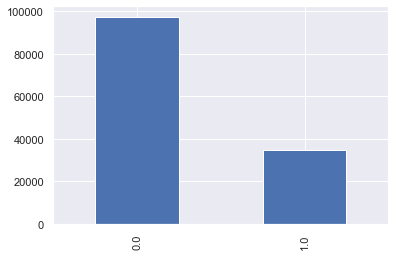

In [179]:
df['Default'].value_counts().plot(kind='bar')

In [180]:
smt=SMOTE()

In [181]:
x,y=smt.fit_resample(X,y)

In [182]:
df=x
df['Default']=y

In [183]:
df['Default'].value_counts()   ## here we do balaced the dataset

1.0    97436
0.0    97436
Name: Default, dtype: int64

In [184]:
df.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,Home_Appliances,Education_det,Gen,Credit_Lnks,Experience,Income_Alt,...,Permanent_Addr_tag,Contact_age,Credit_Inq_1,Credit_Inq_2,Credit_Inq_3,Type_Loan_RLoan,Region_East,Region_North,Region_South,Default
0,13.594677,0,13.397021,9.533620,1.177410,0,0,0,0.948683,1,...,0,4.242641,1,0,0,0,1,0,0,1.0
1,13.692463,1,12.196401,9.321261,0.000000,0,1,0,1.732051,1,...,1,17.492856,0,1,0,0,0,1,0,0.0
2,12.557152,1,11.523430,9.034843,1.177410,2,1,0,2.144761,1,...,1,16.763055,0,0,1,0,0,1,0,0.0
3,12.742198,1,12.095186,8.879630,0.832555,0,1,0,2.167948,1,...,1,4.472136,1,0,0,1,0,0,1,0.0
4,14.046539,0,13.259888,9.488939,0.000000,0,0,1,2.626785,0,...,1,48.363209,0,1,0,0,0,1,0,0.0


In [185]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [187]:
lr=LogisticRegression()
modellr=lr.fit(X_train,y_train)
ypredcit=modellr.predict(X_test)


In [188]:
print(classification_report(y_test,ypredcit))

              precision    recall  f1-score   support

         0.0       0.63      0.69      0.66     29137
         1.0       0.66      0.60      0.63     29325

    accuracy                           0.65     58462
   macro avg       0.65      0.65      0.64     58462
weighted avg       0.65      0.65      0.64     58462



In [189]:
KNN=KNeighborsClassifier()
modelKNN=KNN.fit(X_train,y_train)
ypredcit=modelKNN.predict(X_test)
print(classification_report(y_test,ypredcit))

              precision    recall  f1-score   support

         0.0       0.80      0.52      0.63     29137
         1.0       0.65      0.88      0.74     29325

    accuracy                           0.70     58462
   macro avg       0.73      0.70      0.69     58462
weighted avg       0.73      0.70      0.69     58462



In [190]:
RF=RandomForestClassifier()
modelRF=RF.fit(X_train,y_train)
ypredcit=modelRF.predict(X_test)
print(classification_report(y_test,ypredcit))

              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79     29137
         1.0       0.85      0.66      0.74     29325

    accuracy                           0.77     58462
   macro avg       0.78      0.77      0.77     58462
weighted avg       0.78      0.77      0.77     58462



In [191]:
 ### now we loading 

In [192]:
df1=pd.read_csv('Test_Set_TVS.csv')
df1.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,...,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,...,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,...,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,...,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,...,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


In [193]:
df1_copy=df1.copy()

In [194]:
 ### already we know in train data which column is not important so we directly drop 

In [195]:
df1=df1.drop(columns=['ID','density_Ind','Company_Rating','c1_rated','c2_rated','Product_bought'],axis=1)

In [196]:
df1.columns

Index(['Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt', 'Job_Type',
       'Default_hist', 'Prop_List', 'Home_Appliances', 'Region_Type',
       'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen', 'Credit_Lnks',
       'Experience', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan',
       'Dependents', 'Region', 'Age', 'hour_Process', 'Addr_permanent',
       'Permanent_Addr_tag', 'Contact_age'],
      dtype='object')

In [197]:
df1=df1.drop(columns=['Job_Type','Default_hist','Prop_List','Region_Type','Marital_Stat','Day_Process'],axis=1)

In [198]:
df1.columns

Index(['Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'Home_Appliances', 'Credit_Inq', 'Education_det', 'Gen', 'Credit_Lnks',
       'Experience', 'Income_Alt', 'Ph.No', 'Type_Loan', 'Dependents',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'Contact_age'],
      dtype='object')

In [199]:
df_copy.columns

Index(['Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'Home_Appliances', 'Credit_Inq', 'Education_det', 'Gen', 'Credit_Lnks',
       'Experience', 'Income_Alt', 'Ph.No', 'Type_Loan', 'Dependents',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'Contact_age', 'Default'],
      dtype='object')

In [200]:
df1.shape

(56760, 20)

In [201]:
df1.isnull().sum()

Compensation          2750
Vehicle_Status        3883
Loan_amt                 0
Annuity_amt           1963
Home_Appliances       4759
Credit_Inq            1166
Education_det            0
Gen                      0
Credit_Lnks              0
Experience            9351
Income_Alt            3299
Ph.No                    0
Type_Loan                0
Dependents               0
Region                   0
Age                      0
hour_Process             0
Addr_permanent           0
Permanent_Addr_tag       0
Contact_age           3522
dtype: int64

In [202]:
## need to fill the missing values

In [203]:
df1['Compensation'].mean()

742311.0446769117

In [204]:
df1['Compensation'].median()

666744.0

In [205]:
df1['Compensation']=df1['Compensation'].fillna(df1['Compensation'].median())

In [206]:
df1['Vehicle_Status'].value_counts()

N    34721
Y    18156
Name: Vehicle_Status, dtype: int64

In [207]:
df1['Vehicle_Status']=df1['Vehicle_Status'].fillna(method='bfill')

In [208]:
df1['Vehicle_Status'].value_counts()

N    37295
Y    19465
Name: Vehicle_Status, dtype: int64

In [209]:
df1['Annuity_amt'].mean()

10832.334840045967

In [210]:
df1['Annuity_amt'].median()

10756.45

In [211]:
df1['Annuity_amt']=df1['Annuity_amt'].fillna(df1['Annuity_amt'].mean())

In [212]:
df1['Home_Appliances'].mean()

3.220688063691083

In [213]:
df1['Home_Appliances'].median()

4.0

In [214]:
df1['Home_Appliances']=df1['Home_Appliances'].fillna(df1['Home_Appliances'].median())

In [215]:
df1['Credit_Inq'].value_counts()

1     28703
2     13030
3      9998
>4     3863
Name: Credit_Inq, dtype: int64

In [216]:
df1['Credit_Inq']=df1['Credit_Inq'].fillna(df1['Credit_Inq'].mode()[0])

In [217]:
df1['Credit_Inq'].value_counts()

1     29869
2     13030
3      9998
>4     3863
Name: Credit_Inq, dtype: int64

In [218]:
df1['Experience'].mean()

6.590278217216131

In [219]:
df1['Experience'].median()

4.6

In [220]:
df1['Experience']=df1['Experience'].fillna(df1['Experience'].median())

In [221]:
df1['Income_Alt'].value_counts()

Not_Specified    38441
Y                15020
Name: Income_Alt, dtype: int64

In [222]:
df1['Income_Alt']=df1['Income_Alt'].fillna(method='bfill')

In [223]:
df1['Income_Alt'].value_counts()

Not_Specified    40847
Y                15913
Name: Income_Alt, dtype: int64

In [224]:
df1['Contact_age'].mean()

971.8211803598933

In [225]:
df1['Contact_age'].median()

767.0

In [226]:
df1['Contact_age']=df1['Contact_age'].fillna(df1['Contact_age'].mean())

In [227]:
df1.isnull().sum()  # now there is no any null values


Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
Home_Appliances       0
Credit_Inq            0
Education_det         0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Ph.No                 0
Type_Loan             0
Dependents            0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
Contact_age           0
dtype: int64

In [228]:
### now we work on outliers

In [229]:
df1num=df1.select_dtypes(np.number)
df1num.columns

Index(['Compensation', 'Loan_amt', 'Annuity_amt', 'Home_Appliances',
       'Experience', 'Dependents', 'Age', 'hour_Process', 'Contact_age'],
      dtype='object')

<AxesSubplot:xlabel='Compensation'>

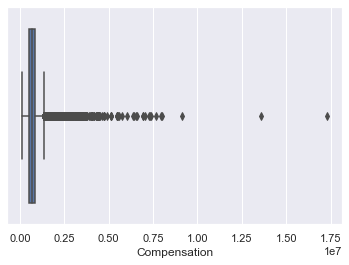

In [230]:
sns.boxplot(data=df1,x=df1['Compensation'])

<AxesSubplot:xlabel='Loan_amt'>

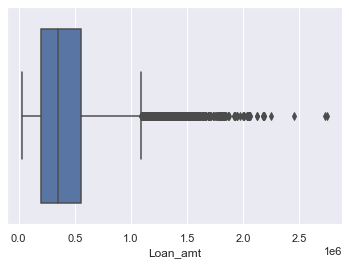

In [231]:
sns.boxplot(data=df1,x=df1['Loan_amt'])

<AxesSubplot:xlabel='Annuity_amt'>

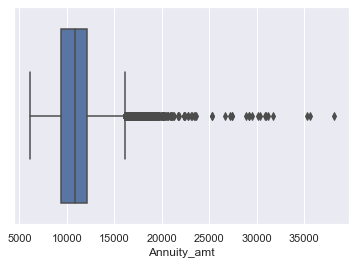

In [232]:
sns.boxplot(data=df1,x=df1['Annuity_amt'])

<AxesSubplot:xlabel='Home_Appliances'>

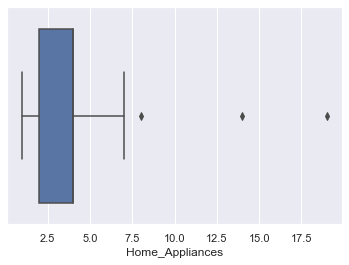

In [233]:
sns.boxplot(data=df1,x=df1['Home_Appliances'])

<AxesSubplot:xlabel='Experience'>

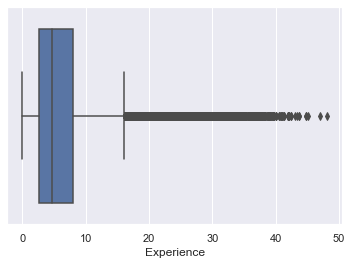

In [234]:
sns.boxplot(data=df1,x=df1['Experience'])

<AxesSubplot:xlabel='Dependents'>

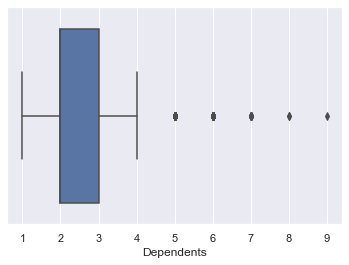

In [235]:
sns.boxplot(data=df1,x=df1['Dependents'])

<AxesSubplot:xlabel='Age'>

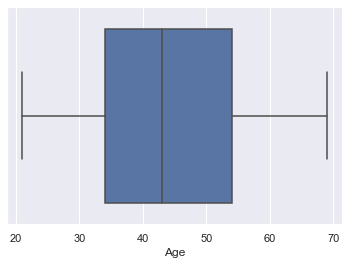

In [236]:
sns.boxplot(data=df1,x=df1['Age'])

<AxesSubplot:xlabel='hour_Process'>

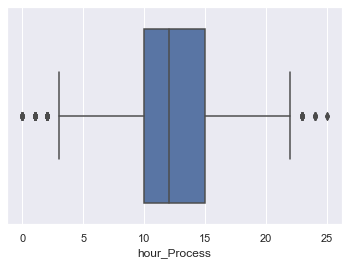

In [237]:
sns.boxplot(data=df1,x=df1['hour_Process'])

<AxesSubplot:xlabel='Contact_age'>

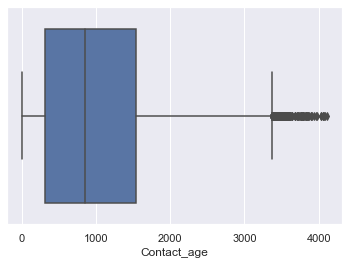

In [238]:
sns.boxplot(data=df1,x=df1['Contact_age'])

In [239]:
## need to treat them

In [240]:
def iqr_capping(df1,col):
    q1=df1[col].quantile(.25)
    q3=df1[col].quantile(.75)
    iqr=q3-q1

    lcl=q1-1.5*iqr
    hcl=q3+1.5*iqr
    
    df1[col]=np.where(df1[col] > hcl, hcl, np.where(df1[col]<lcl,lcl,df1[col]))

In [241]:
iqr_capping(df1num,df1num.columns)

In [242]:
df1['Compensation']=df1num['Compensation']
df1['Loan_amt']=df1num['Loan_amt']
df1['Annuity_amt']=df1num['Annuity_amt']
df1['Home_Appliances']=df1num['Home_Appliances']
df1['Experience']=df1num['Experience']
df1['Dependents']=df1num['Dependents']
df1['Age']=df1num['Age']
df1['hour_Process']=df1num['hour_Process']
df1['Contact_age']=df1num['Contact_age']

In [243]:
df1.skew()

Compensation       0.794856
Loan_amt           0.944227
Annuity_amt        0.275330
Home_Appliances   -1.179040
Experience         1.025492
Dependents         0.683531
Age                0.118924
hour_Process       0.007629
Contact_age        0.728055
dtype: float64

In [244]:
df1['Compensation'] = np.log( df['Compensation'] )
df1['Loan_amt'] = np.log( df['Loan_amt'] )
df1['Annuity_amt'] = np.log( df['Annuity_amt'] )



In [245]:
df1['Home_Appliances']=np.sqrt(df['Home_Appliances'])
df1['Contact_age']=np.sqrt(df['Contact_age'])
df1['Experience']=np.sqrt(df['Experience'])

In [246]:
df1.skew()

Compensation      -0.129743
Loan_amt          -0.359374
Annuity_amt       -0.236354
Home_Appliances   -1.616897
Experience        -0.201996
Dependents         0.683531
Age                0.118924
hour_Process       0.007629
Contact_age       -0.703857
dtype: float64

<AxesSubplot:>

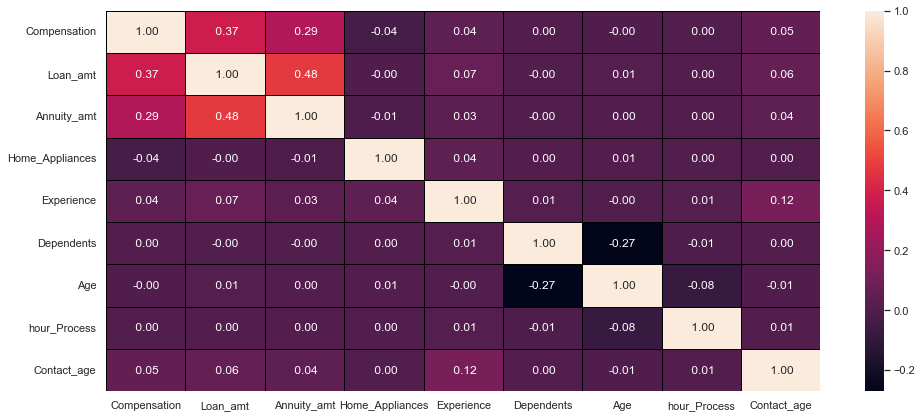

In [247]:
plt.figure(figsize=(16, 7))

sns.heatmap(df1.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

In [248]:
## now we do encodig because alredy in heat map clearly see there no any multicollnirity exist 

In [249]:
df1cat=df1.select_dtypes(include=object)
df1cat.head()

,Vehicle_Status,Credit_Inq,Education_det,Gen,Credit_Lnks,Income_Alt,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
0,Y,1,Grad,M,1_to_3,Not_Specified,Yes,CLoan,North,Yes,Yes
1,N,1,Grad,M,1_to_3,Y,No,CLoan,Central,Yes,Yes
2,N,1,Grad,M,1_to_3,Y,No,CLoan,South,Yes,Yes
3,N,1,Grad,M,1_to_3,Y,Yes,CLoan,East,Yes,Yes
4,N,3,P_Grad,F,1_to_3,Y,Yes,RLoan,North,Yes,Yes


In [250]:
df1['Vehicle_Status'].value_counts()

N    37295
Y    19465
Name: Vehicle_Status, dtype: int64

In [251]:
df1['Vehicle_Status']=df1['Vehicle_Status'].replace({'N':1,'Y':0})

In [252]:
df1['Vehicle_Status'].value_counts()

1    37295
0    19465
Name: Vehicle_Status, dtype: int64

In [253]:
df1['Credit_Inq'].value_counts()

1     29869
2     13030
3      9998
>4     3863
Name: Credit_Inq, dtype: int64

In [254]:
df1['Credit_Inq']=df1['Credit_Inq'].replace({'>4':4})

In [255]:
df1['Credit_Inq'].value_counts()

1    29869
2    13030
3     9998
4     3863
Name: Credit_Inq, dtype: int64

In [256]:
df1['Education_det'].value_counts() 
df1['Education_det']=df1['Education_det'].replace({'Grad':0,'P_Grad':1,'Other':2})
df1['Gen'].value_counts()
df1['Gen']=df1['Gen'].replace({'M':1,'F':0})
df1['Credit_Lnks']=df['Credit_Lnks'].replace({'1_to_3':0,'4_to_6':1,'>6':2})
df1['Income_Alt'].value_counts()
df1['Income_Alt']=df1['Income_Alt'].replace({'Not_Specified':1,'Y':0})
df1['Ph.No']=df1['Ph.No'].replace({'Yes':1,'No':0})
df1['Addr_permanent']=df1['Addr_permanent'].replace({'Yes':1,'No':0})
df1['Permanent_Addr_tag']=df1['Permanent_Addr_tag'].replace({'Yes':1,'No':0})

In [257]:
df1.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,Home_Appliances,Credit_Inq,Education_det,Gen,Credit_Lnks,Experience,Income_Alt,Ph.No,Type_Loan,Dependents,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age
0,2.609678,0,2.595032,2.254825,1.085085,1,0,1,0,0.974004,1,1,CLoan,3.0,North,39.0,11.0,1,1,2.059767
1,2.616846,1,2.501141,2.232298,0.000000,1,0,1,0,1.316074,0,0,CLoan,2.0,Central,46.0,13.0,1,1,4.182446
2,2.530290,1,2.444382,2.201089,1.085085,1,0,1,0,1.464500,0,0,CLoan,3.0,South,33.0,15.0,1,1,4.094271
3,2.544919,1,2.492808,2.183760,0.912444,1,0,1,0,1.472395,0,1,CLoan,2.0,East,48.0,12.0,1,1,2.114743
4,2.642376,1,2.584744,2.250127,0.000000,3,1,0,1,1.620736,0,1,RLoan,2.0,North,53.0,7.0,1,1,6.954366


In [258]:
df1copy=df1.copy()

In [259]:
df1copy.columns

Index(['Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'Home_Appliances', 'Credit_Inq', 'Education_det', 'Gen', 'Credit_Lnks',
       'Experience', 'Income_Alt', 'Ph.No', 'Type_Loan', 'Dependents',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'Contact_age'],
      dtype='object')

In [260]:
X_testingdata = pd.get_dummies(df1, drop_first = True)
X_testingdata .head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,Home_Appliances,Education_det,Gen,Credit_Lnks,Experience,Income_Alt,...,Addr_permanent,Permanent_Addr_tag,Contact_age,Credit_Inq_1,Credit_Inq_2,Credit_Inq_3,Type_Loan_RLoan,Region_East,Region_North,Region_South
0,2.609678,0,2.595032,2.254825,1.085085,0,1,0,0.974004,1,...,1,1,2.059767,1,0,0,0,0,1,0
1,2.616846,1,2.501141,2.232298,0.000000,0,1,0,1.316074,0,...,1,1,4.182446,1,0,0,0,0,0,0
2,2.530290,1,2.444382,2.201089,1.085085,0,1,0,1.464500,0,...,1,1,4.094271,1,0,0,0,0,0,1
3,2.544919,1,2.492808,2.183760,0.912444,0,1,0,1.472395,0,...,1,1,2.114743,1,0,0,0,1,0,0
4,2.642376,1,2.584744,2.250127,0.000000,1,0,1,1.620736,0,...,1,1,6.954366,0,0,1,1,0,1,0


In [261]:
X_testingdata.shape

(56760, 24)

In [262]:
X_testingdata.isnull().sum()

Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
Home_Appliances       0
Education_det         0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Ph.No                 0
Dependents            0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
Contact_age           0
Credit_Inq_1          0
Credit_Inq_2          0
Credit_Inq_3          0
Type_Loan_RLoan       0
Region_East           0
Region_North          0
Region_South          0
dtype: int64

In [263]:
X_testingdata.round(3)

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,Home_Appliances,Education_det,Gen,Credit_Lnks,Experience,Income_Alt,...,Addr_permanent,Permanent_Addr_tag,Contact_age,Credit_Inq_1,Credit_Inq_2,Credit_Inq_3,Type_Loan_RLoan,Region_East,Region_North,Region_South
0,2.610,0,2.595,2.255,1.085,0,1,0,0.974,1,...,1,1,2.060,1,0,0,0,0,1,0
1,2.617,1,2.501,2.232,0.000,0,1,0,1.316,0,...,1,1,4.182,1,0,0,0,0,0,0
2,2.530,1,2.444,2.201,1.085,0,1,0,1.465,0,...,1,1,4.094,1,0,0,0,0,0,1
3,2.545,1,2.493,2.184,0.912,0,1,0,1.472,0,...,1,1,2.115,1,0,0,0,1,0,0
4,2.642,1,2.585,2.250,0.000,1,0,1,1.621,0,...,1,1,6.954,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56755,2.601,1,2.519,2.225,0.000,0,0,0,1.348,1,...,1,1,5.594,1,0,0,0,0,1,0
56756,2.569,1,2.481,2.240,1.085,0,1,0,1.465,0,...,1,1,5.543,1,0,0,0,1,0,0
56757,2.571,1,2.351,2.207,0.000,0,1,0,1.068,1,...,0,1,6.267,1,0,0,1,1,0,0
56758,2.566,1,2.480,2.183,1.085,2,1,0,1.465,0,...,1,0,4.953,0,1,0,0,0,1,0


In [264]:
y_test.shape

(58462,)

In [265]:
X_train.shape

(136410, 24)

In [266]:
y_train.shape

(136410,)

In [267]:
X_testingdata=X_testingdata.round(2)

In [268]:
y_t=y_test.sample(56760)
y_t.shape

(56760,)

In [269]:
X_testingdata.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,Home_Appliances,Education_det,Gen,Credit_Lnks,Experience,Income_Alt,...,Addr_permanent,Permanent_Addr_tag,Contact_age,Credit_Inq_1,Credit_Inq_2,Credit_Inq_3,Type_Loan_RLoan,Region_East,Region_North,Region_South
0,2.61,0,2.60,2.25,1.09,0,1,0,0.97,1,...,1,1,2.06,1,0,0,0,0,1,0
1,2.62,1,2.50,2.23,0.00,0,1,0,1.32,0,...,1,1,4.18,1,0,0,0,0,0,0
2,2.53,1,2.44,2.20,1.09,0,1,0,1.46,0,...,1,1,4.09,1,0,0,0,0,0,1
3,2.54,1,2.49,2.18,0.91,0,1,0,1.47,0,...,1,1,2.11,1,0,0,0,1,0,0
4,2.64,1,2.58,2.25,0.00,1,0,1,1.62,0,...,1,1,6.95,0,0,1,1,0,1,0


In [270]:
lr=LogisticRegression()
modellr=lr.fit(X_train,y_train)
ypredcit=modellr.predict(X_testingdata)
print(classification_report(y_t,ypredcit))

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     28284
         1.0       1.00      0.00      0.00     28476

    accuracy                           0.50     56760
   macro avg       0.75      0.50      0.33     56760
weighted avg       0.75      0.50      0.33     56760



In [271]:
KNN=KNeighborsClassifier()
modelKNN=KNN.fit(X_train,y_train)
ypredcit=modelKNN.predict(X_testingdata)
print(classification_report(y_t,ypredcit))

              precision    recall  f1-score   support

         0.0       0.50      0.89      0.64     28284
         1.0       0.51      0.12      0.19     28476

    accuracy                           0.50     56760
   macro avg       0.50      0.50      0.41     56760
weighted avg       0.50      0.50      0.41     56760



In [272]:
RF=RandomForestClassifier()
modelRF=RF.fit(X_train,y_train)
ypredcit=modelRF.predict(X_testingdata)
print(classification_report(y_t,ypredcit))

              precision    recall  f1-score   support

         0.0       0.50      0.79      0.61     28284
         1.0       0.50      0.20      0.29     28476

    accuracy                           0.50     56760
   macro avg       0.50      0.50      0.45     56760
weighted avg       0.50      0.50      0.45     56760



In [273]:
ADA=AdaBoostClassifier()
modelADA=ADA.fit(X_train,y_train)
ypredcit1=modelADA.predict(X_testingdata)
print(classification_report(y_t,ypredcit1))

              precision    recall  f1-score   support

         0.0       0.50      0.71      0.59     28284
         1.0       0.50      0.28      0.36     28476

    accuracy                           0.50     56760
   macro avg       0.50      0.50      0.47     56760
weighted avg       0.50      0.50      0.47     56760



In [274]:
GBC=GradientBoostingClassifier()
modelGBC=GBC.fit(X_train,y_train)
ypredcit=modelGBC.predict(X_testingdata)
print(classification_report(y_t,ypredcit))

              precision    recall  f1-score   support

         0.0       0.50      0.77      0.60     28284
         1.0       0.50      0.22      0.31     28476

    accuracy                           0.50     56760
   macro avg       0.50      0.50      0.46     56760
weighted avg       0.50      0.50      0.46     56760



In [275]:
ypredcit.shape

(56760,)

In [276]:
df1_copy.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought'],
      dtype='object')

In [277]:
ypredcit1

array([0., 0., 0., ..., 0., 1., 0.])

In [278]:
df1_copy['ID']

0        487410
1        533258
2        581926
3        486301
4        580822
          ...  
56755    513665
56756    450327
56757    476417
56758    461152
56759    524075
Name: ID, Length: 56760, dtype: int64

In [279]:
type((df1_copy['ID']))

pandas.core.series.Series

In [280]:
type(ypredcit1)

numpy.ndarray

In [281]:
A=pd.DataFrame(data=ypredcit1)
A.head(3)

,0
0,0.0
1,0.0
2,0.0


In [282]:
newdf=pd.concat([df1_copy['ID'],A],axis=1)
newdf.head()

,ID,0
0,487410,0.0
1,533258,0.0
2,581926,0.0
3,486301,0.0
4,580822,0.0


In [283]:
newdf=newdf.rename(columns={0:'Ypredict'})  ## here y is adboost model because this model gave good performance
newdf

,ID,Ypredict
0,487410,0.0
1,533258,0.0
2,581926,0.0
3,486301,0.0
4,580822,0.0
...,...,...
56755,513665,1.0
56756,450327,0.0
56757,476417,0.0
56758,461152,1.0


In [284]:
datatoexcel =pd.ExcelWriter('submi file.xlsx',engine='xlsxwriter')

In [285]:
#final = pd.ExcelWriter('GFG.xlsx')

In [288]:
GFG = pd.ExcelWriter('Yog.xls')
newdf.to_excel(GFG, index=False)
 
GFG.save()

In [ ]:
GFG = pd.ExcelWriter('Yog.csv')
newdf.to_excel(GFG, index=False)
 
GFG.save()